In [1]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 75.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 33.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install mlflow --user


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 71.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [1]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA

## Importing the Dataset

In [50]:
df=pd.read_csv('sampled_final_df.csv')
df_train=df.drop("isFraud",axis=1)
output_col=pd.DataFrame(df['isFraud'])

## Cleaning the dataset

In [51]:
df_train['CASH_IN']=df_train['CASH_IN'].map({True:1,False:0})
df_train['CASH_OUT']=df_train['CASH_OUT'].map({True:1,False:0})
df_train['DEBIT']=df_train['DEBIT'].map({True:1,False:0})
df_train['PAYMENT']=df_train['PAYMENT'].map({True:1,False:0})
df_train['TRANSFER']=df_train['TRANSFER'].map({True:1,False:0})


In [52]:
df_train

step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0       563   18417.240320   18417.240320            0.00    1.240395e+04   
1       419  346354.615847  346354.615847            0.00    0.000000e+00   
2       229  291590.310000    6049.000000            0.00    2.497772e+04   
3       418   66777.824054   66777.824054            0.00    0.000000e+00   
4       379     678.130000   45082.000000        44403.87    0.000000e+00   
...     ...            ...            ...             ...             ...   
50824   244  717917.637444  717917.637444            0.00    1.174964e+07   
50825   378     302.460000     792.000000          489.54    0.000000e+00   
50826   190   11327.270000   10303.000000            0.00    0.000000e+00   
50827   512  264334.474702  264334.474702            0.00    0.000000e+00   
50828   374  285971.420000  374529.980000       660501.40    4.641889e+05   

       newbalanceDest  isFlaggedFraud  CASH_IN  CASH_OUT  DEBIT  PAYMENT  \
0        1.551259e+04               0        0         1      0        0   
1        3.463546e+05               0        0         1      0        0   
2        3.165680e+05               0        0         1      0        0   
3        0.000000e+00               0        0         0      0        0   
4        0.000000e+00               0        0         0      0        1   
...               ...             ...      ...       ...    ...      ...   
50824    1.246756e+07               0        0         1      0        0   
50825    0.000000e+00               0        0         0      0        1   
50826    0.000000e+00               0        0         0      0        1   
50827    0.000000e+00               0        0         0      0        0   
50828    1.782175e+05               0        1         0      0        0   

       TRANSFER  nameDest_encoded  nameOrig_encoded  
0             1            209519           2572822  
1             0            403995           6311127  
2             0            482160           3861560  
3             1            351115           1371643  
4             0           2184529           5689466  
...         ...               ...               ...  
50824         0            370174           4423416  
50825         0           2151612           1769882  
50826         0           1204550           6093817  
50827         1            422565           1356128  
50828         0            169488           5348593  

[50829 rows x 14 columns]

In [53]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [54]:
df_train

step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0       563   18417.240320   18417.240320            0.00    1.240395e+04   
1       419  346354.615847  346354.615847            0.00    0.000000e+00   
2       229  291590.310000    6049.000000            0.00    2.497772e+04   
3       418   66777.824054   66777.824054            0.00    0.000000e+00   
4       379     678.130000   45082.000000        44403.87    0.000000e+00   
...     ...            ...            ...             ...             ...   
50824   244  717917.637444  717917.637444            0.00    1.174964e+07   
50825   378     302.460000     792.000000          489.54    0.000000e+00   
50826   190   11327.270000   10303.000000            0.00    0.000000e+00   
50827   512  264334.474702  264334.474702            0.00    0.000000e+00   
50828   374  285971.420000  374529.980000       660501.40    4.641889e+05   

       newbalanceDest  isFlaggedFraud  CASH_IN  CASH_OUT  DEBIT  PAYMENT  \
0        1.551259e+04               0        0         1      0        0   
1        3.463546e+05               0        0         1      0        0   
2        3.165680e+05               0        0         1      0        0   
3        0.000000e+00               0        0         0      0        0   
4        0.000000e+00               0        0         0      0        1   
...               ...             ...      ...       ...    ...      ...   
50824    1.246756e+07               0        0         1      0        0   
50825    0.000000e+00               0        0         0      0        1   
50826    0.000000e+00               0        0         0      0        1   
50827    0.000000e+00               0        0         0      0        0   
50828    1.782175e+05               0        1         0      0        0   

       TRANSFER  nameDest_encoded  nameOrig_encoded  
0             1            209519           2572822  
1             0            403995           6311127  
2             0            482160           3861560  
3             1            351115           1371643  
4             0           2184529           5689466  
...         ...               ...               ...  
50824         0            370174           4423416  
50825         0           2151612           1769882  
50826         0           1204550           6093817  
50827         1            422565           1356128  
50828         0            169488           5348593  

[50829 rows x 14 columns]

In [55]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [56]:
df_train.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  50829.000000  5.082900e+04   5.082900e+04    5.082900e+04   
mean     305.693384  2.129561e+05   5.368273e+05    4.270252e+05   
std      173.018394  4.760683e+05   2.069521e+06    2.104247e+06   
min        1.000000  9.700000e-01   0.000000e+00    0.000000e+00   
25%      181.000000  2.783538e+04   1.048624e+04    0.000000e+00   
50%      298.000000  1.057949e+05   6.282000e+04    0.000000e+00   
75%      404.000000  2.524101e+05   2.423399e+05    0.000000e+00   
max      742.000000  5.072328e+07   3.187613e+07    3.205108e+07   

       oldbalanceDest  newbalanceDest  isFlaggedFraud       CASH_IN  \
count    5.082900e+04    5.082900e+04    50829.000000  50829.000000   
mean     1.019196e+06    1.191137e+06        0.000393      0.110213   
std      3.522850e+06    3.708267e+06        0.019833      0.313158   
min      0.000000e+00    0.000000e+00        0.000000      0.000000   
25%      0.000000e+00    0.000000e+00        0.000000      0.000000   
50%      3.767953e+04    2.428489e+05        0.000000      0.000000   
75%      7.413421e+05    9.817932e+05        0.000000      0.000000   
max      2.355353e+08    2.358797e+08        1.000000      1.000000   

           CASH_OUT         DEBIT       PAYMENT      TRANSFER  \
count  50829.000000  50829.000000  50829.000000  50829.000000   
mean       0.552952      0.003443      0.167208      0.227882   
std        0.497193      0.058576      0.373165      0.419470   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000   

       nameDest_encoded  nameOrig_encoded  
count      5.082900e+04      5.082900e+04  
mean       5.139591e+05      3.150544e+06  
std        5.885310e+05      1.838557e+06  
min        9.000000e+00      2.600000e+01  
25%        1.769170e+05      1.555214e+06  
50%        3.398270e+05      3.136695e+06  
75%        5.056420e+05      4.752738e+06  
max        2.721968e+06      6.352414e+06

In [57]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns


## Exploratory Data Analysis


### 1. First step is to see the type of columns so that we could conclude that even now some columns needs to be appropriated.


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50829 entries, 0 to 50828
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   step              50829 non-null  int64  
 1   amount            50829 non-null  float64
 2   oldbalanceOrg     50829 non-null  float64
 3   newbalanceOrig    50829 non-null  float64
 4   oldbalanceDest    50829 non-null  float64
 5   newbalanceDest    50829 non-null  float64
 6   isFlaggedFraud    50829 non-null  int64  
 7   CASH_IN           50829 non-null  int64  
 8   CASH_OUT          50829 non-null  int64  
 9   DEBIT             50829 non-null  int64  
 10  PAYMENT           50829 non-null  int64  
 11  TRANSFER          50829 non-null  int64  
 12  nameDest_encoded  50829 non-null  int64  
 13  nameOrig_encoded  50829 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.4 MB


### 2. NULL Values . First step is to see the Null Values


In [46]:
df_train.isnull().sum()

step                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFlaggedFraud      0
CASH_IN             0
CASH_OUT            0
DEBIT               0
PAYMENT             0
TRANSFER            0
nameDest_encoded    0
nameOrig_encoded    0
dtype: int64

<Axes: >

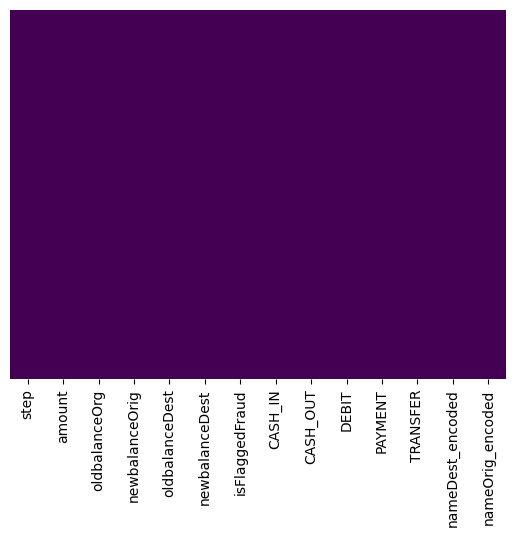

In [47]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### 3. Next step is to see the collinearity. We will use the spearman correlation since even if the dataset is spreaded we can see the correlation very easily. We will also use the Variable Inflation Factor to see the that whether a independent column could be predicted using other independednt columns

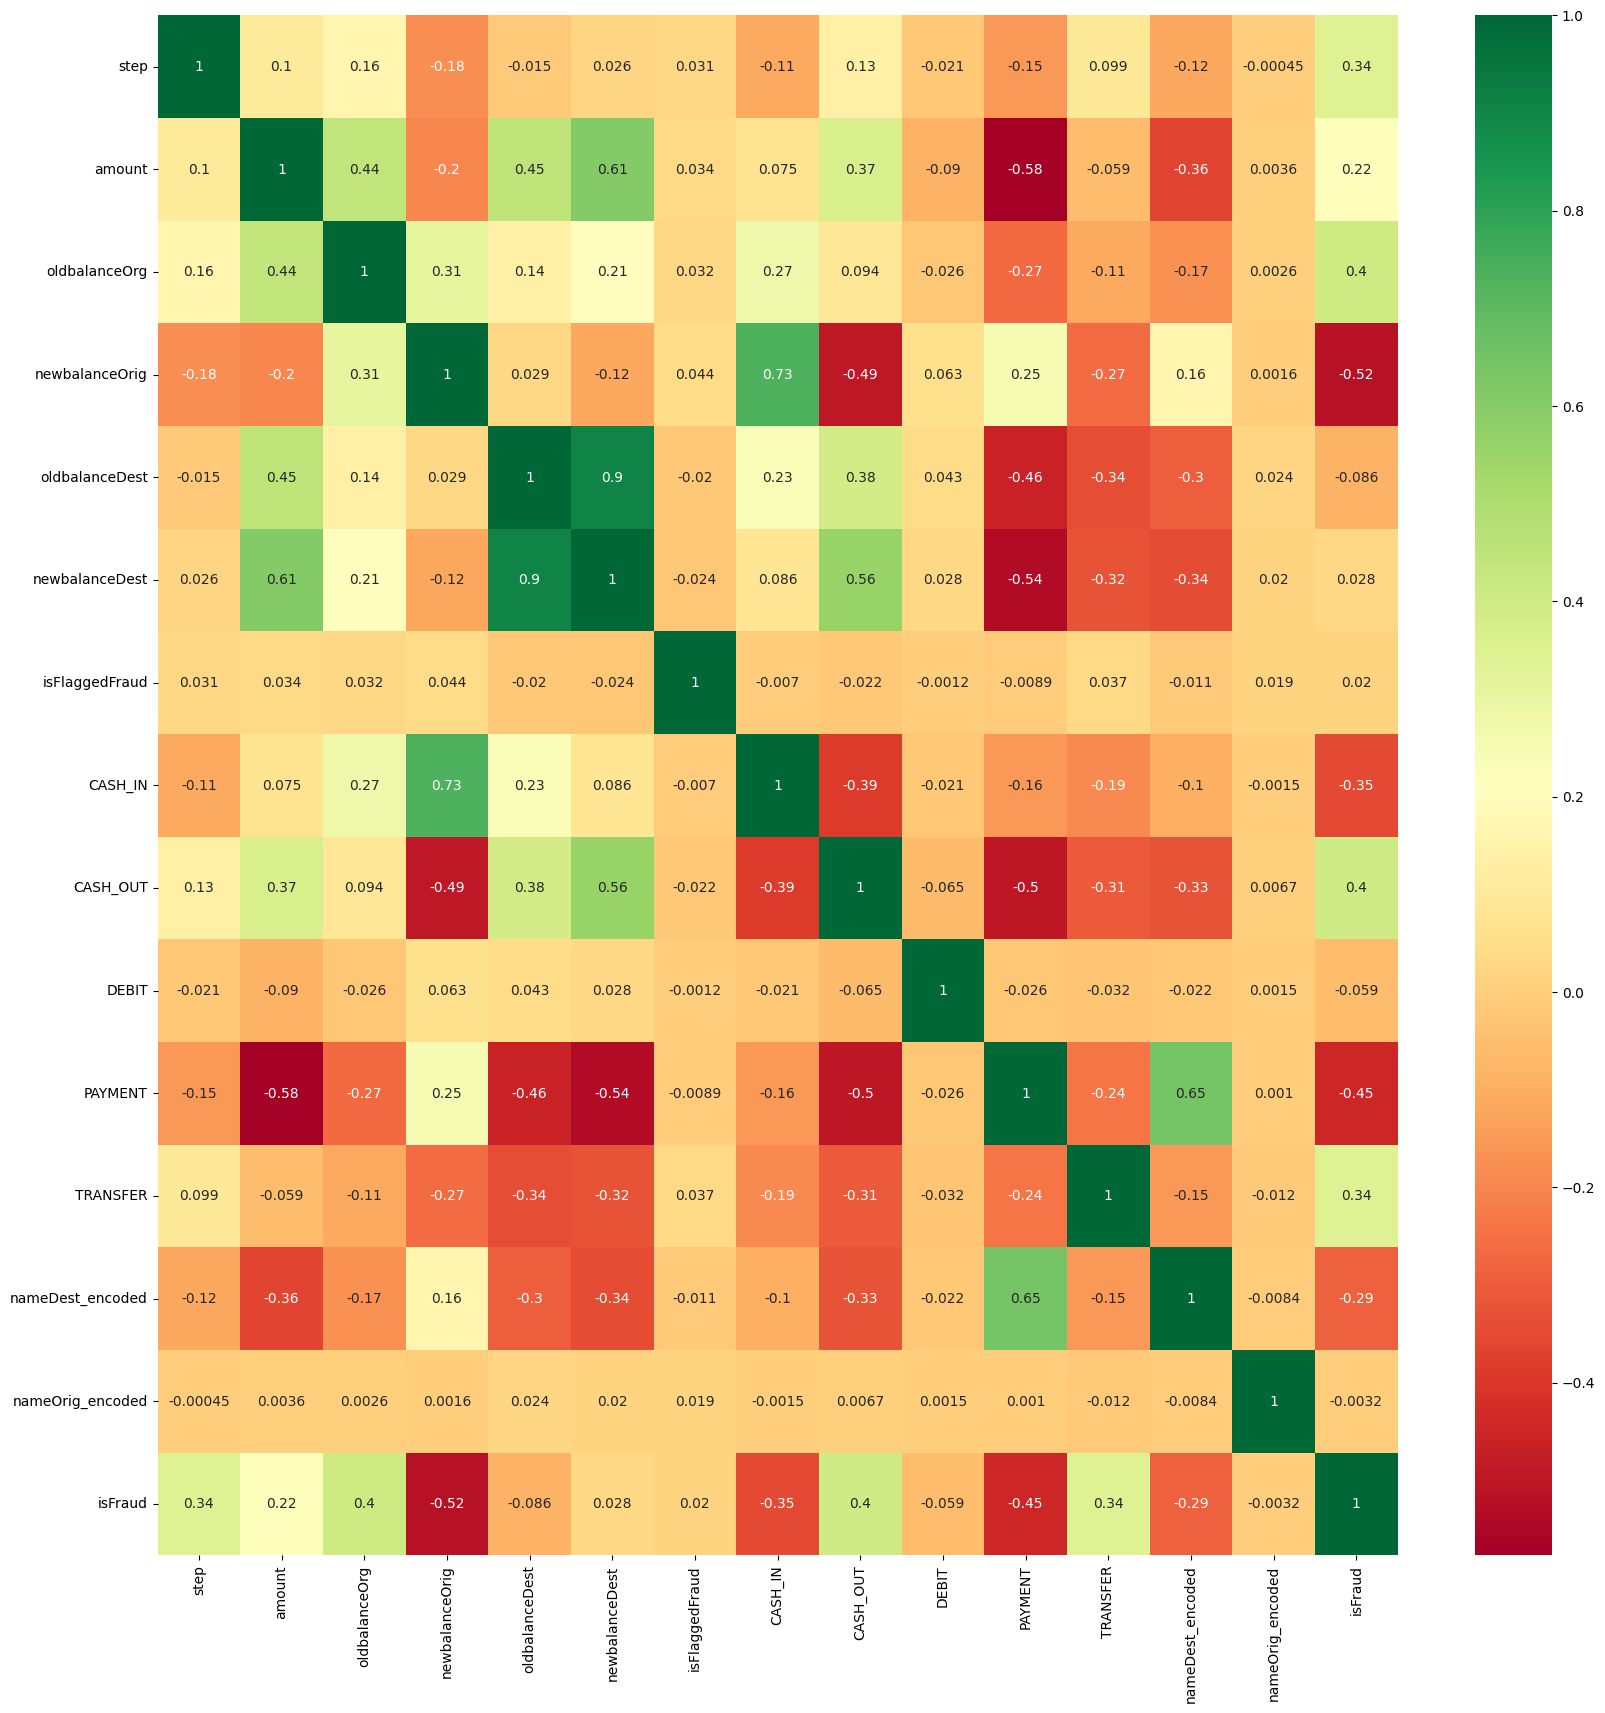

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [49]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
calc_vif(X)

Variables         VIF
0               step    3.983052
1             amount    4.781047
2      oldbalanceOrg   93.099080
3     newbalanceOrig   95.589279
4     oldbalanceDest  115.344272
5     newbalanceDest  128.855338
6     isFlaggedFraud    1.076938
7            CASH_IN    2.283259
8           CASH_OUT    3.867847
9              DEBIT    1.016719
10           PAYMENT    6.566721
11          TRANSFER    1.864681
12  nameDest_encoded    6.879791
13  nameOrig_encoded    3.589867

### 4. Next step is to see the outliers.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

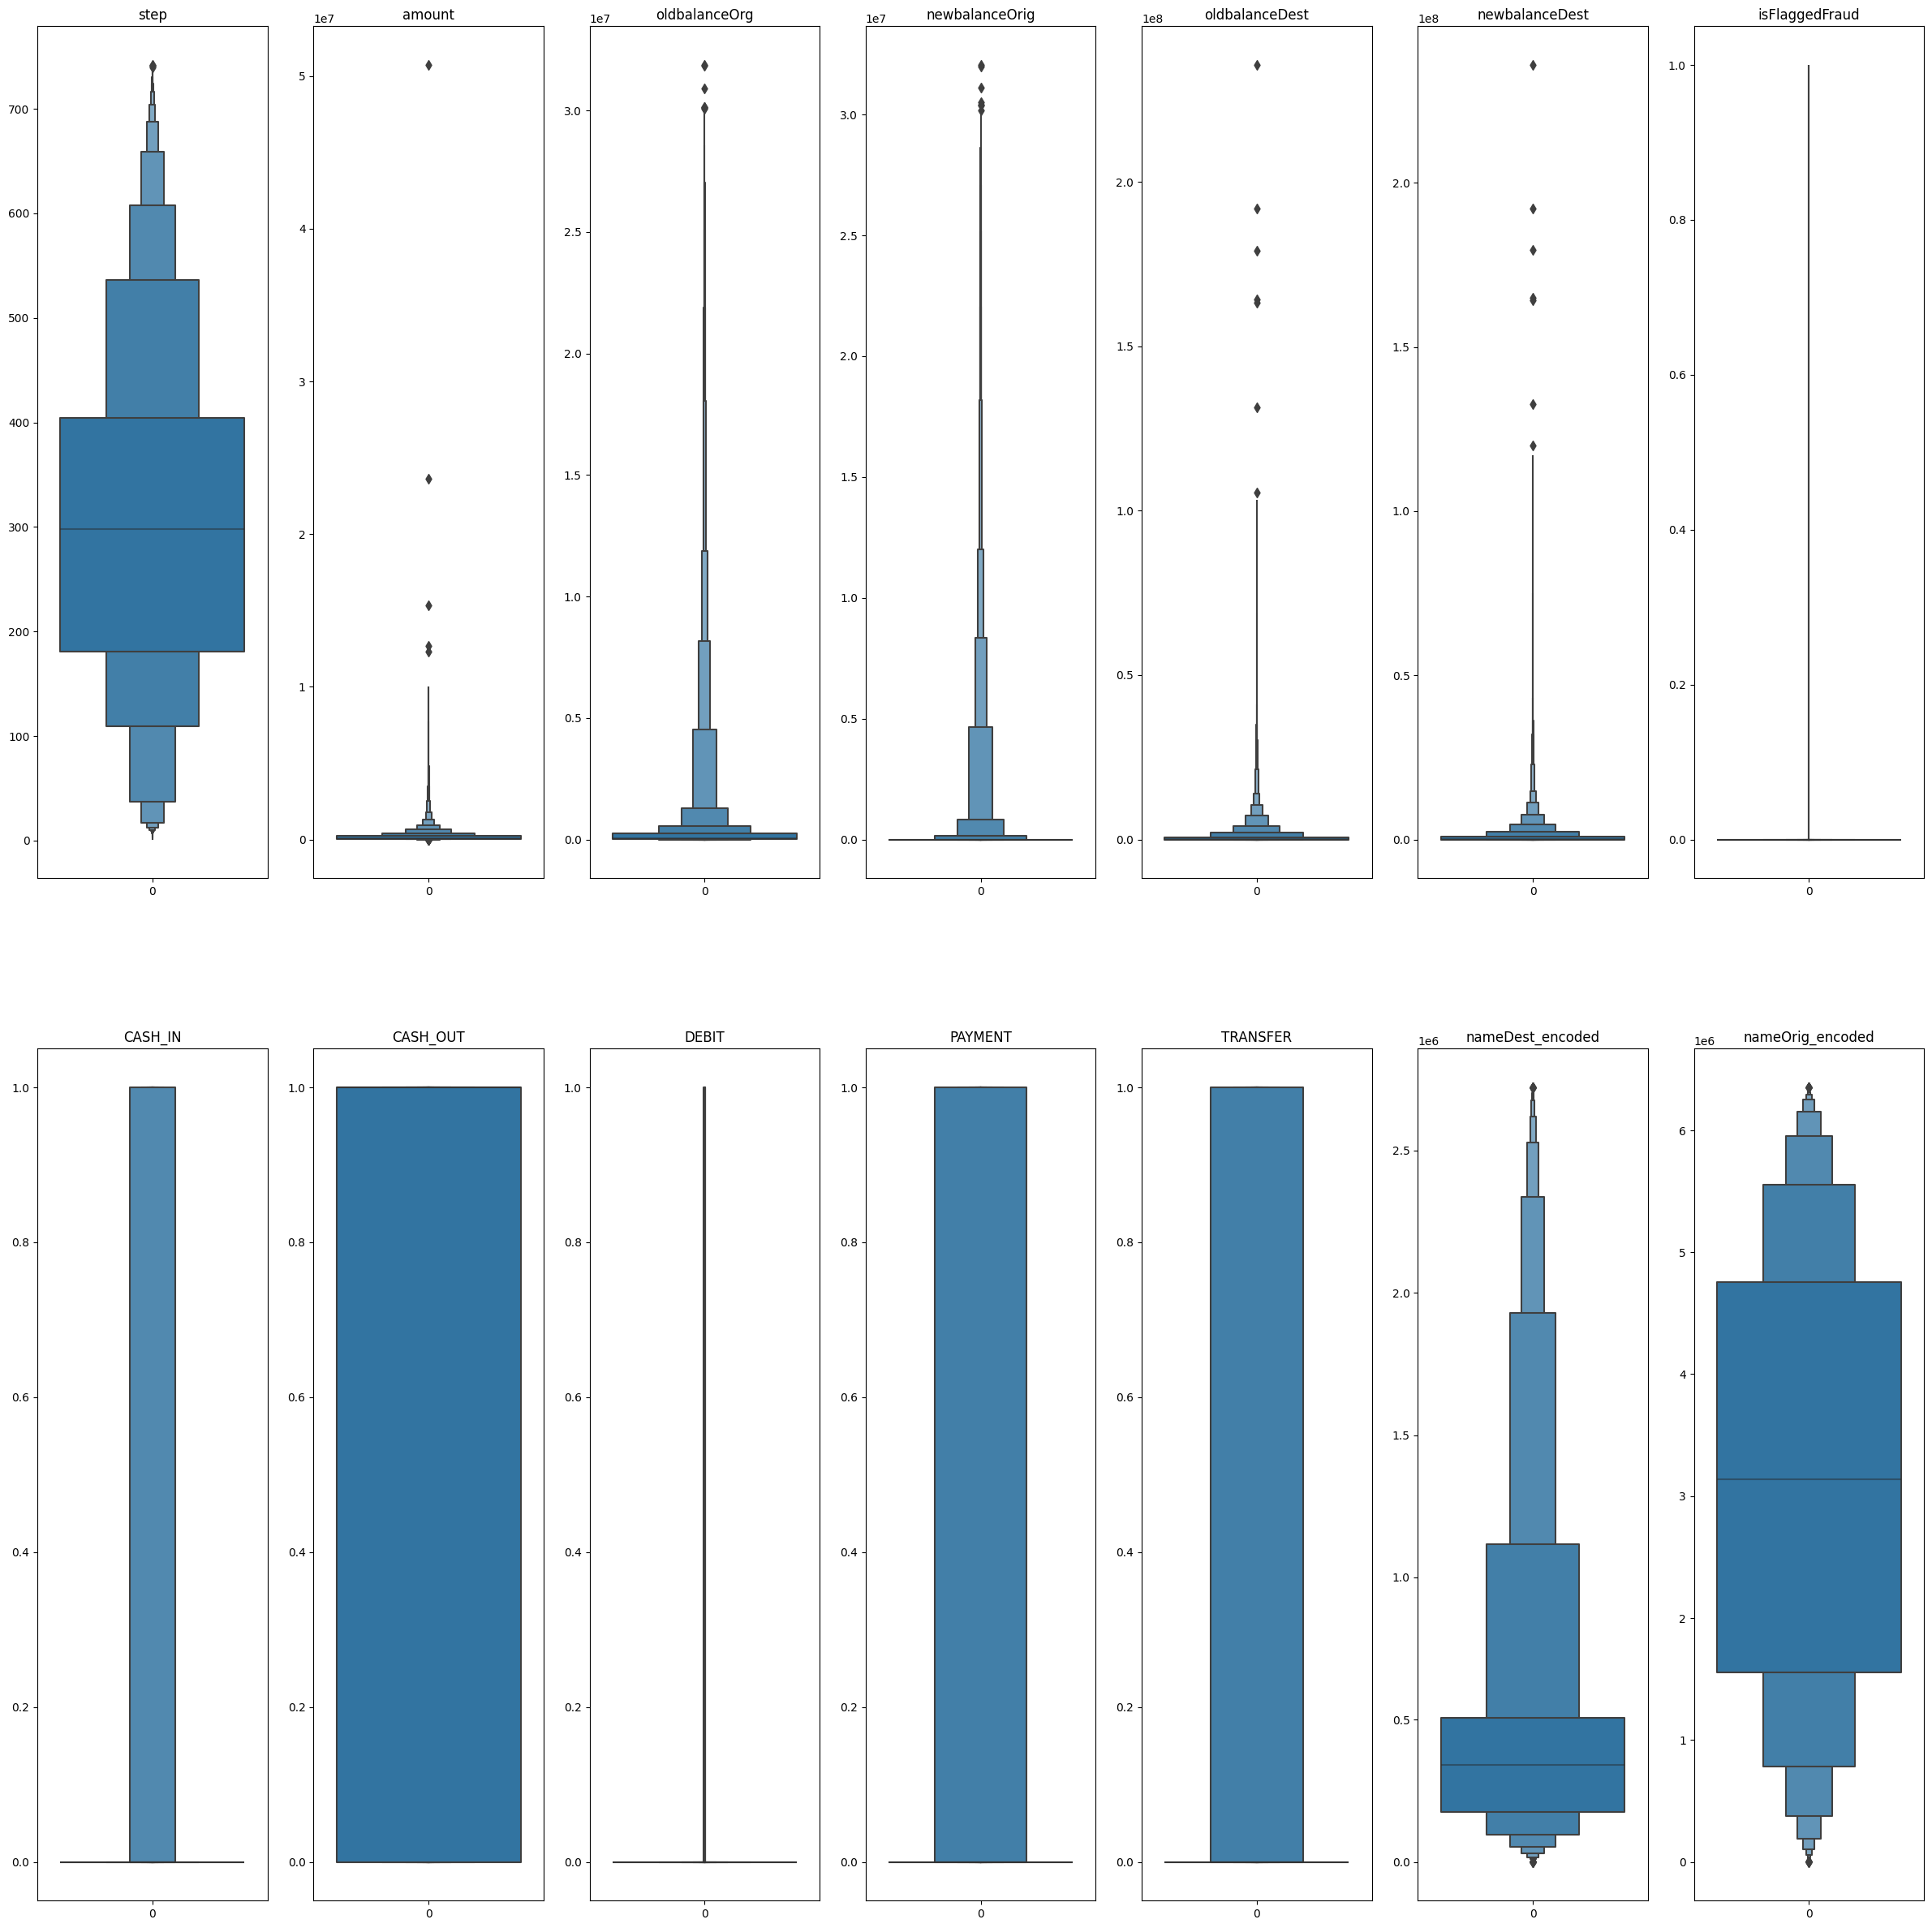

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

for ax, col in zip(axes, numerical_columns):
    print()
    sns.boxenplot(df_train[col], ax = ax)
    ax.set_title(col)

### 5. Next step is to see the density


In [16]:
range(len(df_train))


range(0, 50829)

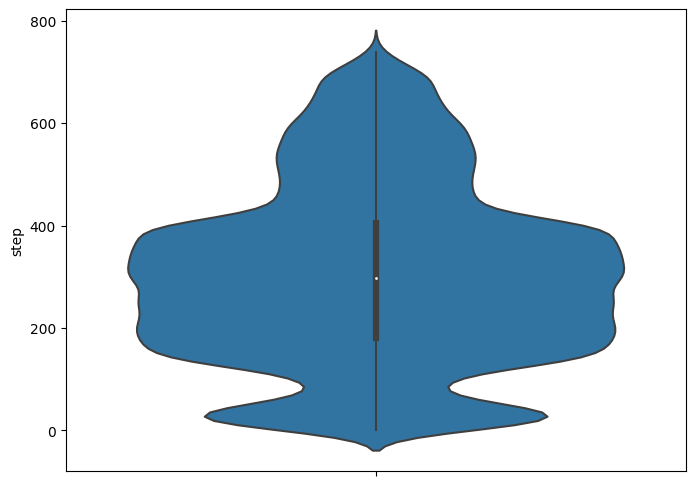

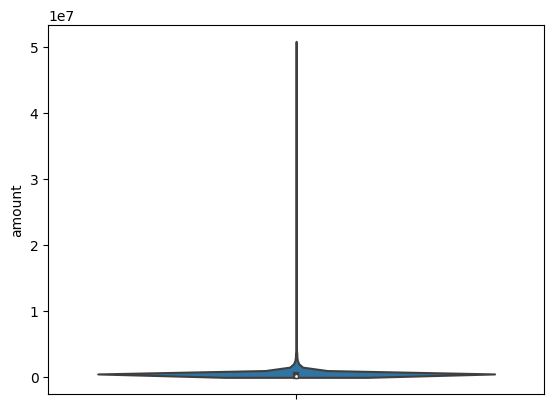

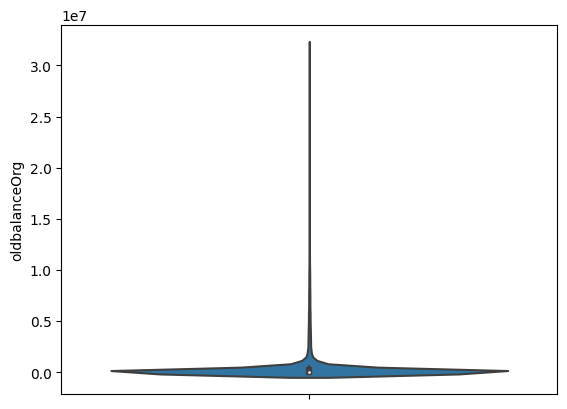

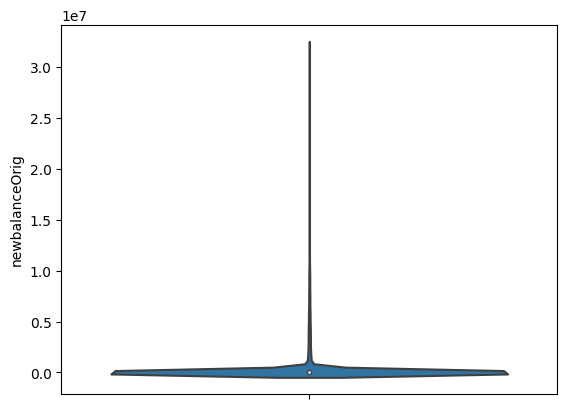

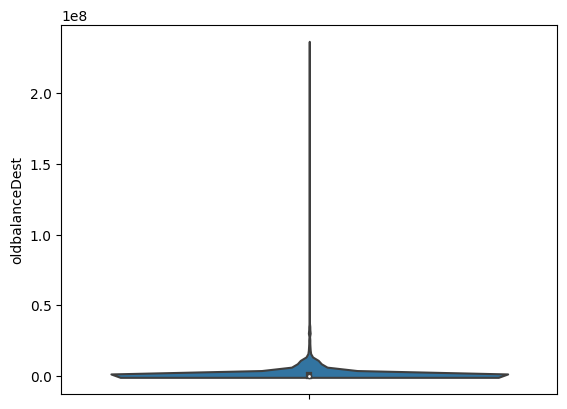

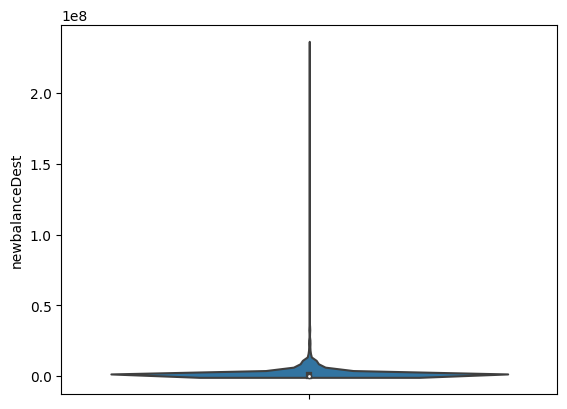

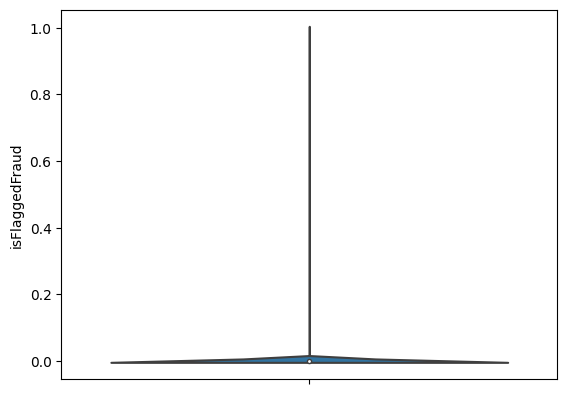

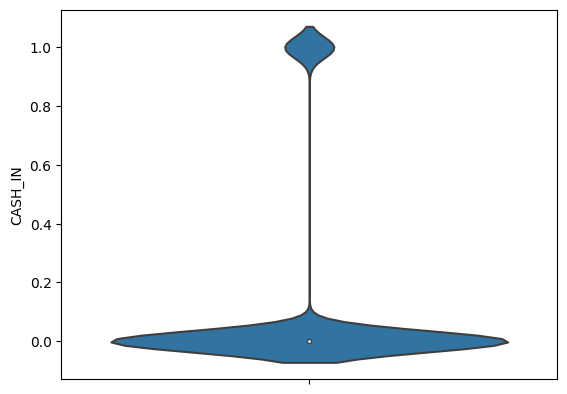

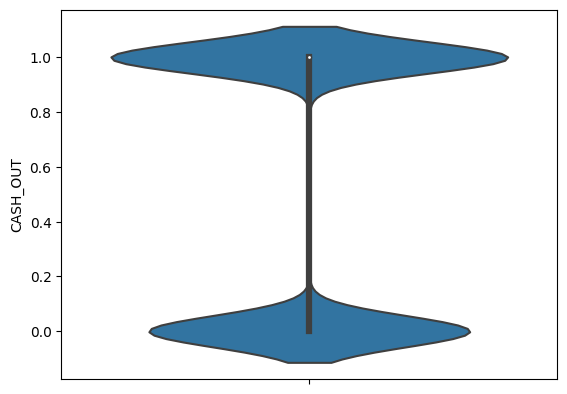

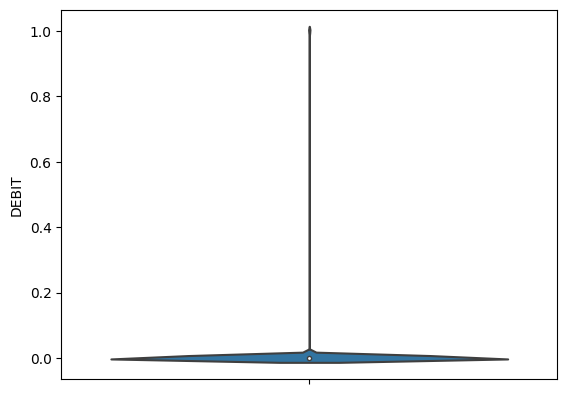

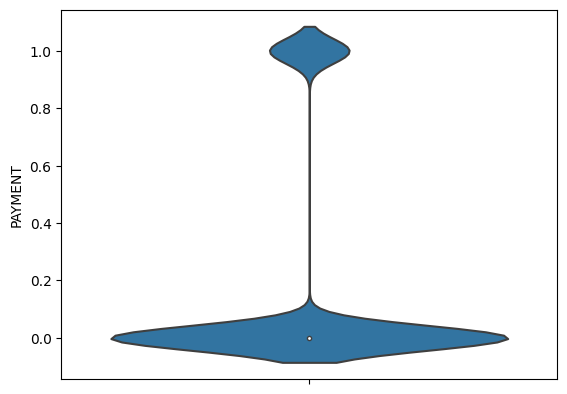

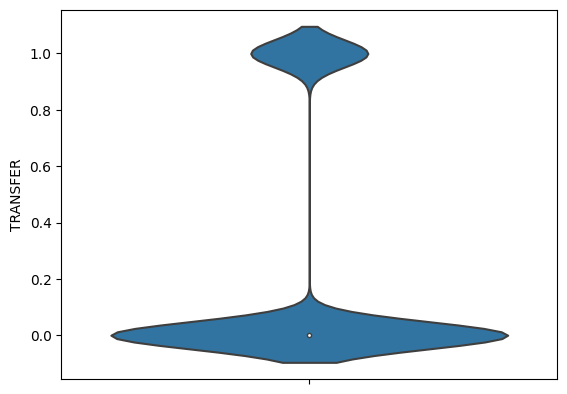

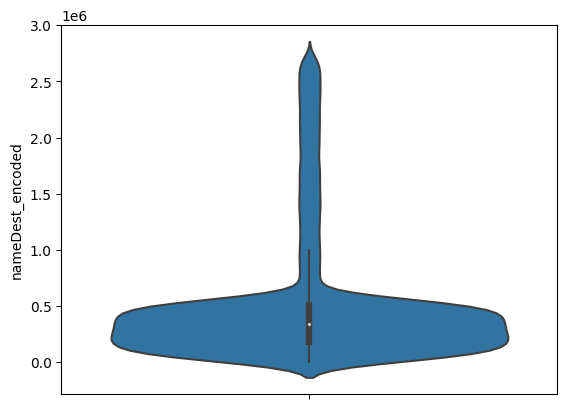

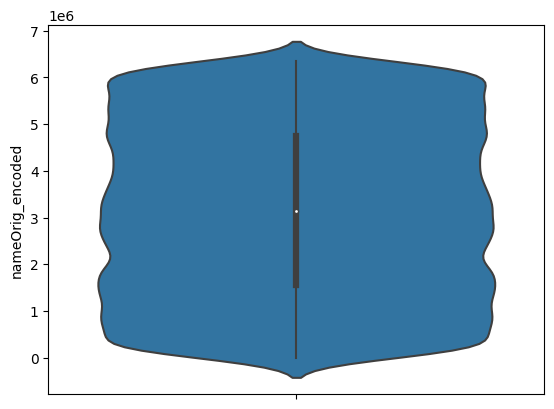

In [17]:
l=[]
for i in range(len(df_train)):
    l.append(i)
# Plot a violin plot for numerical vs categorical
plt.figure(figsize=(8, 6))
for col in numerical_columns:
    sns.violinplot(y=df_train[col])
    plt.show()

### 6. Next step is to see the distribution plot


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_2350/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


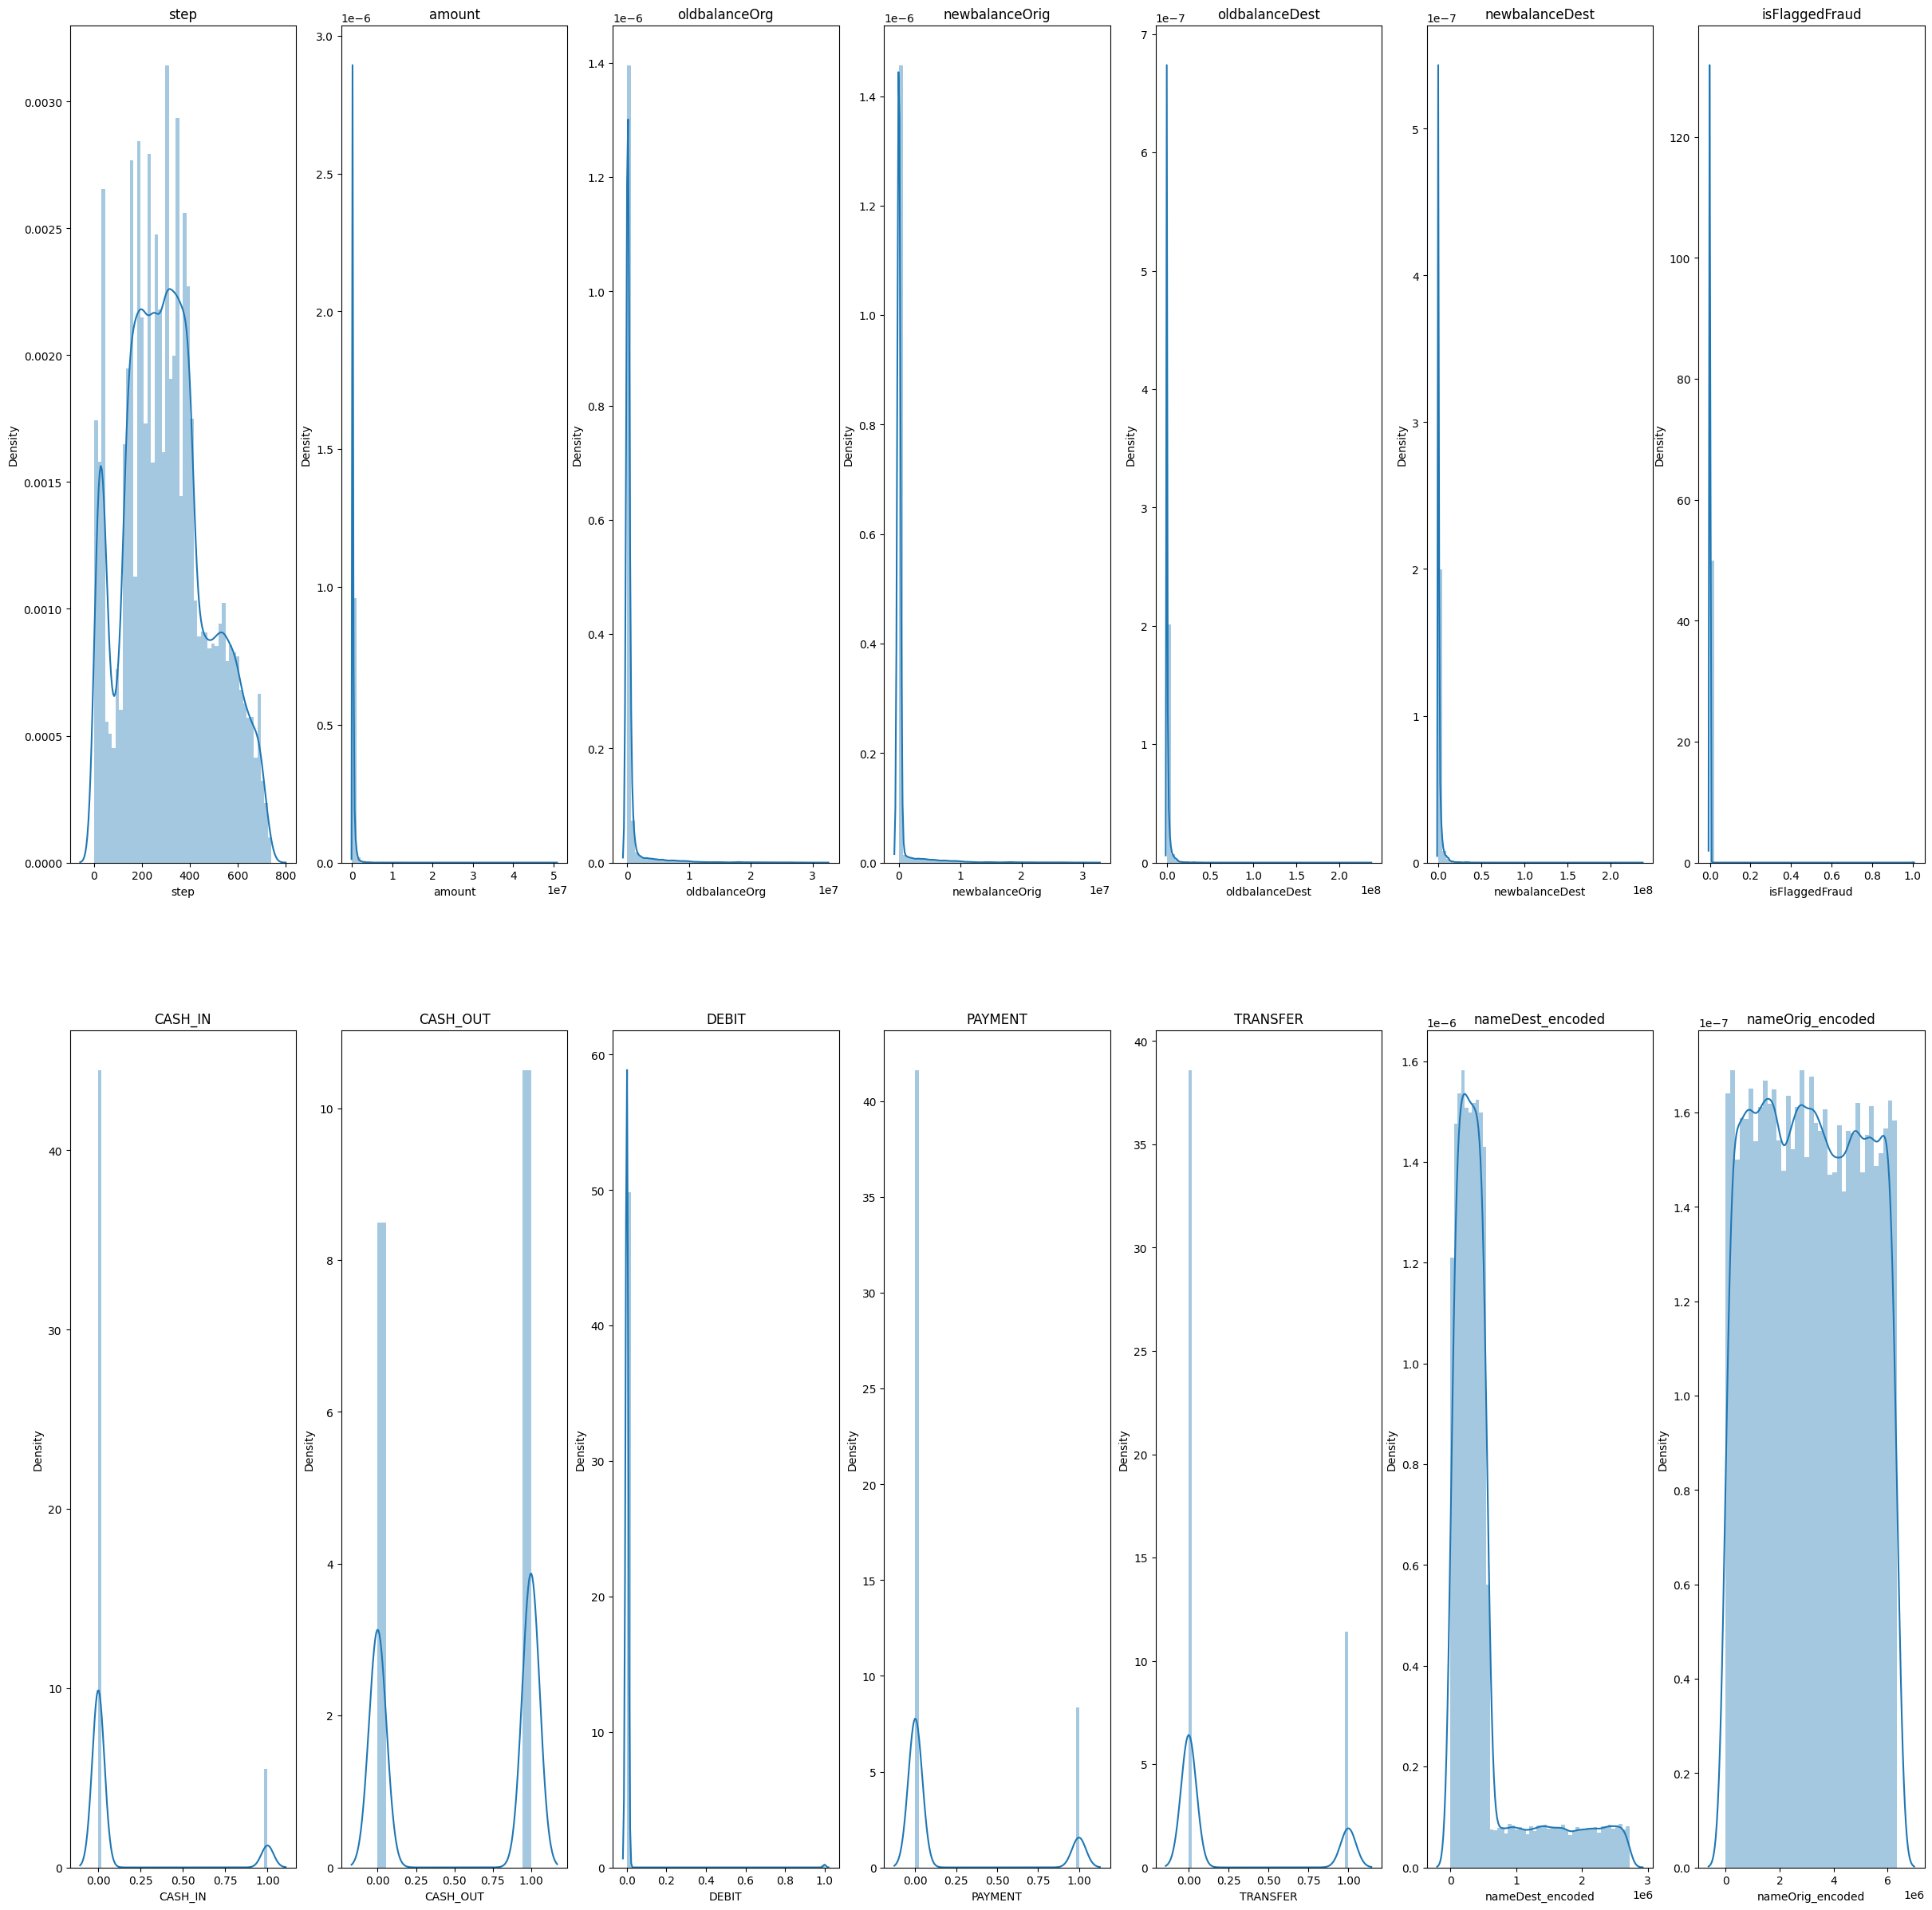

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

### 7. To get more clearity we also see the skewness in each of the numerical column


In [19]:
for col in numerical_columns:
    print(f" {df_train[col].skew() } in {col}")

 0.32907522436242387 in step
 32.68553090442 in amount
 7.542635502157765 in oldbalanceOrg
 7.525789126034026 in newbalanceOrig
 21.596917413135284 in oldbalanceDest
 19.9791308386168 in newbalanceDest
 50.38452366005486 in isFlaggedFraud
 2.4894972397745674 in CASH_IN
 -0.2130123782597912 in CASH_OUT
 16.954994847224686 in DEBIT
 1.7836909258082823 in PAYMENT
 1.2974895402177526 in TRANSFER
 2.181217674317024 in nameDest_encoded
 0.022616014163888646 in nameOrig_encoded


### 8. Next we see the count plot of each category i.e. basically the countplot


In [20]:
df.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN                bool
CASH_OUT               bool
DEBIT                  bool
PAYMENT                bool
TRANSFER               bool
nameDest_encoded      int64
nameOrig_encoded      int64
isFraud               int64
dtype: object

Text(0.5, 1.0, 'Count of categories in the label')

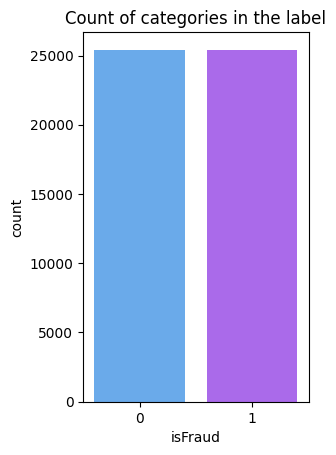

In [21]:
plt.subplot(1,2,1)
sns.countplot(x = 'isFraud' , palette= 'cool', data= output_col) 
plt.title("Count of categories in the label")

### 9. See the redundant values in a column


In [22]:
df_train[numerical_columns].describe(percentiles = [.25,.5,.75,.95,.97,.99])  


step        amount  oldbalanceOrg  newbalanceOrig  \
count  50829.000000  5.082900e+04   5.082900e+04    5.082900e+04   
mean     305.693384  2.129561e+05   5.368273e+05    4.270252e+05   
std      173.018394  4.760683e+05   2.069521e+06    2.104247e+06   
min        1.000000  9.700000e-01   0.000000e+00    0.000000e+00   
25%      181.000000  2.783538e+04   1.048624e+04    0.000000e+00   
50%      298.000000  1.057949e+05   6.282000e+04    0.000000e+00   
75%      404.000000  2.524101e+05   2.423399e+05    0.000000e+00   
95%      627.000000  7.440183e+05   2.080911e+06    2.005502e+06   
97%      660.000000  9.647865e+05   4.753570e+06    4.889036e+06   
99%      697.000000  1.575369e+06   1.025901e+07    1.044295e+07   
max      742.000000  5.072328e+07   3.187613e+07    3.205108e+07   

       oldbalanceDest  newbalanceDest  isFlaggedFraud       CASH_IN  \
count    5.082900e+04    5.082900e+04    50829.000000  50829.000000   
mean     1.019196e+06    1.191137e+06        0.000393      0.110213   
std      3.522850e+06    3.708267e+06        0.019833      0.313158   
min      0.000000e+00    0.000000e+00        0.000000      0.000000   
25%      0.000000e+00    0.000000e+00        0.000000      0.000000   
50%      3.767953e+04    2.428489e+05        0.000000      0.000000   
75%      7.413421e+05    9.817932e+05        0.000000      0.000000   
95%      4.880836e+06    5.332377e+06        0.000000      1.000000   
97%      7.325888e+06    7.746684e+06        0.000000      1.000000   
99%      1.235383e+07    1.294601e+07        0.000000      1.000000   
max      2.355353e+08    2.358797e+08        1.000000      1.000000   

           CASH_OUT         DEBIT       PAYMENT      TRANSFER  \
count  50829.000000  50829.000000  50829.000000  50829.000000   
mean       0.552952      0.003443      0.167208      0.227882   
std        0.497193      0.058576      0.373165      0.419470   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000   
95%        1.000000      0.000000      1.000000      1.000000   
97%        1.000000      0.000000      1.000000      1.000000   
99%        1.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       nameDest_encoded  nameOrig_encoded  
count      5.082900e+04      5.082900e+04  
mean       5.139591e+05      3.150544e+06  
std        5.885310e+05      1.838557e+06  
min        9.000000e+00      2.600000e+01  
25%        1.769170e+05      1.555214e+06  
50%        3.398270e+05      3.136695e+06  
75%        5.056420e+05      4.752738e+06  
95%        2.093464e+06      6.044182e+06  
97%        2.354664e+06      6.161653e+06  
99%        2.597296e+06      6.281850e+06  
max        2.721968e+06      6.352414e+06

## Modification on the basis of EDA


### 1. Appropriation 

### 2. NULL values



### 3. Removing the most correlated column


In [58]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
df_vif=calc_vif(X)
df_vif

Variables         VIF
0               step    3.983052
1             amount    4.781047
2      oldbalanceOrg   93.099080
3     newbalanceOrig   95.589279
4     oldbalanceDest  115.344272
5     newbalanceDest  128.855338
6     isFlaggedFraud    1.076938
7            CASH_IN    2.283259
8           CASH_OUT    3.867847
9              DEBIT    1.016719
10           PAYMENT    6.566721
11          TRANSFER    1.864681
12  nameDest_encoded    6.879791
13  nameOrig_encoded    3.589867

In [59]:
df_vif.dtypes

Variables     object
VIF          float64
dtype: object

In [60]:
df_vif[(df_vif['VIF'] < 0.25) | (df_vif['VIF'] > 4)]

Variables         VIF
1             amount    4.781047
2      oldbalanceOrg   93.099080
3     newbalanceOrig   95.589279
4     oldbalanceDest  115.344272
5     newbalanceDest  128.855338
10           PAYMENT    6.566721
12  nameDest_encoded    6.879791

In [61]:
most_correlated_cols=list(df_vif[(df_vif['VIF'] < 0.25) | (df_vif['VIF'] > 4)]['Variables'].values)
most_correlated_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'PAYMENT',
 'nameDest_encoded']

In [62]:
new_cols=['oldbalanceDest','newbalanceDest','oldbalanceOrg','newbalanceOrig']

In [63]:
df_train.drop(new_cols,axis=1,inplace=True)
df_train

step         amount  isFlaggedFraud  CASH_IN  CASH_OUT  DEBIT  PAYMENT  \
0       563   18417.240320               0        0         1      0        0   
1       419  346354.615847               0        0         1      0        0   
2       229  291590.310000               0        0         1      0        0   
3       418   66777.824054               0        0         0      0        0   
4       379     678.130000               0        0         0      0        1   
...     ...            ...             ...      ...       ...    ...      ...   
50824   244  717917.637444               0        0         1      0        0   
50825   378     302.460000               0        0         0      0        1   
50826   190   11327.270000               0        0         0      0        1   
50827   512  264334.474702               0        0         0      0        0   
50828   374  285971.420000               0        1         0      0        0   

       TRANSFER  nameDest_encoded  nameOrig_encoded  
0             1            209519           2572822  
1             0            403995           6311127  
2             0            482160           3861560  
3             1            351115           1371643  
4             0           2184529           5689466  
...         ...               ...               ...  
50824         0            370174           4423416  
50825         0           2151612           1769882  
50826         0           1204550           6093817  
50827         1            422565           1356128  
50828         0            169488           5348593  

[50829 rows x 10 columns]

## Encoding

## Making Model


In [64]:
# experiment = mlflow.get_experiment_by_name('PATH2')
# experiment_id = experiment.experiment_id
# mlflow.delete_experiment(experiment_id)

In [65]:
# experiment_id = mlflow.create_experiment(
#         name="PATH2",
#         tags={"env": "dev", "version": "1.0.0"},
#     )


In [66]:
X=df_train
Y=output_col

In [32]:
 
# # Scale data before applying PCA
# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(X)
# Scaled_data=scaling.transform(X)
 
# # Set the n_components=3
# principal=PCA(n_components=8)
# principal.fit(Scaled_data)
# X=principal.transform(Scaled_data)
 
# # Check the dimensions of data after PCA
# print(X.shape)

In [67]:
    
avg_accuracies=defaultdict(list)
highest_accuracies=defaultdict(list)

algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()","KNeighborsClassifier()","RandomForestClassifier()","SGDClassifier()","RidgeClassifierCV()","GaussianNB()"]
for al in algorithms_to_be_tested:
    avg_accuracies[al].append(0)# Accuracy
    avg_accuracies[al].append(0)# Precisoion
    avg_accuracies[al].append(0)# Recall
    avg_accuracies[al].append(0)#fbeta
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))

In [33]:
avg_accuracies

defaultdict(list,
            {'LogisticRegression()': [0, 0, 0, 0],
             'DecisionTreeClassifier()': [0, 0, 0, 0],
             'KNeighborsClassifier()': [0, 0, 0, 0],
             'RandomForestClassifier()': [0, 0, 0, 0],
             'SGDClassifier()': [0, 0, 0, 0],
             'RidgeClassifierCV()': [0, 0, 0, 0],
             'GaussianNB()': [0, 0, 0, 0]})

In [34]:
metrics_history = defaultdict(lambda: defaultdict(list))


In [68]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle,iteration_number):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
   
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    accuracy=evaluation_metric(y_true=Y_test, y_pred=predicted)
    precision,recall,fbeta_score,support=precision_recall_fscore_support(y_true=Y_test,y_pred=predicted,labels=[0,1])
    metrics_history[algo]['accuracy'].append(accuracy)
    metrics_history[algo]['precision'].append(precision[1])
    metrics_history[algo]['recall'].append(recall[1])
    metrics_history[algo]['fbeta'].append(fbeta_score[1])
        
        
    print()  
    print(f"{algo[:-2]}_train_accuracy_iteration_{iteration_number}", model.score(X_train, Y_train))
    mlflow.log_metric(f"{algo[:-2]}_test_accuracy_iteration_{iteration_number}", accuracy)
    mlflow.log_metric(f"{algo[:-2]}_precision_iteration_{iteration_number}", precision[1])
    mlflow.log_metric(f"{algo[:-2]}_recall_iteration_{iteration_number}", recall[1])
    mlflow.log_metric(f"{algo[:-2]}_fbeta_score_iteration_{iteration_number}", fbeta_score[1])

    
    
    print(f"Training accuracy of {model} at iteration number {iteration_number} is ", model.score(X_train,Y_train))
    print(f"Testing accuracy of {model} at iteration number {iteration_number} is ",accuracy)
    cl=classification_report(y_true=Y_test,y_pred=predicted)
    print(cl)
    if accuracy>highest_accuracies[algo][0]:
        
        highest_accuracies[algo][0]=accuracy
        highest_accuracies[algo][1]=precision[1]
        highest_accuracies[algo][2]=recall[1]
        highest_accuracies[algo][2]=fbeta_score[1]

        print(f"New_highest is reached at iteration number {iteration_number} ",'\n',accuracy,precision,recall)
    avg_accuracies[algo][0]+=accuracy
    avg_accuracies[algo][1]+=precision[1]
    avg_accuracies[algo][2]+=recall[1]
    avg_accuracies[algo][2]+=fbeta_score[1]
    print()
    print("--------------------------------------------------------")
    print(f"At Iteration {iteration_number}")
    print(avg_accuracies)
    cm = confusion_matrix(y_true=Y_test, y_pred=predicted, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure object
    disp.plot(ax=ax)  # Plot the confusion matrix on the figure
    plt.show()
    mlflow.log_figure(fig, f"metrics/{algo}_{iteration_number}_confusion_matrix.png")

    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_1 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 1 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 1 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166

New_highest is reached at iteration number 1  
 0.5997442455242967 [0.62723272 0.58289703] [0.47961203 0.71842002]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242967, 0.5828970331588132, 1.3620216701322485, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGD

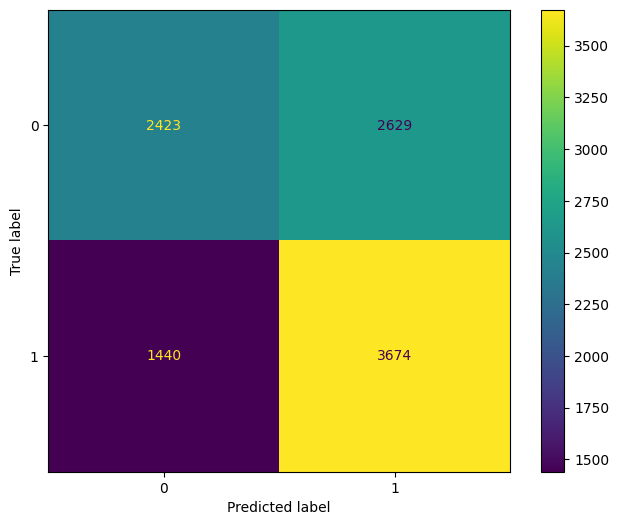

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_2 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 2 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 2 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [1.1994884910485935, 1.1657940663176265, 2.7240433402644975, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


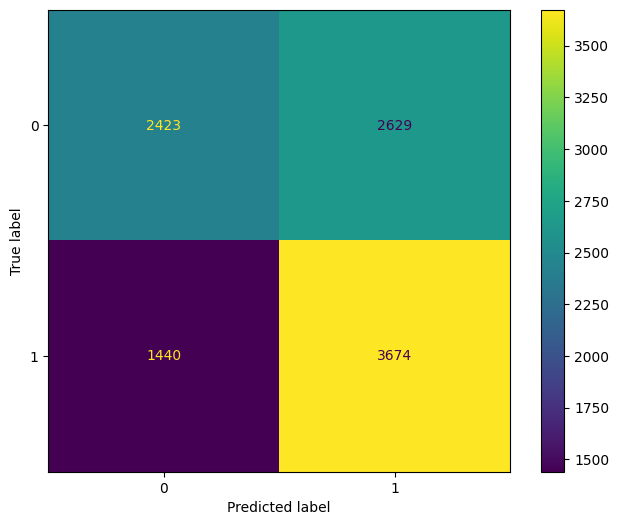

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_3 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 3 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 3 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [1.7992327365728902, 1.7486910994764397, 4.086065010396746, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


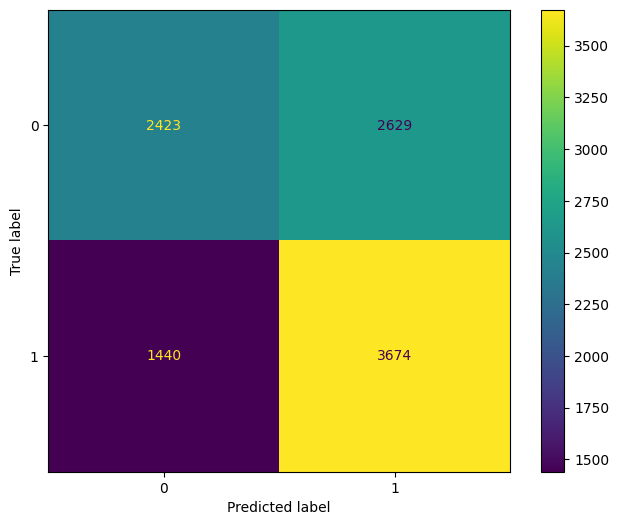

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_4 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 4 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 4 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [2.398976982097187, 2.331588132635253, 5.448086680528995, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


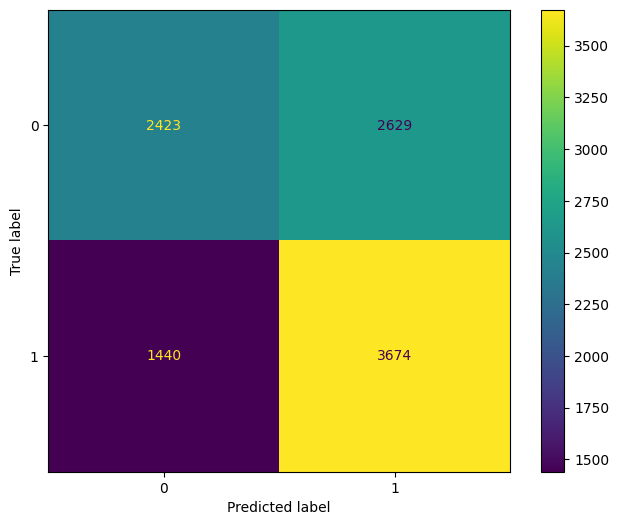

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_5 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 5 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 5 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [2.9987212276214836, 2.9144851657940665, 6.810108350661244, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


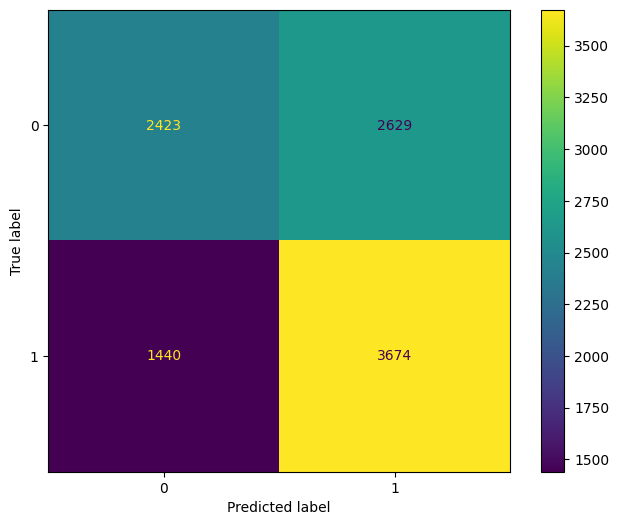

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_6 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 6 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 6 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [3.5984654731457804, 3.49738219895288, 8.172130020793492, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


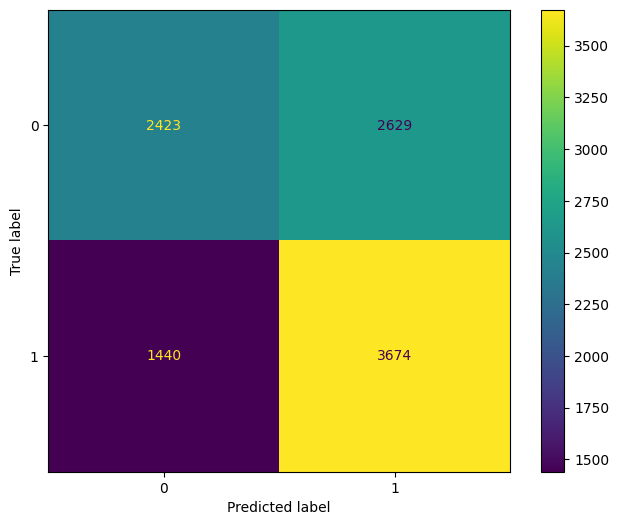

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_7 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 7 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 7 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [4.198209718670077, 4.080279232111693, 9.53415169092574, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


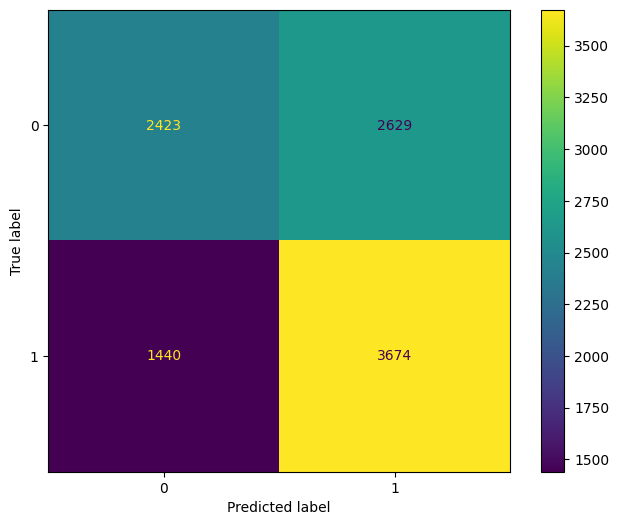

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_8 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 8 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 8 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [4.797953964194374, 4.663176265270507, 10.896173361057986, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


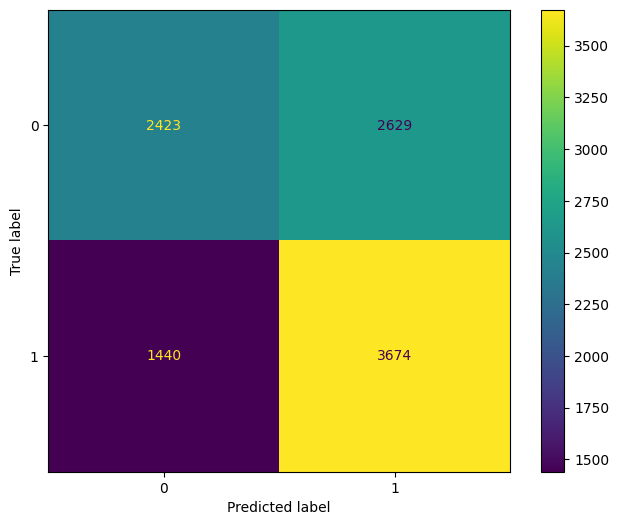

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_9 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 9 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 9 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [5.397698209718671, 5.24607329842932, 12.258195031190233, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


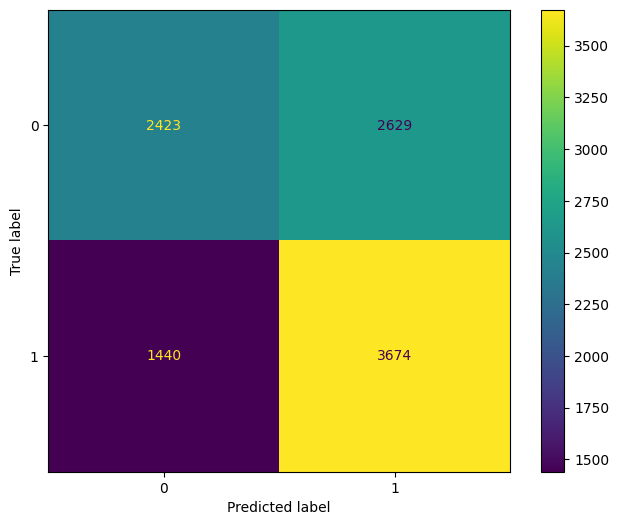

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression_train_accuracy_iteration_10 0.6014804613530729
Training accuracy of LogisticRegression() at iteration number 10 is  0.6014804613530729
Testing accuracy of LogisticRegression() at iteration number 10 is  0.5997442455242967
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      5052
           1       0.58      0.72      0.64      5114

    accuracy                           0.60     10166
   macro avg       0.61      0.60      0.59     10166
weighted avg       0.60      0.60      0.59     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [5.997442455242968, 5.828970331588134, 13.62021670132248, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0, 0, 0, 0]})


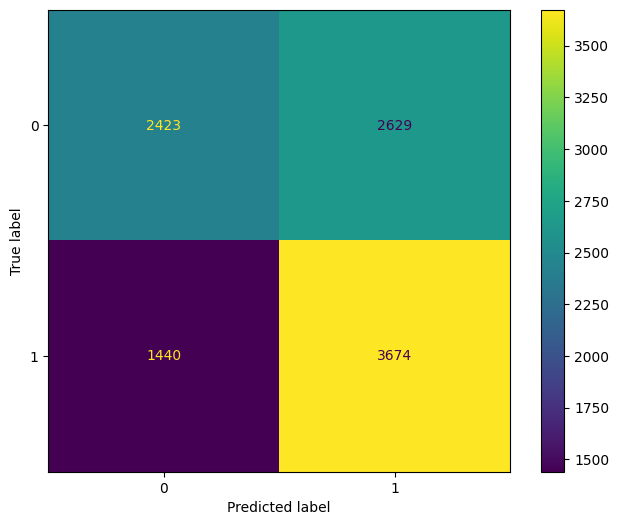


DecisionTreeClassifier_train_accuracy_iteration_1 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 1 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 1 is  0.8390714145189848
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5052
           1       0.84      0.83      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166

New_highest is reached at iteration number 1  
 0.8390714145189848 [0.83398514 0.84422011] [0.84422011 0.83398514]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8390714145189848, 0.8442201108471893, 1.6730565533535566, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomFores

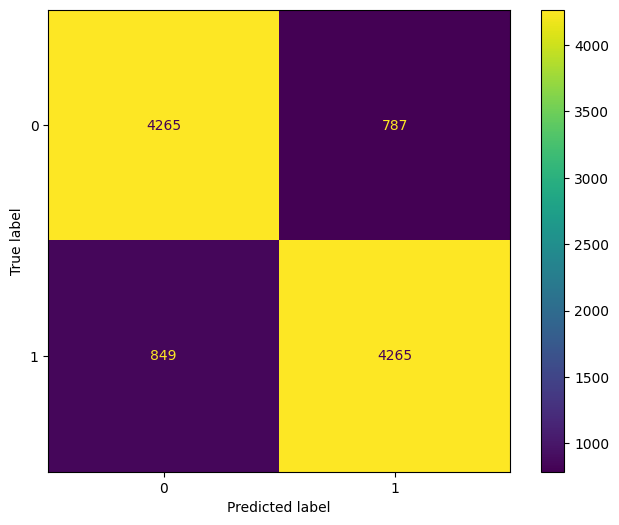


DecisionTreeClassifier_train_accuracy_iteration_2 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 2 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 2 is  0.8381861105646272
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5052
           1       0.84      0.83      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [1.6772575250836121, 1.6868035593954809, 3.345598243959361, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': 

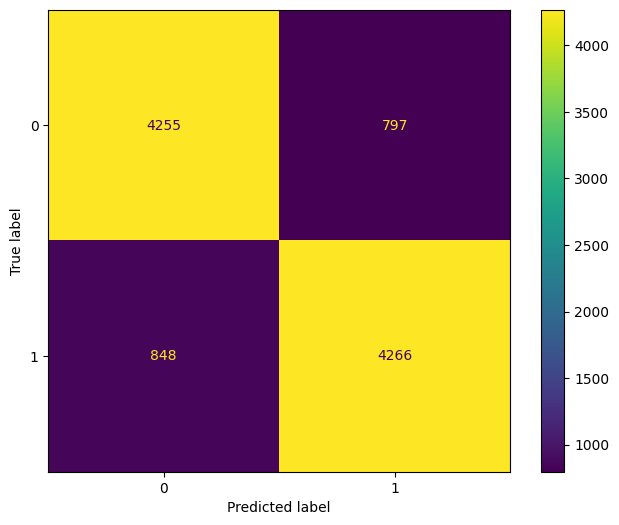


DecisionTreeClassifier_train_accuracy_iteration_3 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 3 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 3 is  0.8400550855793822
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.84      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166

New_highest is reached at iteration number 3  
 0.8400550855793822 [0.83641005 0.84371305] [0.84303246 0.83711381]

--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [2.5173126106629944, 2.5305166063012754, 5.023112520342398, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForest

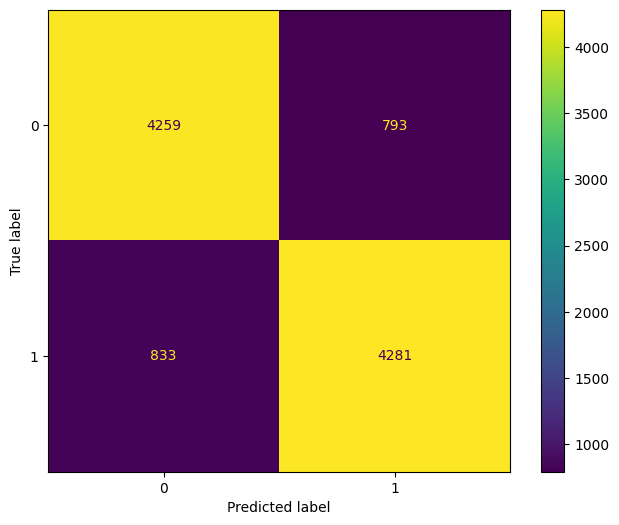


DecisionTreeClassifier_train_accuracy_iteration_4 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 4 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 4 is  0.8394648829431438
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.84      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [3.3567774936061383, 3.374451809778162, 6.6980890922390035, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': 

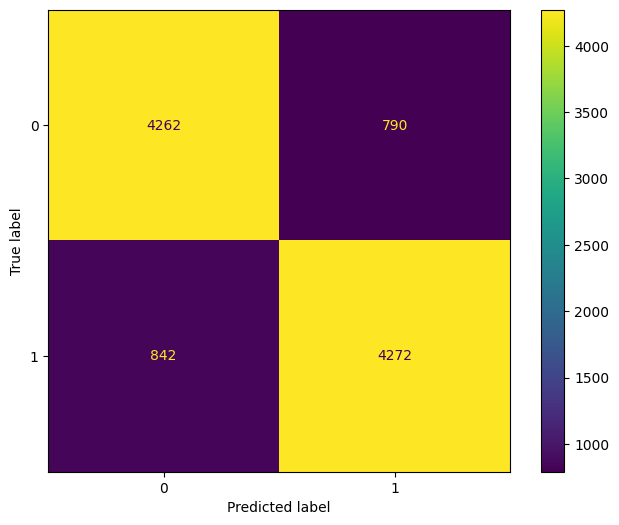


DecisionTreeClassifier_train_accuracy_iteration_5 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 5 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 5 is  0.8391697816250246
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5052
           1       0.84      0.83      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [4.195947275231163, 4.218158587094898, 8.372363978637472, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [0

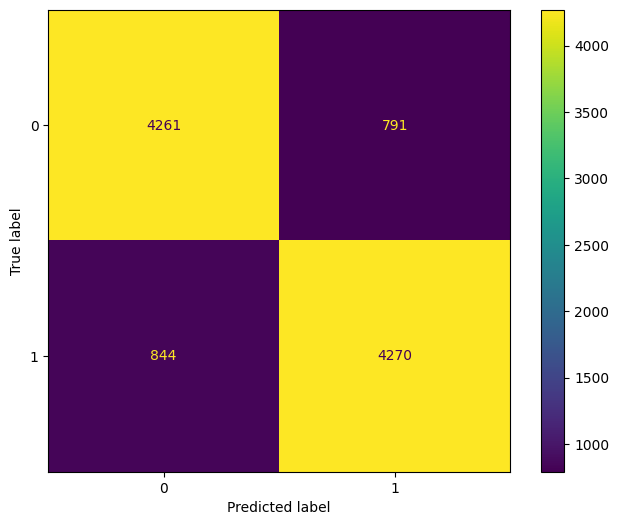


DecisionTreeClassifier_train_accuracy_iteration_6 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 6 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 6 is  0.8389730474129451
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5052
           1       0.84      0.84      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [5.0349203226441075, 5.0612610145667745, 10.046928202708958, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()':

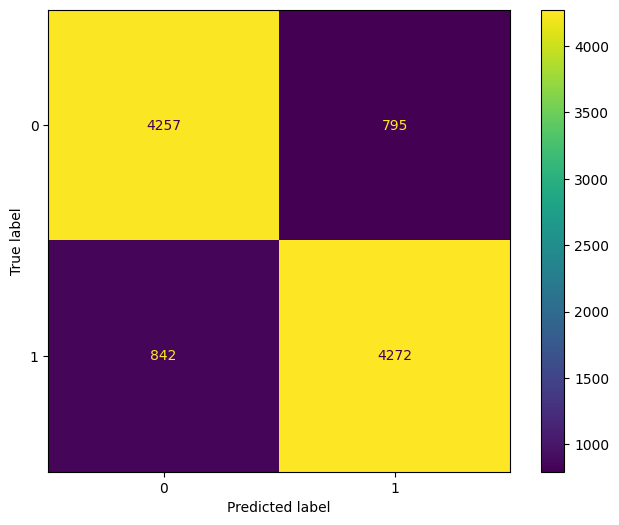


DecisionTreeClassifier_train_accuracy_iteration_7 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 7 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 7 is  0.8390714145189848
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5052
           1       0.84      0.84      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [5.8739917371630925, 5.904529865731401, 11.721574863940925, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': 

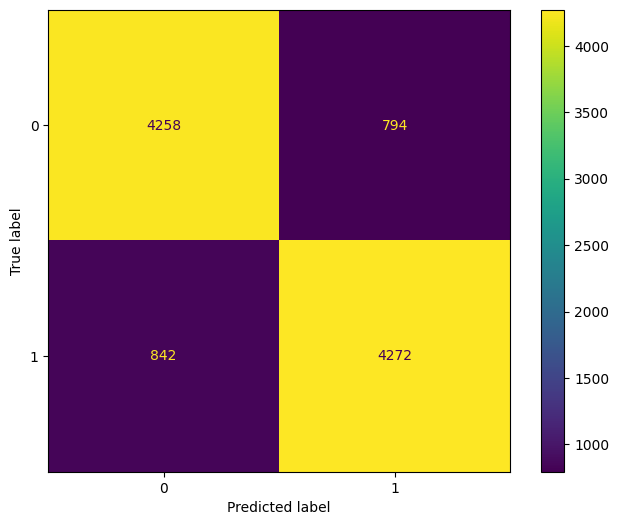


DecisionTreeClassifier_train_accuracy_iteration_8 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 8 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 8 is  0.8393665158371041
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5052
           1       0.84      0.83      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [6.713358253000196, 6.749115096378798, 13.395106257657545, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()': [

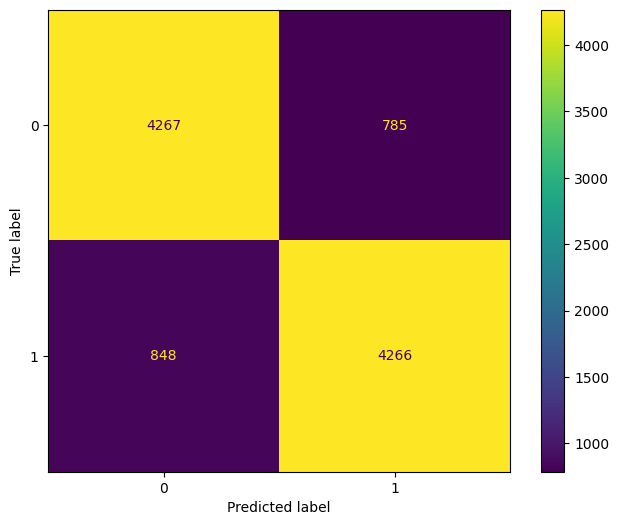


DecisionTreeClassifier_train_accuracy_iteration_9 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 9 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 9 is  0.8417273263820578
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5052
           1       0.85      0.84      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166

New_highest is reached at iteration number 9  
 0.8417273263820578 [0.83761522 0.8458654 ] [0.84540776 0.83809151]

--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [7.555085579382254, 7.594980499970667, 15.075158285834135, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestC

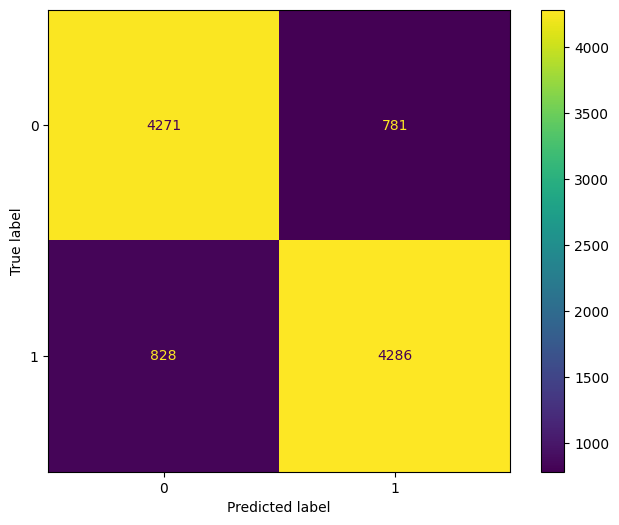


DecisionTreeClassifier_train_accuracy_iteration_10 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 10 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 10 is  0.8406452882156207
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5052
           1       0.85      0.84      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [8.395730867597875, 8.440510563261807, 16.75180680577419, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 0, 0, 0], 'RidgeClassifierCV()': [0, 0, 0, 0], 'GaussianNB()'

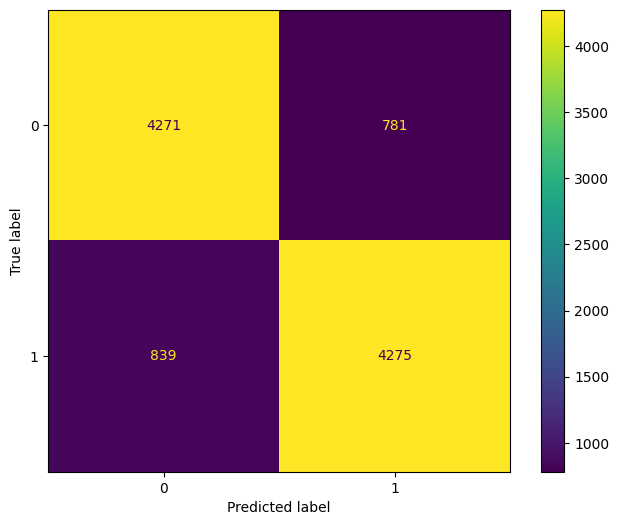

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_1 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 1 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 1 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166

New_highest is reached at iteration number 1  
 0.545052134566201 [0.54029062 0.55023629] [0.56670625 0.52366054]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.

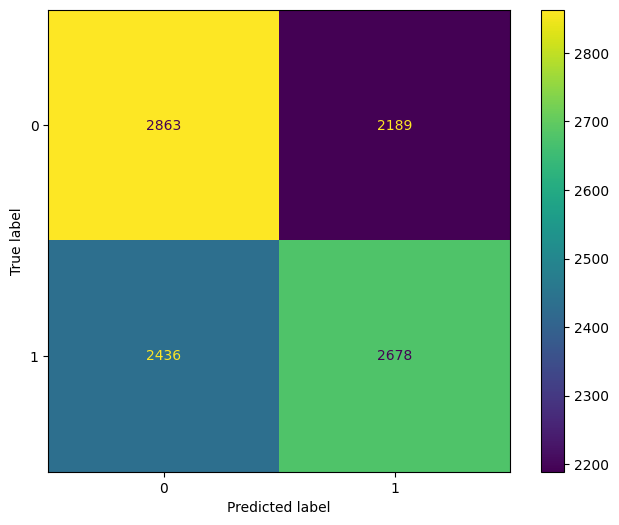

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_2 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 2 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 2 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [1.090104269132402, 1.1004725703718923, 2.1205602337832574, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassif

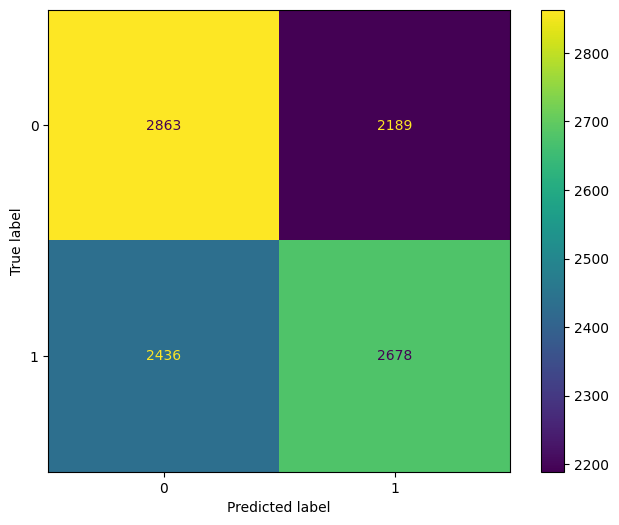

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_3 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 3 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 3 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [1.6351564036986033, 1.6507088555578384, 3.180840350674886, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassif

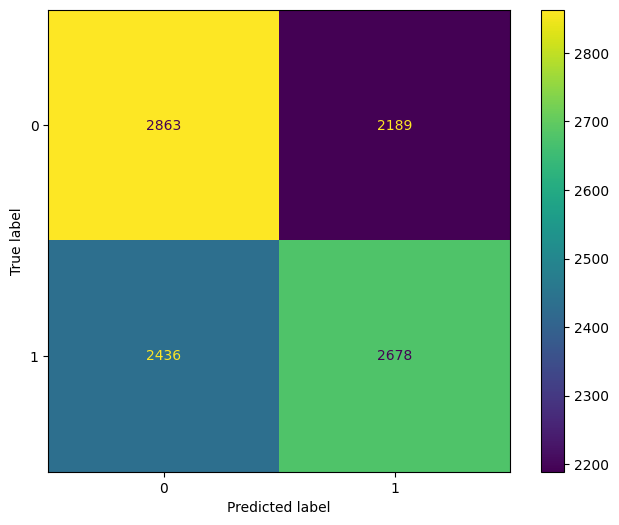

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_4 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 4 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 4 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [2.180208538264804, 2.2009451407437846, 4.241120467566515, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifi

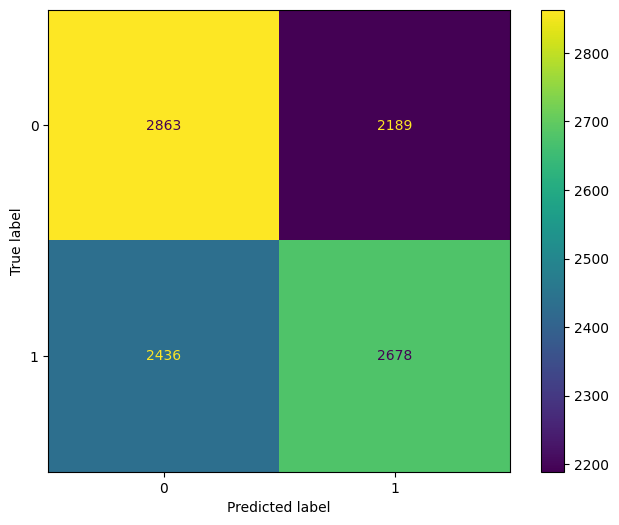

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_5 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 5 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 5 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [2.725260672831005, 2.7511814259297305, 5.301400584458143, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifi

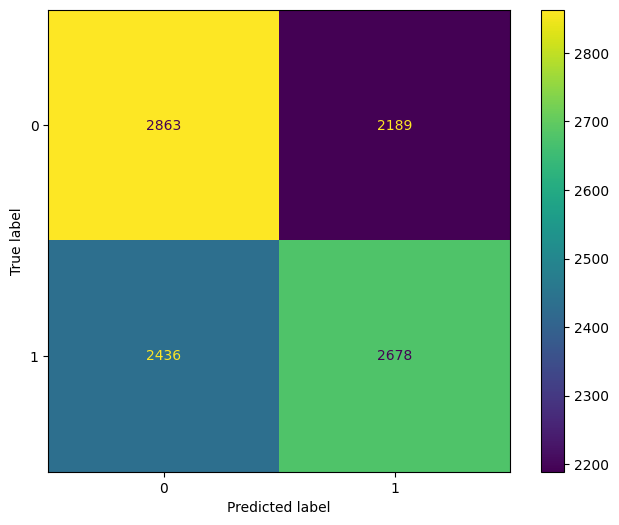

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_6 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 6 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 6 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [3.270312807397206, 3.3014177111156764, 6.361680701349772, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifi

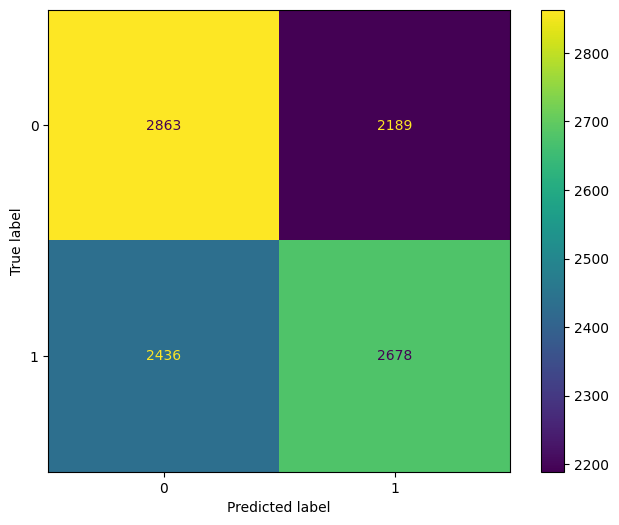

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_7 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 7 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 7 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [3.815364941963407, 3.8516539963016223, 7.4219608182414, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier

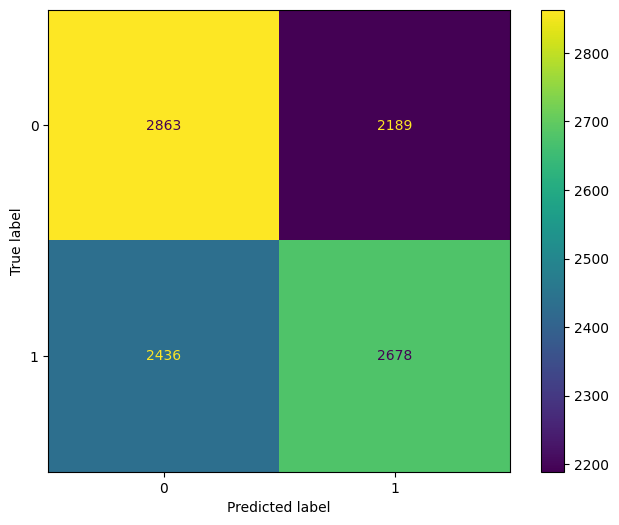

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_8 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 8 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 8 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [4.360417076529608, 4.401890281487568, 8.48224093513303, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier

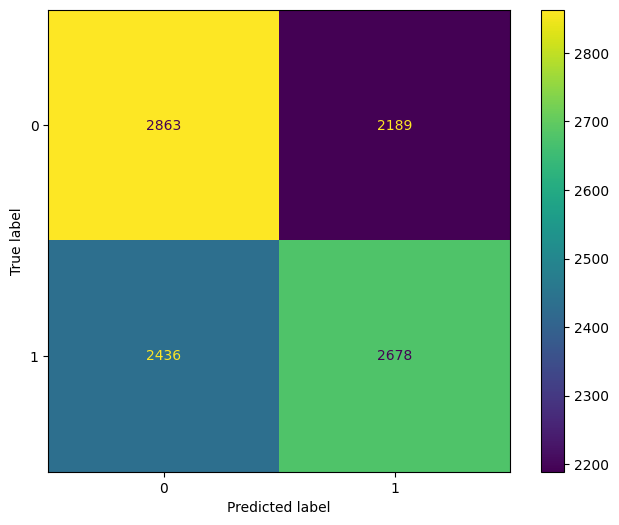

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_9 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 9 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 9 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [4.905469211095809, 4.952126566673514, 9.542521052024659, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifie

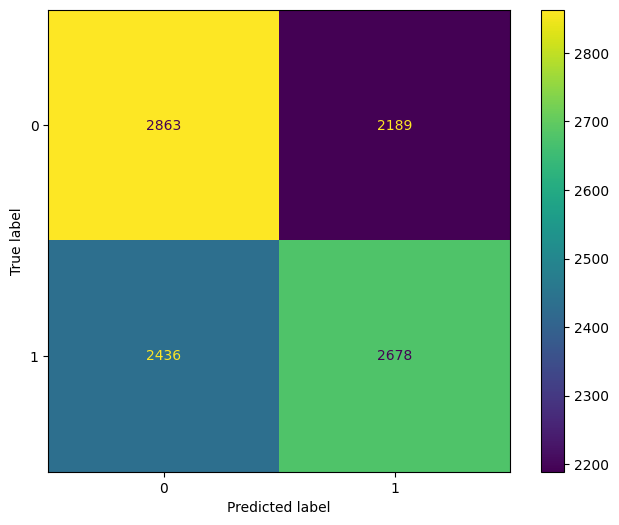

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNeighborsClassifier_train_accuracy_iteration_10 0.7146054152423579
Training accuracy of KNeighborsClassifier() at iteration number 10 is  0.7146054152423579
Testing accuracy of KNeighborsClassifier() at iteration number 10 is  0.545052134566201
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      5052
           1       0.55      0.52      0.54      5114

    accuracy                           0.55     10166
   macro avg       0.55      0.55      0.54     10166
weighted avg       0.55      0.55      0.54     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [5.45052134566201, 5.50236285185946, 10.602801168916288, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassi

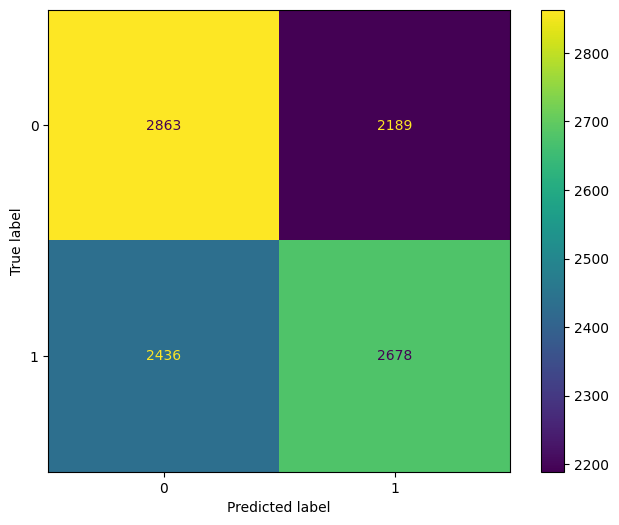

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_1 0.9999508152374394
Training accuracy of RandomForestClassifier() at iteration number 1 is  0.9999508152374394
Testing accuracy of RandomForestClassifier() at iteration number 1 is  0.8485146566987999
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5052
           1       0.85      0.86      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166

New_highest is reached at iteration number 1  
 0.8485146566987999 [0.85204491 0.84511394] [0.84125099 0.85569026]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier

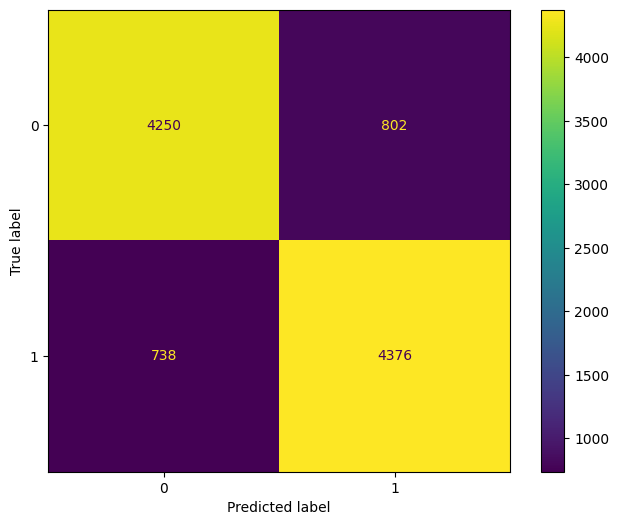

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_2 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 2 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 2 is  0.8492032264410782
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5052
           1       0.85      0.85      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166

New_highest is reached at iteration number 2  
 0.8492032264410782 [0.85112752 0.84733269] [0.84422011 0.85412593]

--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier

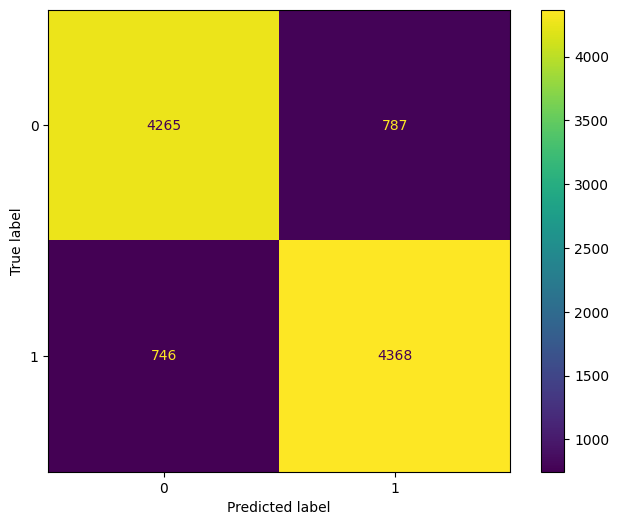

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_3 0.9999508152374394
Training accuracy of RandomForestClassifier() at iteration number 3 is  0.9999508152374394
Testing accuracy of RandomForestClassifier() at iteration number 3 is  0.8482195553806807
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5052
           1       0.85      0.85      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [2.545937438520559

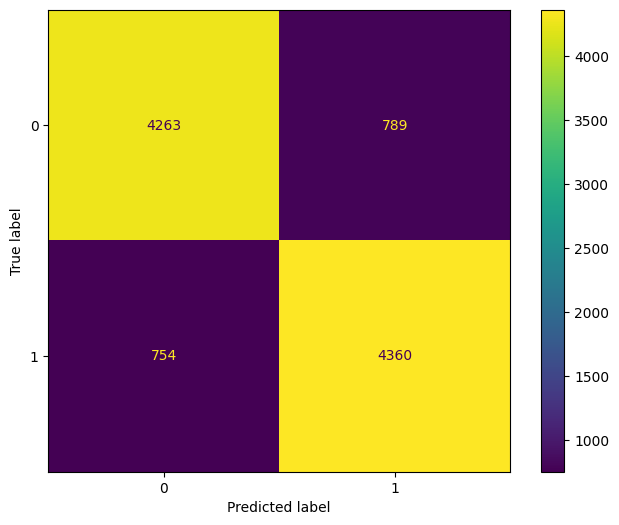

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_4 1.0
Training accuracy of RandomForestClassifier() at iteration number 4 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 4 is  0.8457603777296872
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5052
           1       0.84      0.85      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [3.391697816250246, 3.3824185676328584, 6.812367

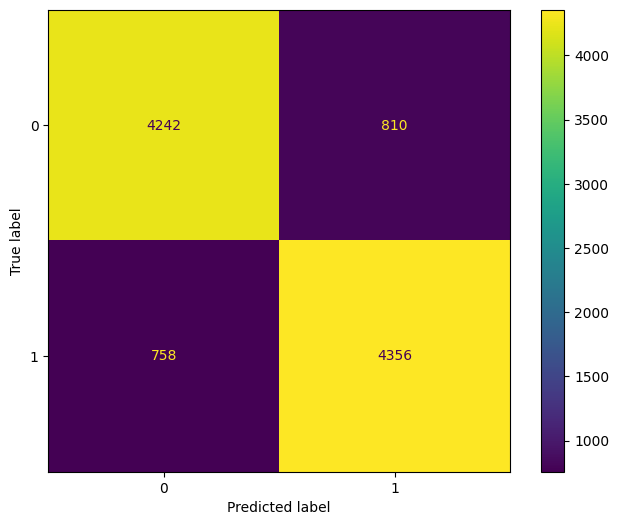

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_5 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 5 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 5 is  0.8488097580169192
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5052
           1       0.85      0.85      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [4.240507574267164

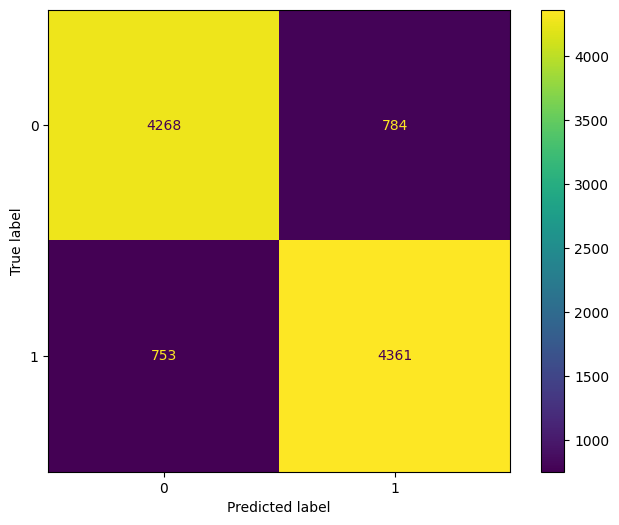

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_6 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 6 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 6 is  0.8453669093055283
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5052
           1       0.84      0.85      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [5.085874483572693

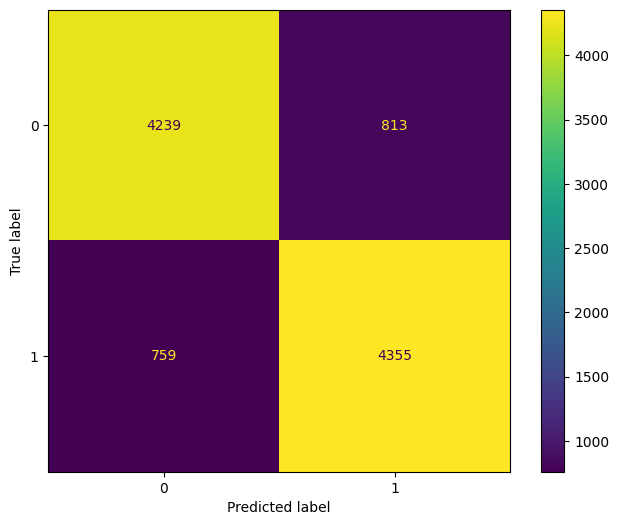

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_7 1.0
Training accuracy of RandomForestClassifier() at iteration number 7 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 7 is  0.8497934290773166
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5052
           1       0.85      0.86      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166

New_highest is reached at iteration number 7  
 0.8497934290773166 [0.85313564 0.84657005] [0.84283452 0.85666797]

--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550

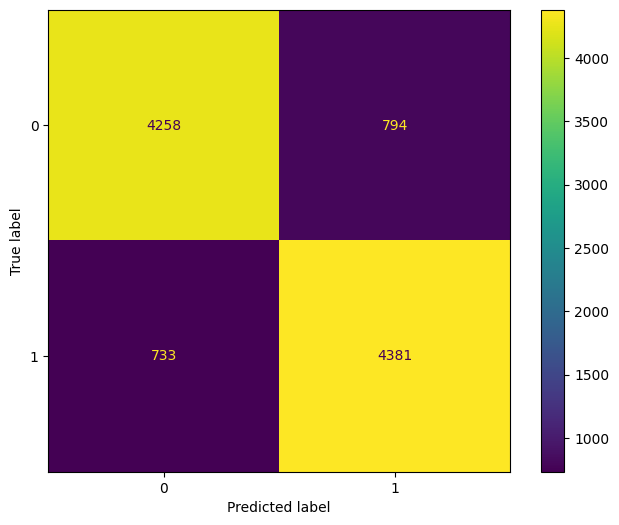

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_8 1.0
Training accuracy of RandomForestClassifier() at iteration number 8 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 8 is  0.8479244540625615
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5052
           1       0.85      0.85      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [6.783592366712571, 6.764494660465109, 13.626023

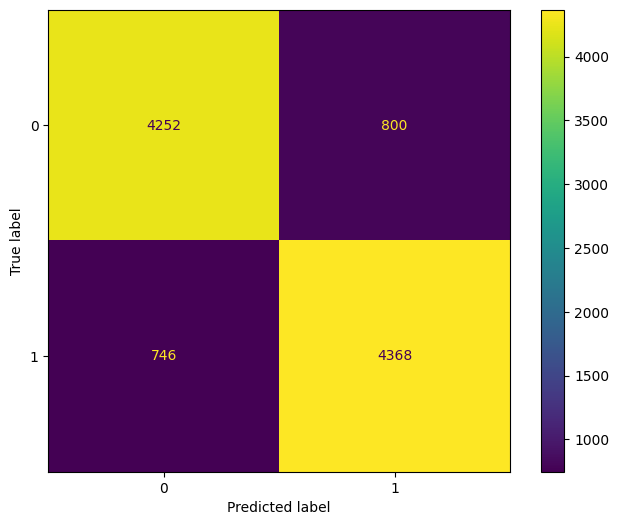

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_9 1.0
Training accuracy of RandomForestClassifier() at iteration number 9 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 9 is  0.8489081251229589
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5052
           1       0.85      0.85      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [7.63250049183553, 7.611603701986258, 15.3301669

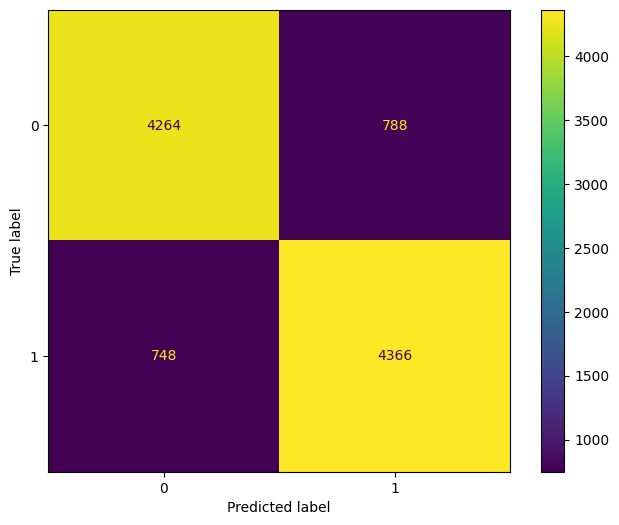

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



RandomForestClassifier_train_accuracy_iteration_10 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 10 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 10 is  0.8478260869565217
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5052
           1       0.85      0.85      0.85      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [8.48032657879

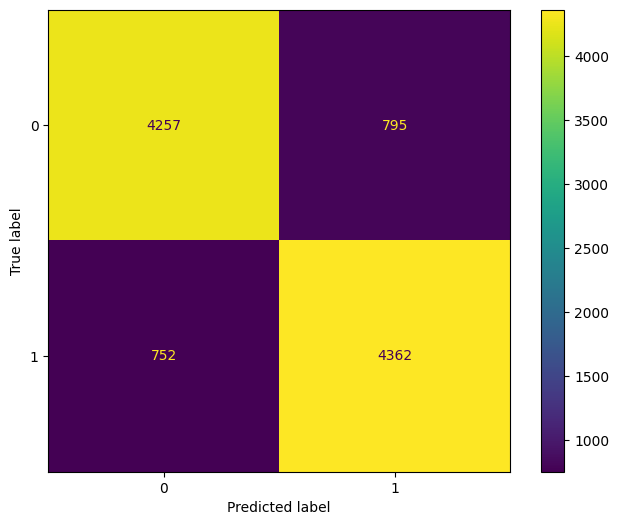

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precisio


SGDClassifier_train_accuracy_iteration_1 0.49915156284583034
Training accuracy of SGDClassifier() at iteration number 1 is  0.49915156284583034
Testing accuracy of SGDClassifier() at iteration number 1 is  0.5030493802872319
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5052
           1       0.50      1.00      0.67      5114

    accuracy                           0.50     10166
   macro avg       0.25      0.50      0.33     10166
weighted avg       0.25      0.50      0.34     10166

New_highest is reached at iteration number 1  
 0.5030493802872319 [0.         0.50304938] [0. 1.]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.55023628518594

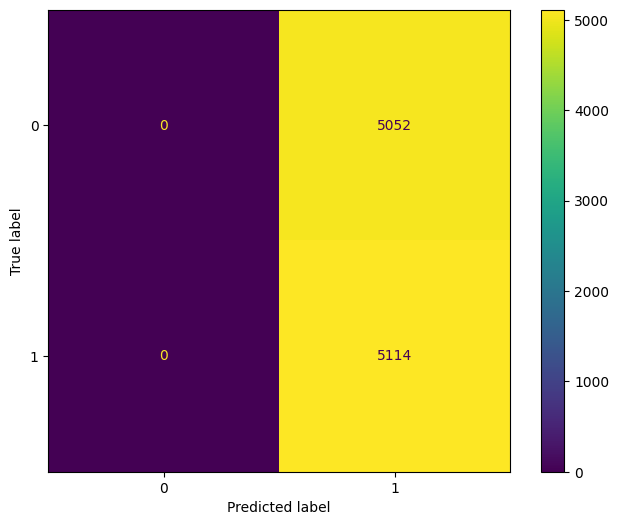

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precisio


SGDClassifier_train_accuracy_iteration_2 0.49915156284583034
Training accuracy of SGDClassifier() at iteration number 2 is  0.49915156284583034
Testing accuracy of SGDClassifier() at iteration number 2 is  0.5030493802872319
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5052
           1       0.50      1.00      0.67      5114

    accuracy                           0.50     10166
   macro avg       0.25      0.50      0.33     10166
weighted avg       0.25      0.50      0.34     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.

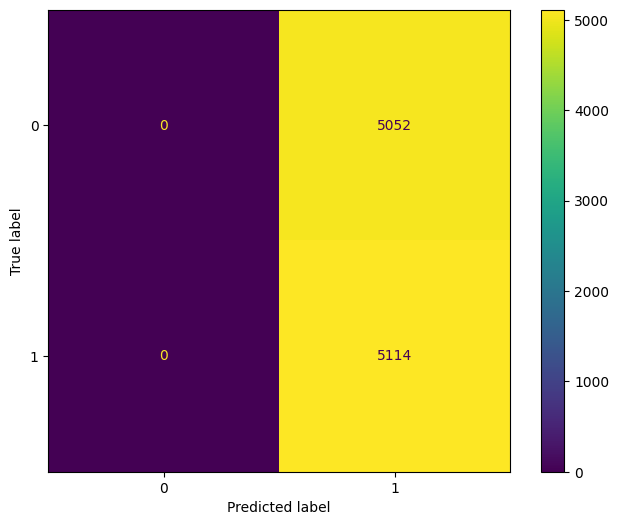

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precisio


SGDClassifier_train_accuracy_iteration_3 0.49915156284583034
Training accuracy of SGDClassifier() at iteration number 3 is  0.49915156284583034
Testing accuracy of SGDClassifier() at iteration number 3 is  0.5030493802872319
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5052
           1       0.50      1.00      0.67      5114

    accuracy                           0.50     10166
   macro avg       0.25      0.50      0.33     10166
weighted avg       0.25      0.50      0.34     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.

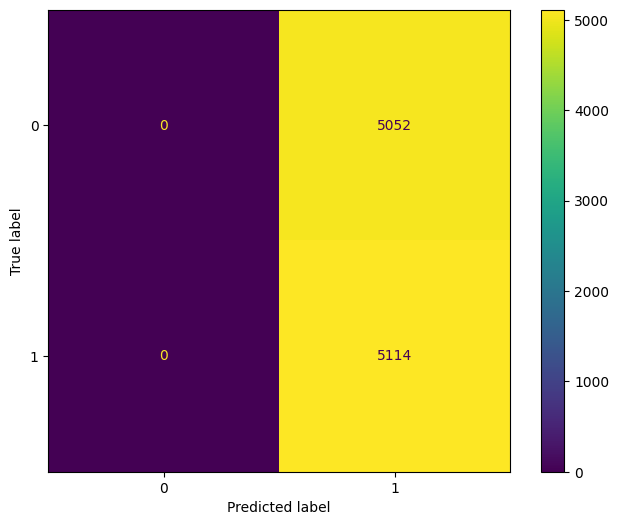

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precisio


SGDClassifier_train_accuracy_iteration_4 0.49915156284583034
Training accuracy of SGDClassifier() at iteration number 4 is  0.49915156284583034
Testing accuracy of SGDClassifier() at iteration number 4 is  0.5030493802872319
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5052
           1       0.50      1.00      0.67      5114

    accuracy                           0.50     10166
   macro avg       0.25      0.50      0.33     10166
weighted avg       0.25      0.50      0.34     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.

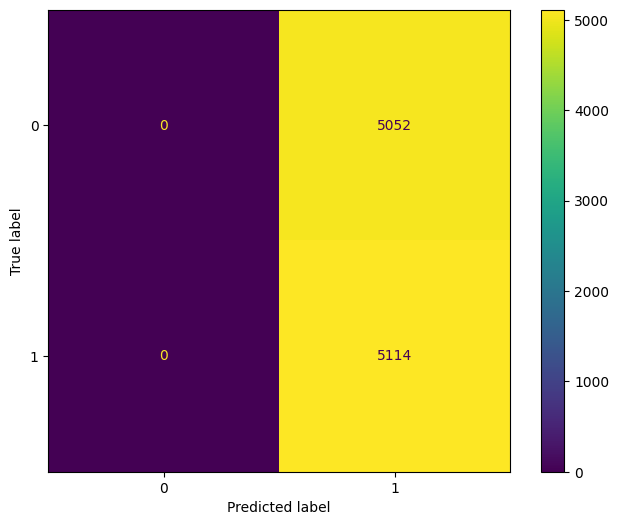

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precisio


SGDClassifier_train_accuracy_iteration_5 0.49915156284583034
Training accuracy of SGDClassifier() at iteration number 5 is  0.49915156284583034
Testing accuracy of SGDClassifier() at iteration number 5 is  0.5030493802872319
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5052
           1       0.50      1.00      0.67      5114

    accuracy                           0.50     10166
   macro avg       0.25      0.50      0.33     10166
weighted avg       0.25      0.50      0.34     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.

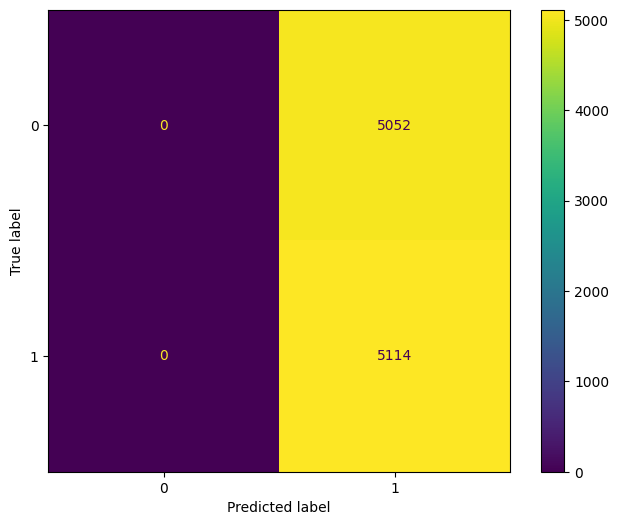

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precisio


SGDClassifier_train_accuracy_iteration_6 0.49915156284583034
Training accuracy of SGDClassifier() at iteration number 6 is  0.49915156284583034
Testing accuracy of SGDClassifier() at iteration number 6 is  0.5030493802872319
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5052
           1       0.50      1.00      0.67      5114

    accuracy                           0.50     10166
   macro avg       0.25      0.50      0.33     10166
weighted avg       0.25      0.50      0.34     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.

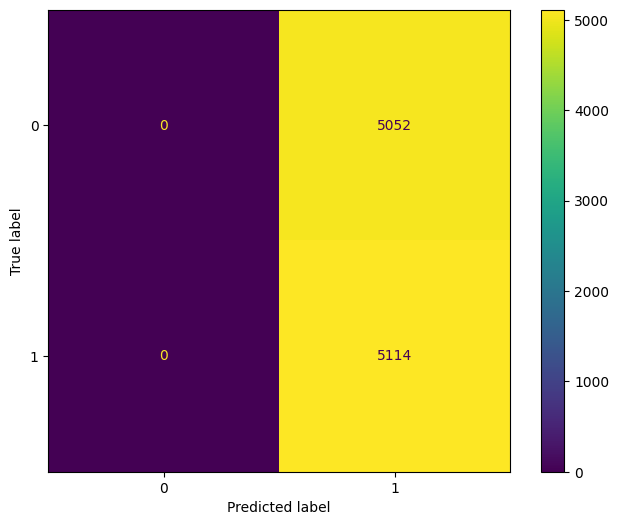

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SGDClassifier_train_accuracy_iteration_7 0.5021764257433047
Training accuracy of SGDClassifier() at iteration number 7 is  0.5021764257433047
Testing accuracy of SGDClassifier() at iteration number 7 is  0.4999016328939603
              precision    recall  f1-score   support

           0       0.50      0.99      0.66      5052
           1       0.66      0.01      0.02      5114

    accuracy                           0.50     10166
   macro avg       0.58      0.50      0.34     10166
weighted avg       0.58      0.50      0.34     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70

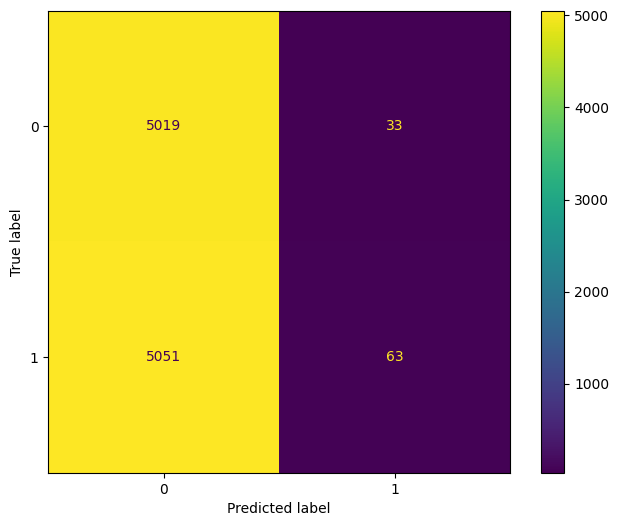

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SGDClassifier_train_accuracy_iteration_8 0.5085704448761773
Training accuracy of SGDClassifier() at iteration number 8 is  0.5085704448761773
Testing accuracy of SGDClassifier() at iteration number 8 is  0.504918355301987
              precision    recall  f1-score   support

           0       0.50      0.98      0.66      5052
           1       0.64      0.04      0.07      5114

    accuracy                           0.50     10166
   macro avg       0.57      0.51      0.37     10166
weighted avg       0.57      0.50      0.36     10166

New_highest is reached at iteration number 8  
 0.504918355301987 [0.50096164 0.64111498] [0.97961203 0.03597966]

--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.55

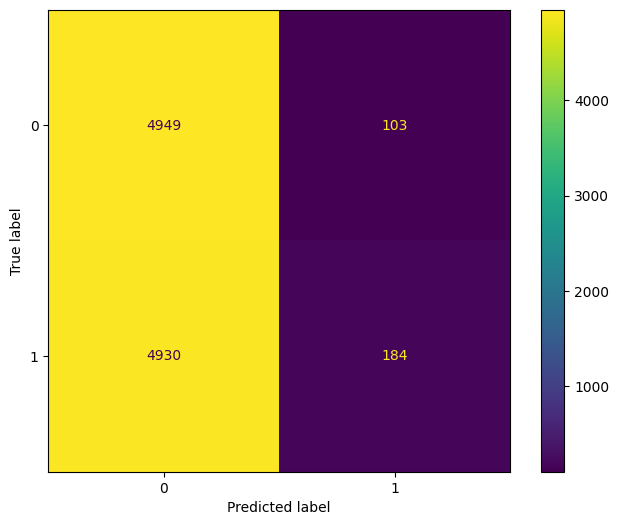

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SGDClassifier_train_accuracy_iteration_9 0.5003319971472838
Training accuracy of SGDClassifier() at iteration number 9 is  0.5003319971472838
Testing accuracy of SGDClassifier() at iteration number 9 is  0.49724572103088727
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      5052
           1       0.55      0.00      0.01      5114

    accuracy                           0.50     10166
   macro avg       0.52      0.50      0.33     10166
weighted avg       0.52      0.50      0.33     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.7

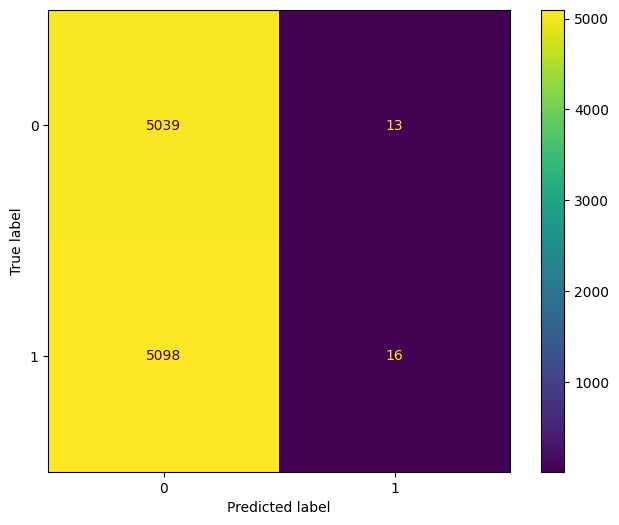

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SGDClassifier_train_accuracy_iteration_10 0.5006025133413669
Training accuracy of SGDClassifier() at iteration number 10 is  0.5006025133413669
Testing accuracy of SGDClassifier() at iteration number 10 is  0.4983277591973244
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      5052
           1       0.65      0.01      0.01      5114

    accuracy                           0.50     10166
   macro avg       0.57      0.50      0.34     10166
weighted avg       0.58      0.50      0.34     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 

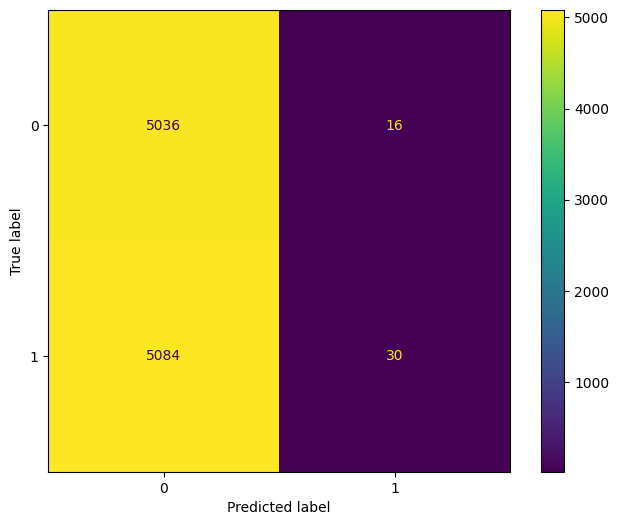

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_1 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 1 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 1 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166

New_highest is reached at iteration number 1  
 0.5149518001180405 [0.51221482 0.51755227] [0.50217736 0.52757137]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.5450521

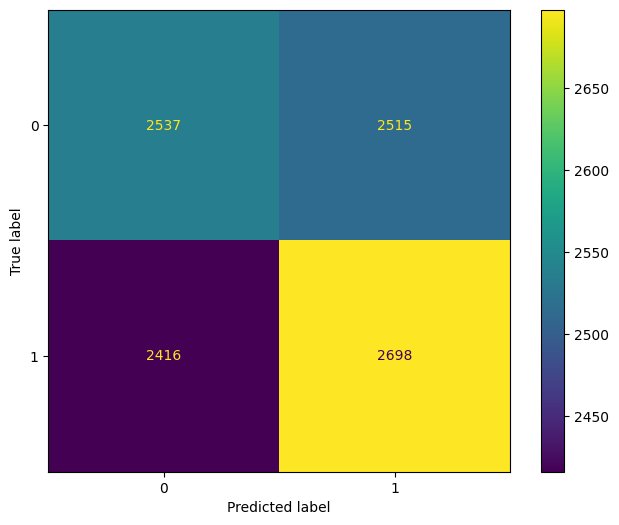

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_2 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 2 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 2 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306

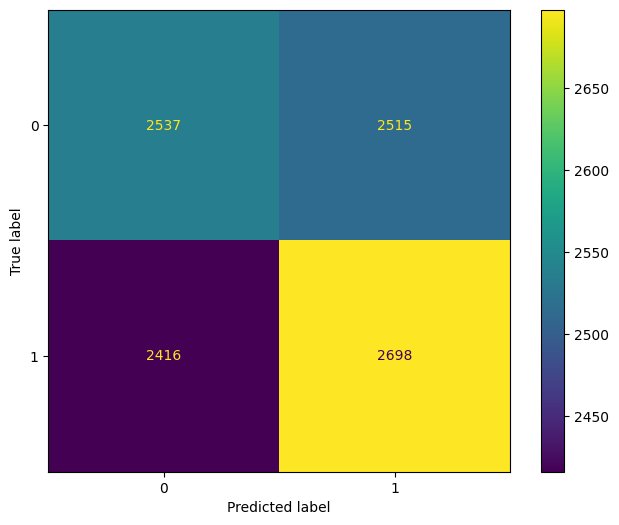

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_3 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 3 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 3 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306

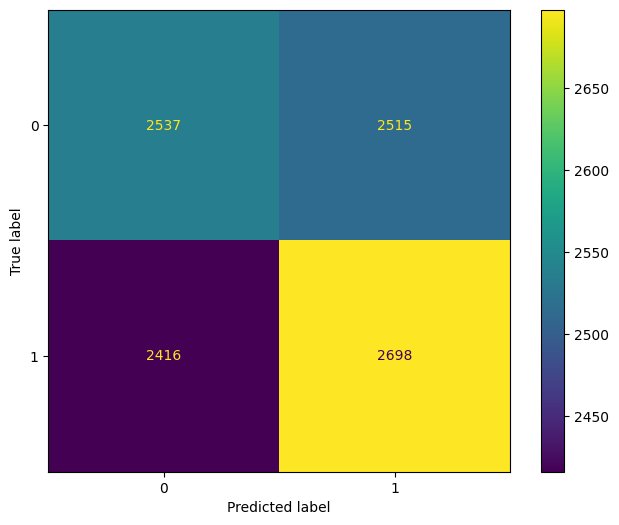

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_4 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 4 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 4 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306

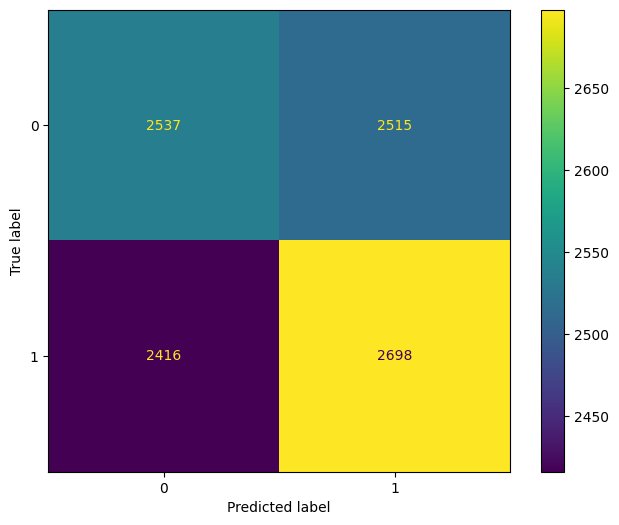

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_5 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 5 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 5 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306

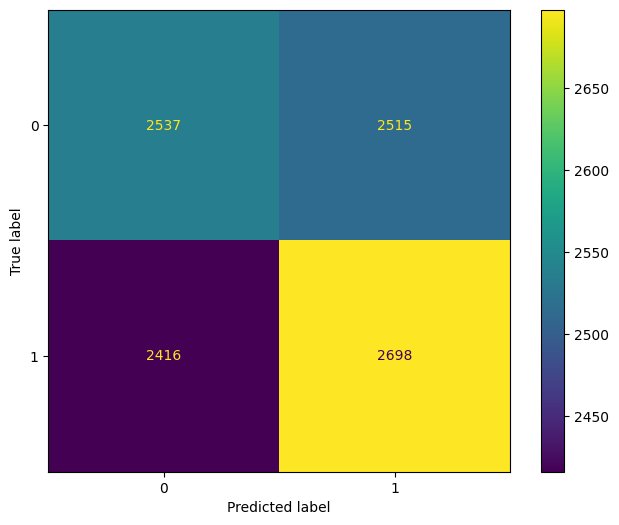

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_6 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 6 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 6 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306

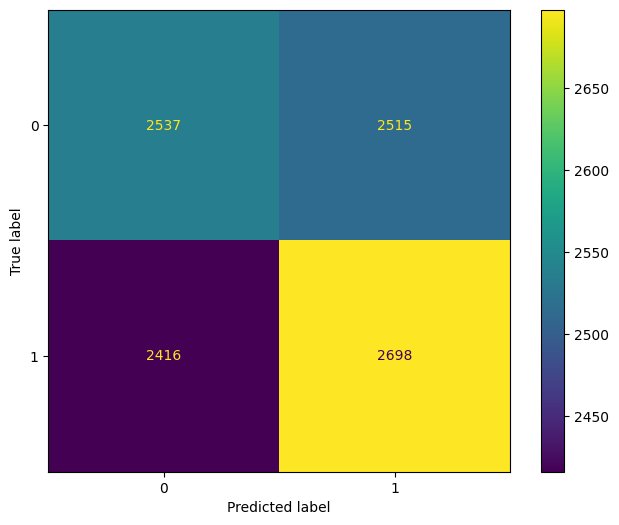

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_7 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 7 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 7 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306

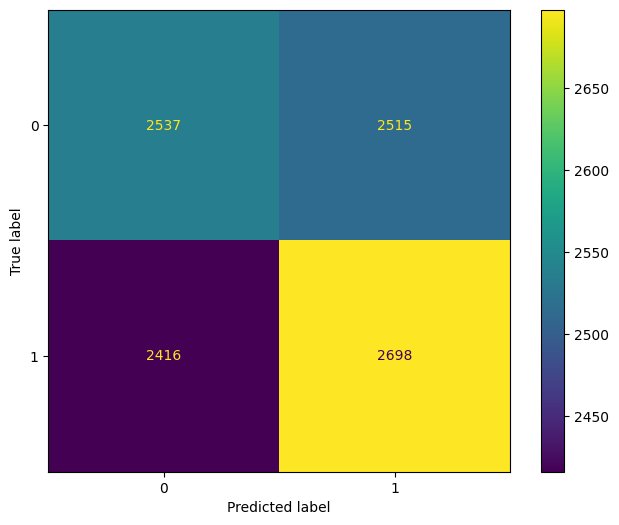

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_8 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 8 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 8 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306

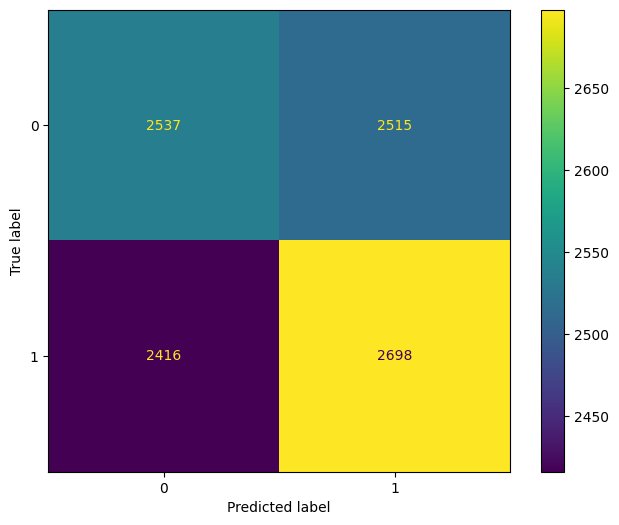

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_9 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 9 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 9 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306

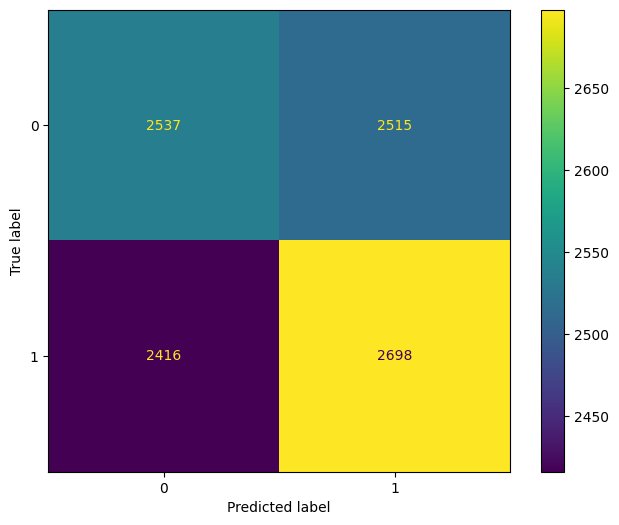

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



RidgeClassifierCV_train_accuracy_iteration_10 0.5082261515382535
Training accuracy of RidgeClassifierCV() at iteration number 10 is  0.5082261515382535
Testing accuracy of RidgeClassifierCV() at iteration number 10 is  0.5149518001180405
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      5052
           1       0.52      0.53      0.52      5114

    accuracy                           0.51     10166
   macro avg       0.51      0.51      0.51     10166
weighted avg       0.51      0.51      0.51     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.845744

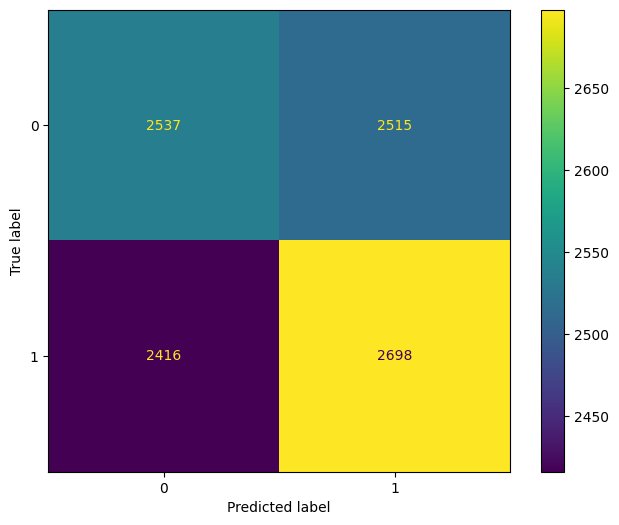

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_1 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 1 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 1 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166

New_highest is reached at iteration number 1  
 0.6445996458784182 [0.61606711 0.68918578] [0.75593824 0.53461087]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285

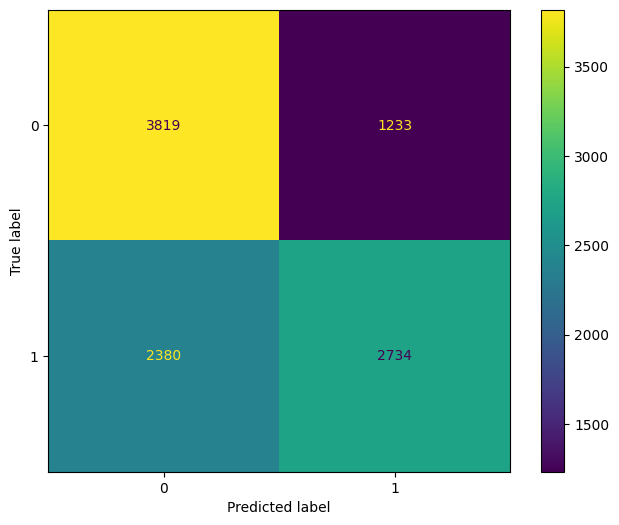

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_2 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 2 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 2 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70325013454

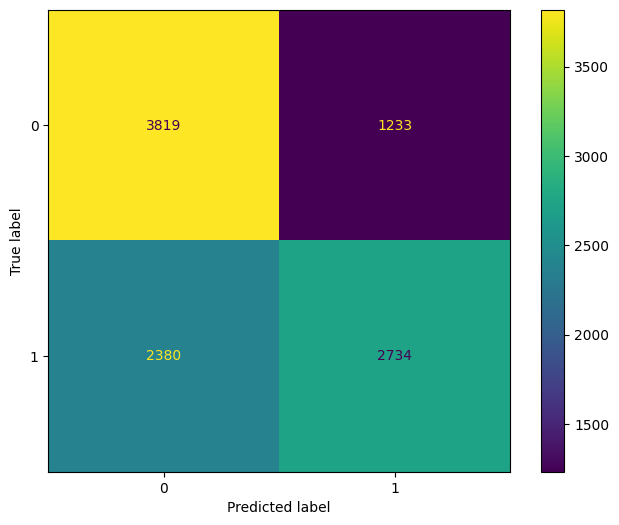

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_3 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 3 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 3 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70325013454

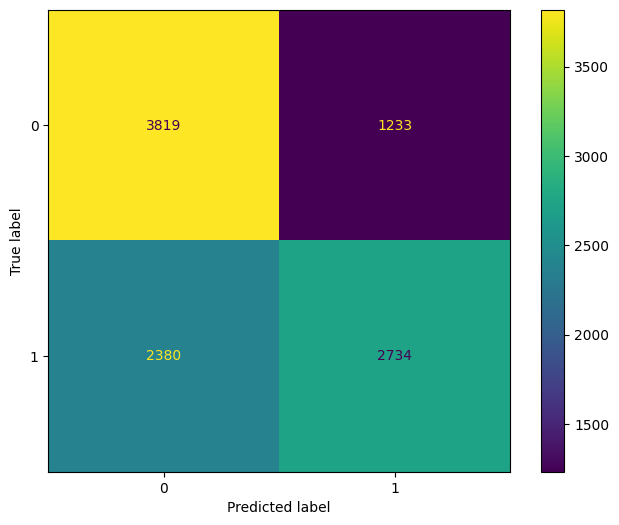

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_4 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 4 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 4 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70325013454

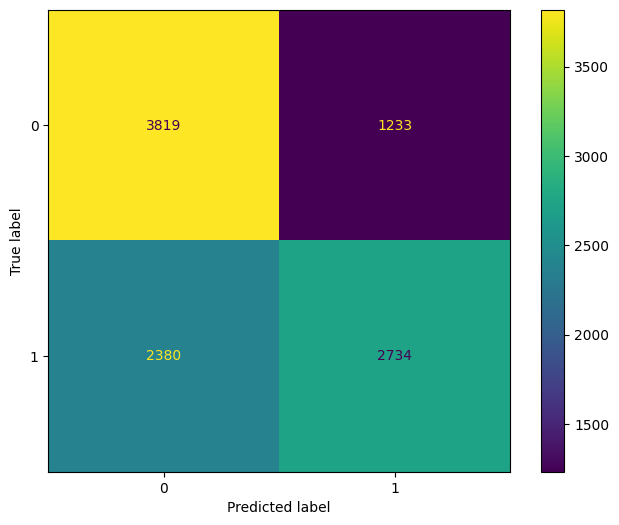

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_5 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 5 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 5 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70325013454

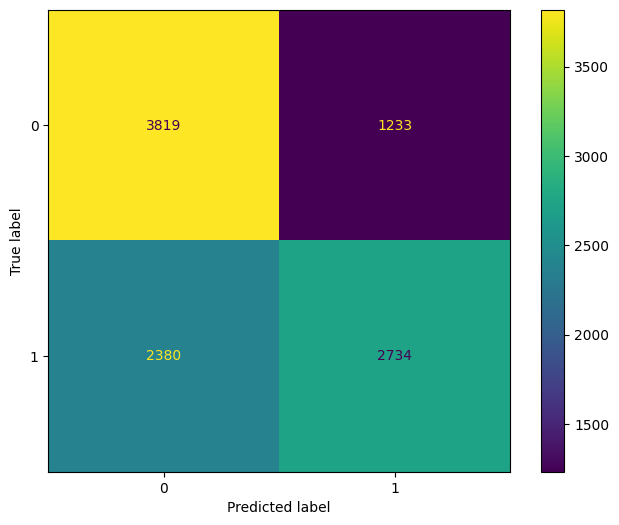

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_6 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 6 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 6 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70325013454

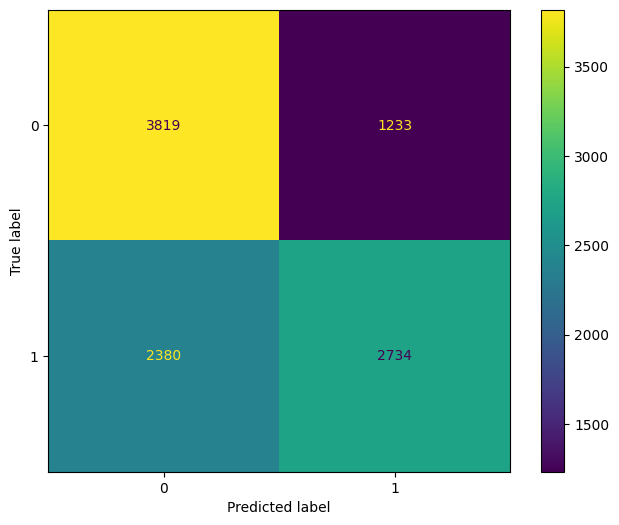

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_7 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 7 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 7 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70325013454

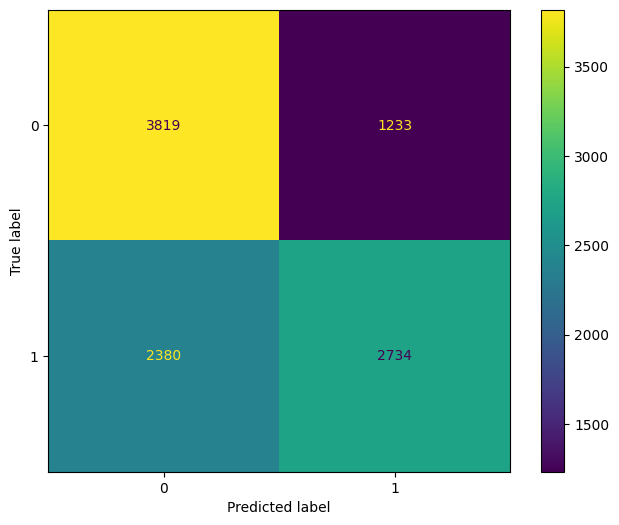

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_8 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 8 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 8 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70325013454

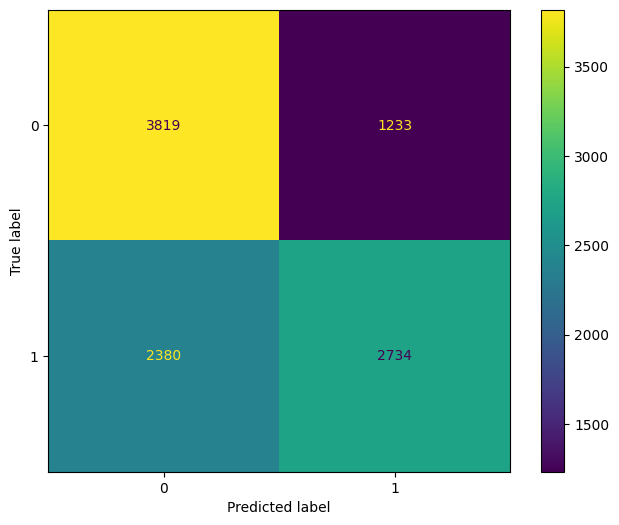

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_9 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 9 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 9 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.70325013454

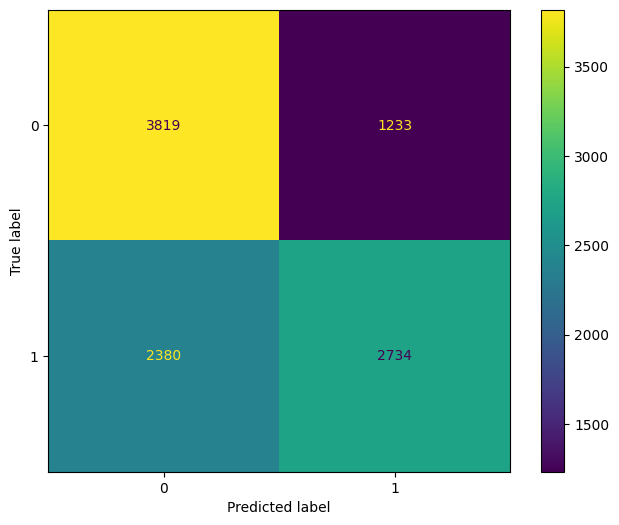

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB_train_accuracy_iteration_10 0.6454270467009321
Training accuracy of GaussianNB() at iteration number 10 is  0.6454270467009321
Testing accuracy of GaussianNB() at iteration number 10 is  0.6445996458784182
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      5052
           1       0.69      0.53      0.60      5114

    accuracy                           0.64     10166
   macro avg       0.65      0.65      0.64     10166
weighted avg       0.65      0.64      0.64     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.5997442455242968, 0.5828970331588134, 1.362021670132248, 0.0], 'DecisionTreeClassifier()': [0.8395730867597875, 0.8440510563261807, 1.675180680577419, 0.0], 'KNeighborsClassifier()': [0.545052134566201, 0.550236285185946, 1.060280116891629, 0.0], 'RandomForestClassifier()': [0.8480326578792052, 0.8457444306989167, 1.7032501

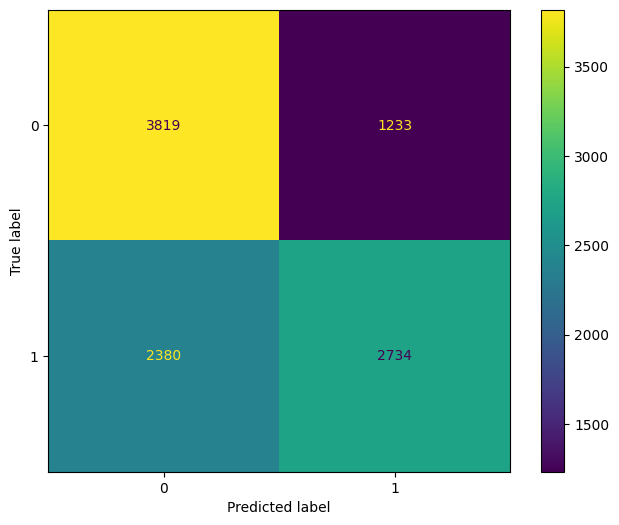

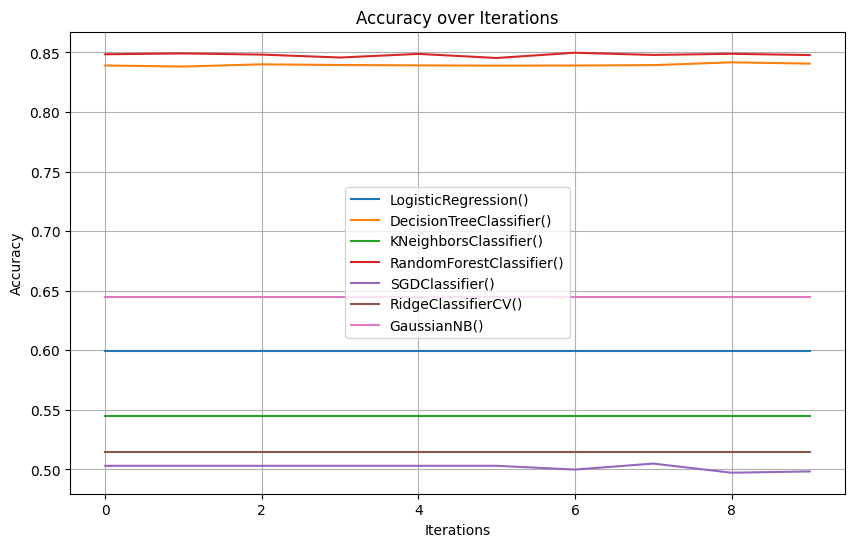

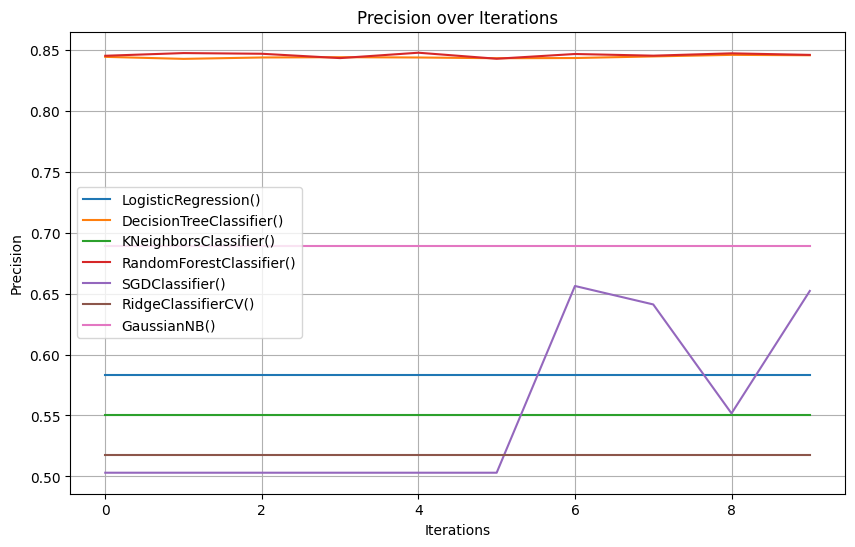

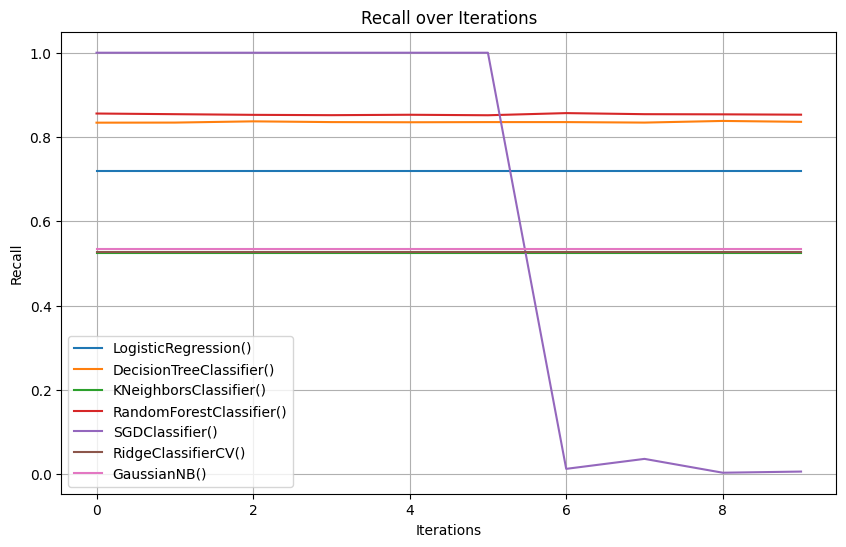

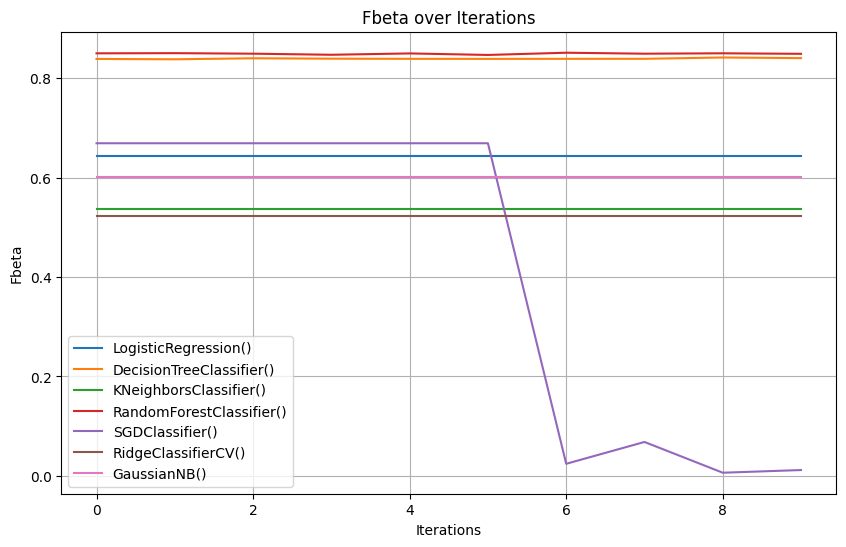

In [36]:
n_iter=10
# Perform algorithm testing and log metrics
with mlflow.start_run(run_name="logging_metrics1_deleting_all correlated", experiment_id=mlflow.get_experiment_by_name('PATH2').experiment_id) as run:
    for algo in algorithms_to_be_tested:
        for i in range(n_iter):
            algo_testing(algo=algo, test_size=0.2, X=X, Y=Y, evaluation_metric="accuracy_score", random_state=42, shuffle=True, iteration_number=i+1)

        
        # Calculate average metrics
        avg_accuracies[algo][0]/=n_iter
        avg_accuracies[algo][1]/=n_iter
        avg_accuracies[algo][2]/=n_iter
        avg_accuracies[algo][3]/=n_iter


    def plot_metrics(metrics_history, metric_name):
        fig_roc=plt.figure(figsize=(10, 6))
        for algo in algorithms_to_be_tested:
            plt.plot(metrics_history[algo][metric_name], label=algo)
        plt.xlabel('Iterations')
        plt.ylabel(metric_name.capitalize())
        plt.title(f'{metric_name.capitalize()} over Iterations')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{metric_name}_plot.png")
        plt.show()
        mlflow.log_figure(fig_roc, f"metrics/{metric_name}.png")
    
        # mlflow.log_artifact(f"{metric_name}_plot.png")
    
    # Generate and log plots for each metric
    for metric in ['accuracy', 'precision', 'recall', 'fbeta']:
        plot_metrics(metrics_history, metric)
mlflow.end_run()

In [69]:
algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()","KNeighborsClassifier()","RandomForestClassifier()","SGDClassifier()","RidgeClassifierCV()","GaussianNB()"]
 
with mlflow.start_run(run_name="logging_metrics2_deleting_most_4_correlated_then_PCA", experiment_id=mlflow.get_experiment_by_name('PATH2').experiment_id) as run:   
    for algo in algorithms_to_be_tested:
        for i in range(2,11):

            X=df_train
            Y=output_col
            # Scale data before applying PCA
            scaling=StandardScaler()

            # Use fit and transform method 
            scaling.fit(X)
            Scaled_data=scaling.transform(X)

            # Set the n_components=3
            principal=PCA(n_components=i)
            principal.fit(Scaled_data)
            X=principal.transform(Scaled_data)
            # X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
            model=eval(algo)


            # model.fit(X_train,Y_train)
            num_folds = 5
            kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
            cross_val_results = cross_val_score(model, X, Y, cv=kf)
            mlflow.log_metric(f"{algo[:-2]}_test_accuracy with {i} components and kf cv ",cross_val_results.mean())

            # predicted=model.predict(X_test)
            # accuracy=accuracy_score(y_true=Y_test, y_pred=predicted)
            print(f"Components {i}, algo is {algo},test score with cv is {cross_val_results.mean()}")



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 2, algo is LogisticRegression(),test score with cv is 0.7355840049763207


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 3, algo is LogisticRegression(),test score with cv is 0.7880343329747346


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 4, algo is LogisticRegression(),test score with cv is 0.7837257182516415


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 5, algo is LogisticRegression(),test score with cv is 0.7836863597967784


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 6, algo is LogisticRegression(),test score with cv is 0.7840995519627505


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 7, algo is LogisticRegression(),test score with cv is 0.78472911498926


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 8, algo is LogisticRegression(),test score with cv is 0.7865194059962226


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 9, algo is LogisticRegression(),test score with cv is 0.7862636302310326


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 10, algo is LogisticRegression(),test score with cv is 0.7863029790088564
Components 2, algo is DecisionTreeClassifier(),test score with cv is 0.7815027203609459
Components 3, algo is DecisionTreeClassifier(),test score with cv is 0.802888004041906
Components 4, algo is DecisionTreeClassifier(),test score with cv is 0.8253752005929316
Components 5, algo is DecisionTreeClassifier(),test score with cv is 0.83708114362091
Components 6, algo is DecisionTreeClassifier(),test score with cv is 0.8397370167758254
Components 7, algo is DecisionTreeClassifier(),test score with cv is 0.8406028369789482
Components 8, algo is DecisionTreeClassifier(),test score with cv is 0.8420980556989102
Components 9, algo is DecisionTreeClassifier(),test score with cv is 0.8432784512943474
Components 10, algo is DecisionTreeClassifier(),test score with cv is 0.8403667404411899


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 2, algo is KNeighborsClassifier(),test score with cv is 0.8055243740915075


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 3, algo is KNeighborsClassifier(),test score with cv is 0.8285033713353898


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 4, algo is KNeighborsClassifier(),test score with cv is 0.8507347630901071


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 5, algo is KNeighborsClassifier(),test score with cv is 0.8639949218767766


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 6, algo is KNeighborsClassifier(),test score with cv is 0.8683035269228302


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 7, algo is KNeighborsClassifier(),test score with cv is 0.8601781136527642


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 8, algo is KNeighborsClassifier(),test score with cv is 0.8614569673184121


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 9, algo is KNeighborsClassifier(),test score with cv is 0.8632472757440459


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Components 10, algo is KNeighborsClassifier(),test score with cv is 0.8630308642399427


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 2, algo is RandomForestClassifier(),test score with cv is 0.8060162405882325


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 3, algo is RandomForestClassifier(),test score with cv is 0.8305691153995663


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 4, algo is RandomForestClassifier(),test score with cv is 0.8610438332146767


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 5, algo is RandomForestClassifier(),test score with cv is 0.8737138280732657


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 6, algo is RandomForestClassifier(),test score with cv is 0.8781010164859012


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 7, algo is RandomForestClassifier(),test score with cv is 0.8784551612925389


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 8, algo is RandomForestClassifier(),test score with cv is 0.8781207053903722


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 9, algo is RandomForestClassifier(),test score with cv is 0.8772353433737778


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Components 10, algo is RandomForestClassifier(),test score with cv is 0.87823874591762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 2, algo is SGDClassifier(),test score with cv is 0.7145527190109988


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 3, algo is SGDClassifier(),test score with cv is 0.7914379432265515


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 4, algo is SGDClassifier(),test score with cv is 0.7940348503092637


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 5, algo is SGDClassifier(),test score with cv is 0.7916149517614098


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 6, algo is SGDClassifier(),test score with cv is 0.7882899790675959


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 7, algo is SGDClassifier(),test score with cv is 0.7902180382144353


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 8, algo is SGDClassifier(),test score with cv is 0.7819551258261893


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 9, algo is SGDClassifier(),test score with cv is 0.7822502348859401


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 10, algo is SGDClassifier(),test score with cv is 0.7817977384565257


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 2, algo is RidgeClassifierCV(),test score with cv is 0.7178185920894654


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 3, algo is RidgeClassifierCV(),test score with cv is 0.7943102723999513


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 4, algo is RidgeClassifierCV(),test score with cv is 0.7918116646840025


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 5, algo is RidgeClassifierCV(),test score with cv is 0.7919493844386818


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 6, algo is RidgeClassifierCV(),test score with cv is 0.7906509270265101


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 7, algo is RidgeClassifierCV(),test score with cv is 0.7866178021333807


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 8, algo is RidgeClassifierCV(),test score with cv is 0.7881326633080243


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 9, algo is RidgeClassifierCV(),test score with cv is 0.785456996736612


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Components 10, algo is RidgeClassifierCV(),test score with cv is 0.7858504748378103


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 2, algo is GaussianNB(),test score with cv is 0.7458537437417376


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 3, algo is GaussianNB(),test score with cv is 0.7657833045715592


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 4, algo is GaussianNB(),test score with cv is 0.7704066282301111


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 5, algo is GaussianNB(),test score with cv is 0.775482488961643


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 6, algo is GaussianNB(),test score with cv is 0.7755218358040589


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 7, algo is GaussianNB(),test score with cv is 0.7753447692069637
Components 8, algo is GaussianNB(),test score with cv is 0.775797269507194


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Components 9, algo is GaussianNB(),test score with cv is 0.7777056474911935
Components 10, algo is GaussianNB(),test score with cv is 0.7802828966359611


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle,iteration_number):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    
    
    
    scaling=StandardScaler()
    scaling.fit(X)
    Scaled_data=scaling.transform(X)
    principal=PCA(n_components=6)
    principal.fit(Scaled_data)
    X_new=principal.transform(Scaled_data)
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X_new, Y, cv=kf).mean()

        
        
        
        
        
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    accuracy=evaluation_metric(y_true=Y_test, y_pred=predicted)
    precision,recall,fbeta_score,support=precision_recall_fscore_support(y_true=Y_test,y_pred=predicted,labels=[0,1])
    metrics_history[algo]['accuracy'].append(accuracy)
    metrics_history[algo]['precision'].append(precision[1])
    metrics_history[algo]['recall'].append(recall[1])
    metrics_history[algo]['fbeta'].append(fbeta_score[1])
    metrics_history[algo]['cross_val_results'].append(cross_val_results)   
        
    print()  
    print(f"{algo[:-2]}_train_accuracy_iteration_{iteration_number}", model.score(X_train, Y_train))
    mlflow.log_metric(f"{algo[:-2]}_test_accuracy_iteration_{iteration_number}", accuracy)
    mlflow.log_metric(f"{algo[:-2]}_precision_iteration_{iteration_number}", precision[1])
    mlflow.log_metric(f"{algo[:-2]}_recall_iteration_{iteration_number}", recall[1])
    mlflow.log_metric(f"{algo[:-2]}_fbeta_score_iteration_{iteration_number}", fbeta_score[1])
    mlflow.log_metric(f"{algo[:-2]}_cross_validation_iteration_{iteration_number}", cross_val_results)
    
    
    print(f"Training accuracy of {model} at iteration number {iteration_number} is ", model.score(X_train,Y_train))
    print(f"Testing accuracy of {model} at iteration number {iteration_number} is ",accuracy)  
    print(f"Cross validation mean accuracy of {model} at iteration number {iteration_number} is ",cross_val_results)
    cl=classification_report(y_true=Y_test,y_pred=predicted)
    print(cl)
    if accuracy>highest_accuracies[algo][0]:
        
        highest_accuracies[algo][0]=accuracy
        highest_accuracies[algo][1]=precision[1]
        highest_accuracies[algo][2]=recall[1]
        highest_accuracies[algo][2]=fbeta_score[1]

        print(f"New_highest is reached at iteration number {iteration_number} ",'\n',accuracy,precision,recall)
    avg_accuracies[algo][0]+=accuracy
    avg_accuracies[algo][1]+=precision[1]
    avg_accuracies[algo][2]+=recall[1]
    avg_accuracies[algo][2]+=fbeta_score[1]
    print()
    print("--------------------------------------------------------")
    print(f"At Iteration {iteration_number}")
    print(avg_accuracies)
    cm = confusion_matrix(y_true=Y_test, y_pred=predicted, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure object
    disp.plot(ax=ax)  # Plot the confusion matrix on the figure
    plt.show()
    mlflow.log_figure(fig, f"metrics/{algo}_{iteration_number}_confusion_matrix.png")

    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_1 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 1 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 1 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 1 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166

New_highest is reached at iteration number 1  
 0.7830021640763328 [0.83031569 0.74820758] [0.70803642 0.85705905]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0], 'DecisionTreeClassifier()': [

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


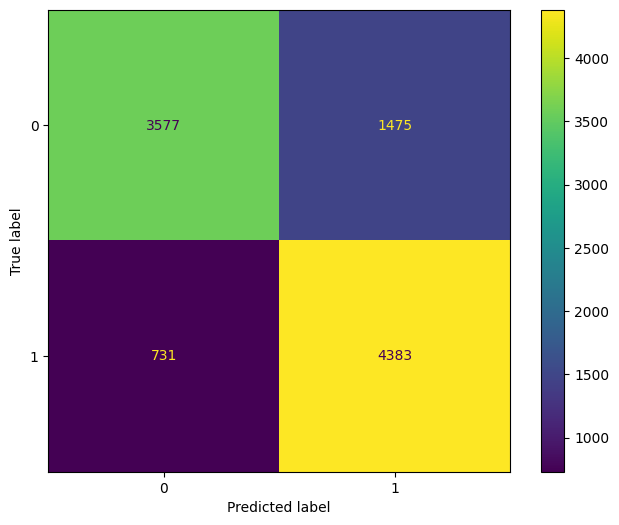

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_2 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 2 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 2 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 2 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [1.5660043281526657, 1.496415158757255, 3.312003633952304, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

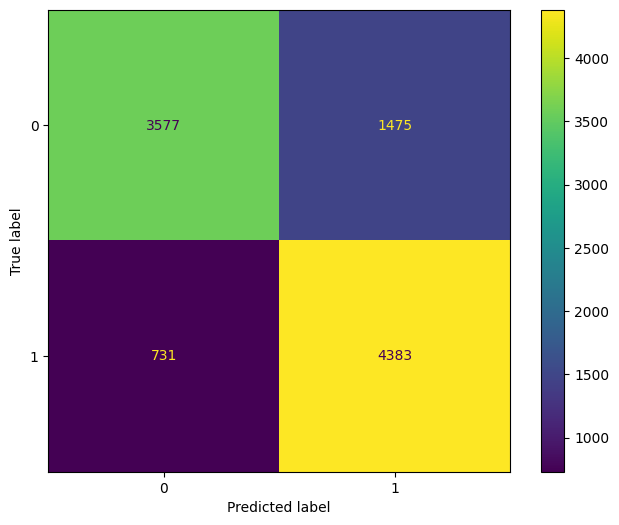

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_3 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 3 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 3 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 3 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [2.3490064922289986, 2.2446227381358823, 4.968005450928456, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [

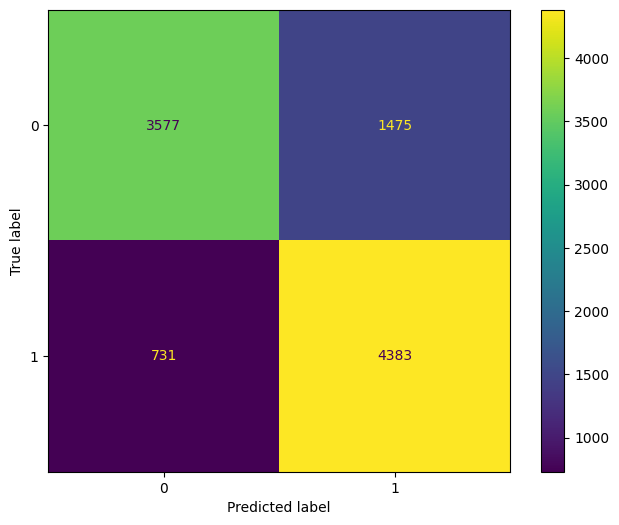

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_4 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 4 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 4 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 4 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [3.1320086563053313, 2.99283031751451, 6.6240072679046085, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

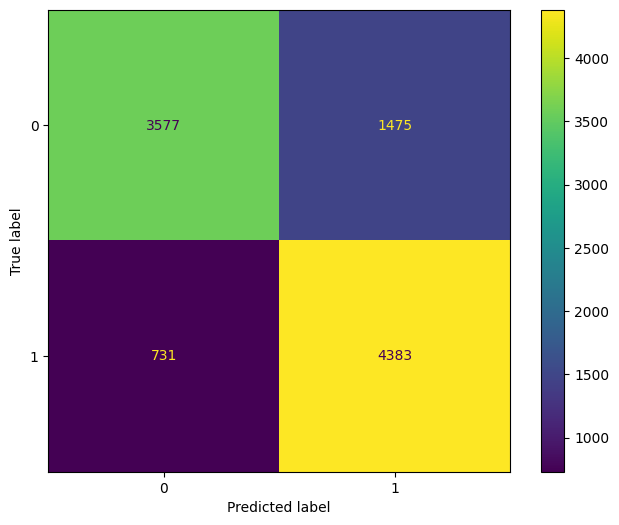

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_5 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 5 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 5 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 5 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [3.915010820381664, 3.7410378968931375, 8.28000908488076, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0,

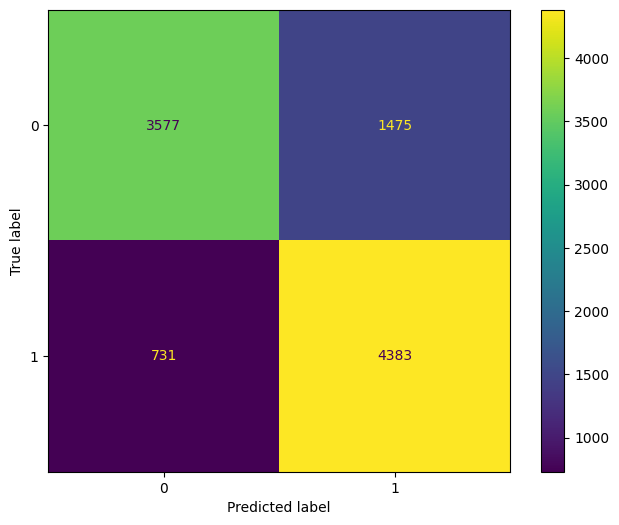

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_6 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 6 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 6 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 6 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [4.698012984457997, 4.489245476271765, 9.936010901856912, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


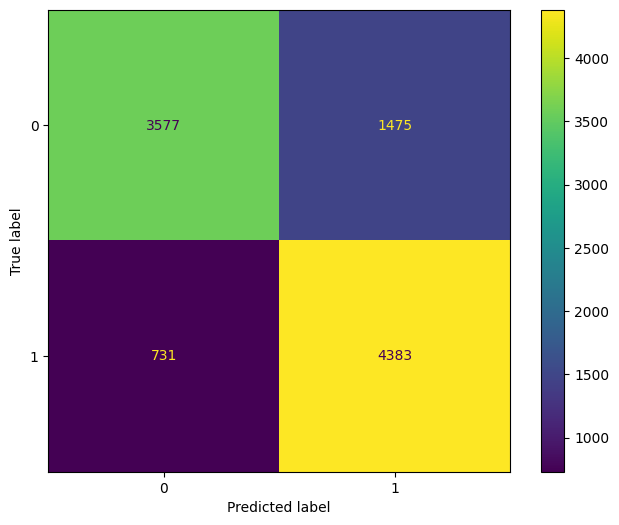

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_7 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 7 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 7 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 7 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [5.48101514853433, 5.237453055650392, 11.592012718833065, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0,

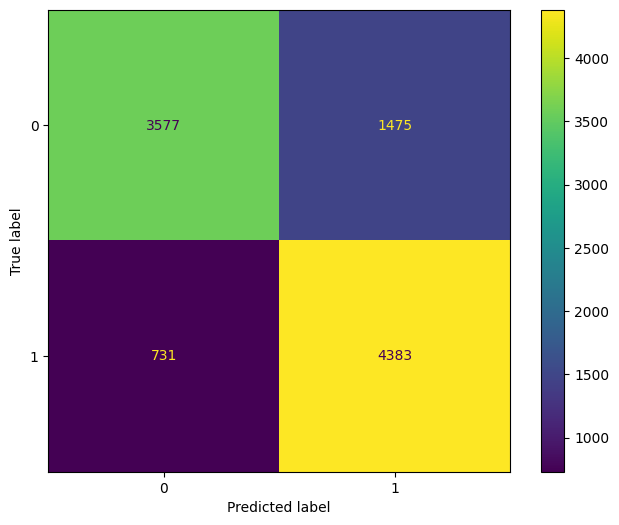

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_8 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 8 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 8 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 8 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [6.264017312610663, 5.98566063502902, 13.248014535809217, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0,

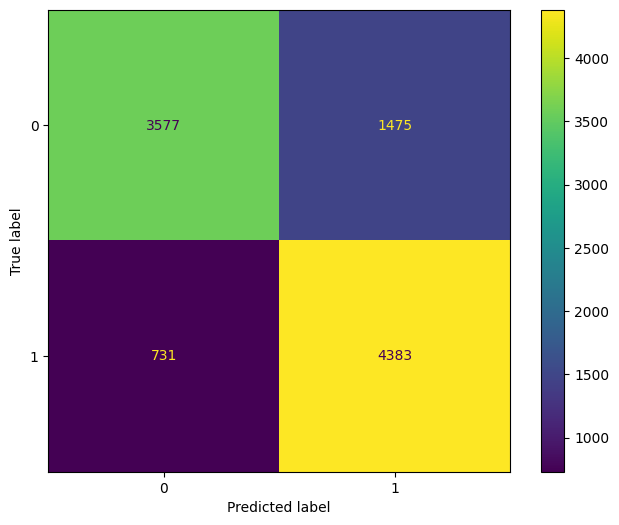

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_9 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 9 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 9 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 9 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [7.047019476686995, 6.733868214407647, 14.90401635278537, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0,

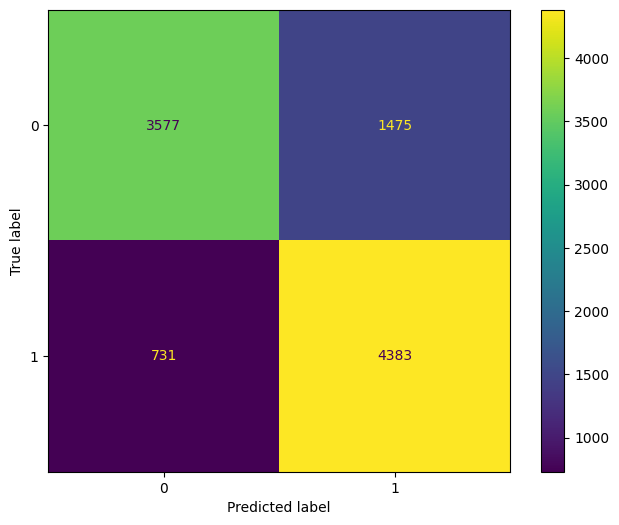

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_10 0.7845215552221921
Training accuracy of LogisticRegression() at iteration number 10 is  0.7845215552221921
Testing accuracy of LogisticRegression() at iteration number 10 is  0.7830021640763328
Cross validation mean accuracy of LogisticRegression() at iteration number 10 is  0.7840995519627505
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      5052
           1       0.75      0.86      0.80      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [7.830021640763328, 7.482075793786275, 16.56001816976152, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()'

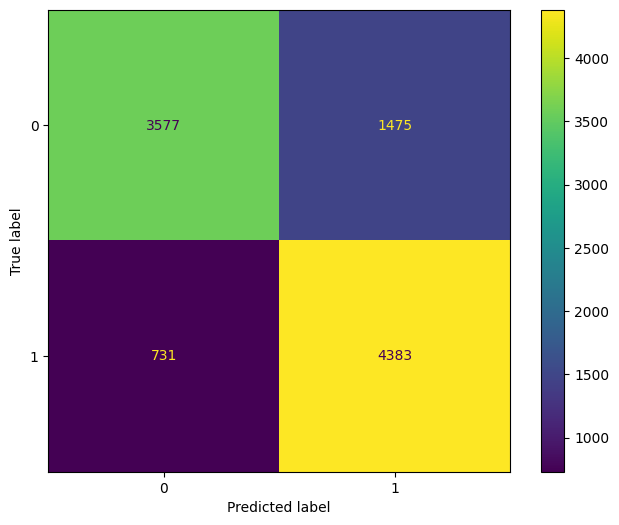


DecisionTreeClassifier_train_accuracy_iteration_1 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 1 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 1 is  0.8417273263820578
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 1 is  0.8404452792933903
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.85      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166

New_highest is reached at iteration number 1  
 0.8417273263820578 [0.84381865 0.83969762] [0.83630245 0.84708643]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8417273263

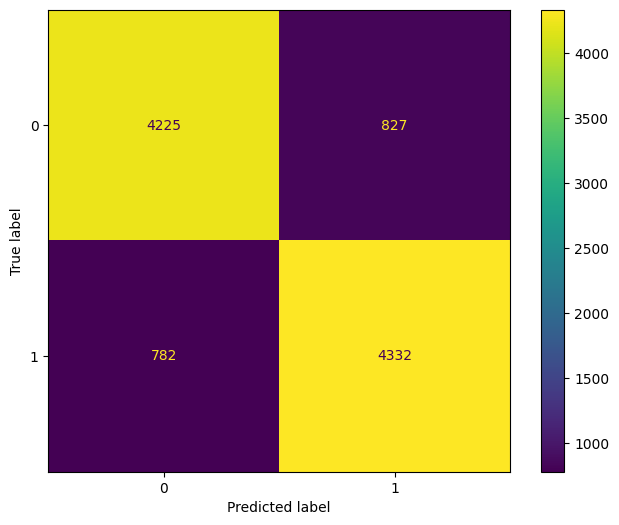


DecisionTreeClassifier_train_accuracy_iteration_2 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 2 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 2 is  0.8429077316545347
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 2 is  0.8413305658290768
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.85      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166

New_highest is reached at iteration number 2  
 0.8429077316545347 [0.84405497 0.84178814] [0.83887569 0.84689089]

--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [1.6846350580

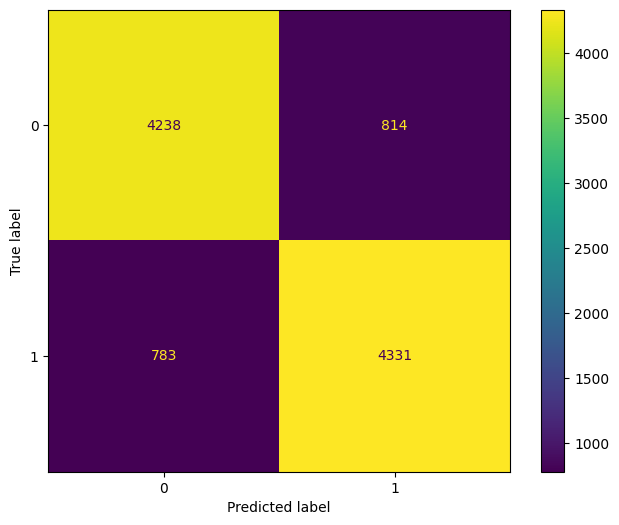


DecisionTreeClassifier_train_accuracy_iteration_3 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 3 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 3 is  0.8419240605941373
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 3 is  0.8394222401010902
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.85      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [2.52655911863073, 2.5220373230563498, 5.07140732964321, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()':

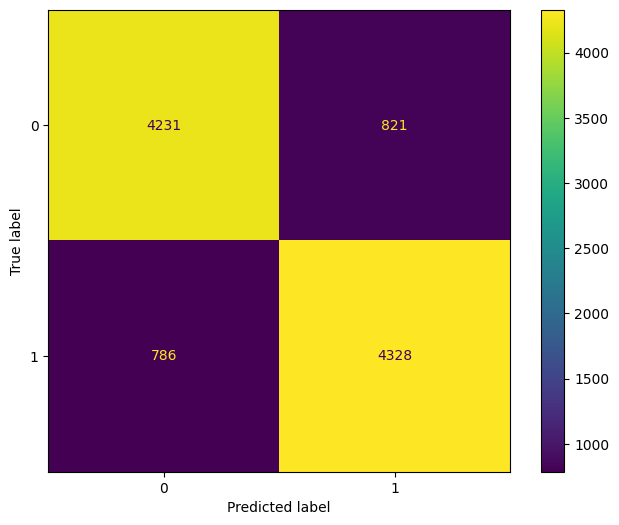


DecisionTreeClassifier_train_accuracy_iteration_4 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 4 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 4 is  0.8430060987605744
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 4 is  0.8400911925489893
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.85      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166

New_highest is reached at iteration number 4  
 0.8430060987605744 [0.84312947 0.84288499] [0.84045922 0.8455221 ]

--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [3.3695652173

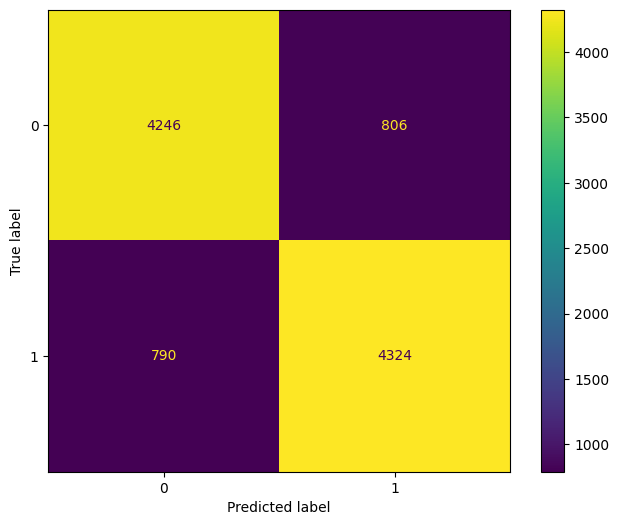


DecisionTreeClassifier_train_accuracy_iteration_5 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 5 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 5 is  0.8417273263820578
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 5 is  0.8397567501946778
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.85      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [4.211292543773362, 4.205411918905254, 8.450236760431931, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()'

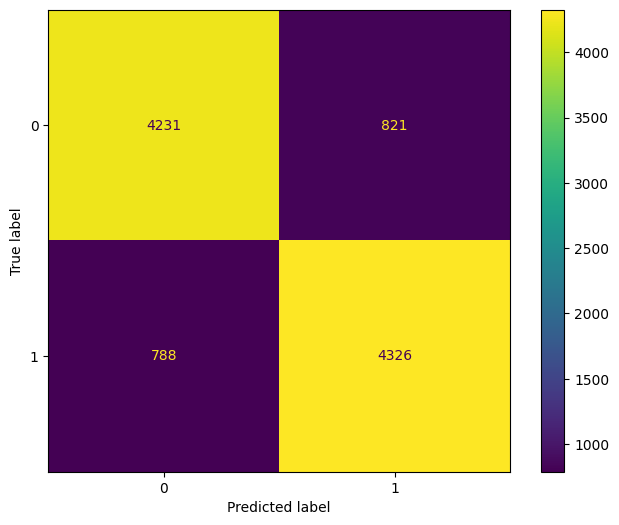


DecisionTreeClassifier_train_accuracy_iteration_6 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 6 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 6 is  0.8429077316545347
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 6 is  0.8393435483516664
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.85      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [5.054200275427896, 5.04826627647983, 10.139651960892571, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()'

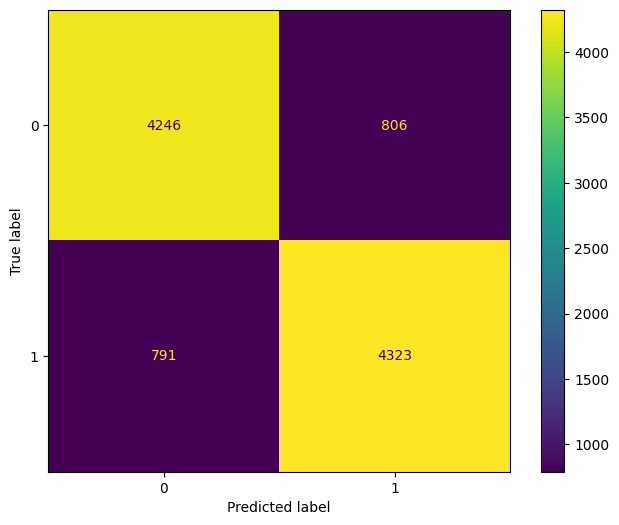


DecisionTreeClassifier_train_accuracy_iteration_7 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 7 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 7 is  0.8427109974424553
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 7 is  0.84011078081225
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.85      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [5.896911272870351, 5.890258882045115, 11.829806327227198, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()':

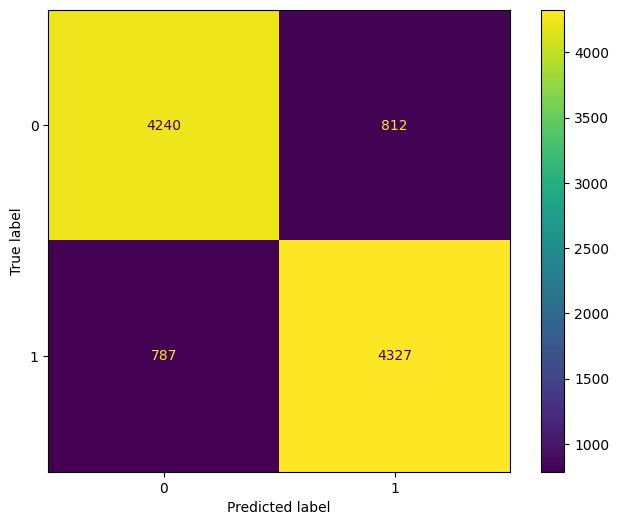


DecisionTreeClassifier_train_accuracy_iteration_8 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 8 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 8 is  0.8429077316545347
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 8 is  0.839756744388454
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5052
           1       0.84      0.85      0.84      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [6.739819004524886, 6.731251707331134, 13.522384144179728, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()'

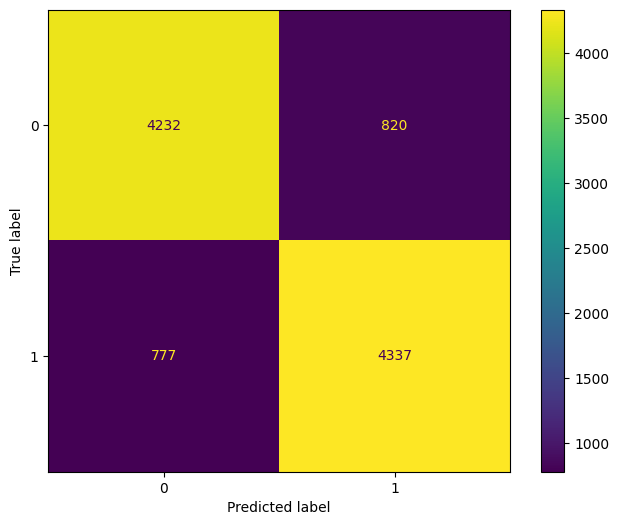


DecisionTreeClassifier_train_accuracy_iteration_9 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 9 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 9 is  0.8449734408813693
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 9 is  0.839658350186704
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5052
           1       0.84      0.85      0.85      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166

New_highest is reached at iteration number 9  
 0.8449734408813693 [0.84511517 0.84483431] [0.84243864 0.84747751]

--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [7.58479244540

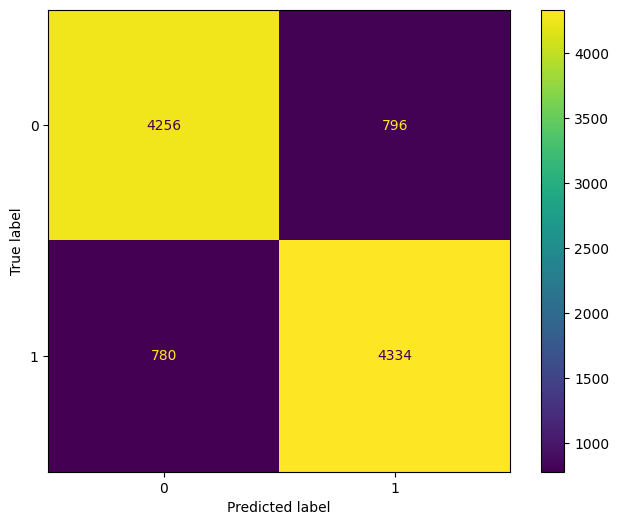


DecisionTreeClassifier_train_accuracy_iteration_10 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 10 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 10 is  0.8444816053511706
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 10 is  0.8396386632176407
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5052
           1       0.84      0.85      0.85      5114

    accuracy                           0.84     10166
   macro avg       0.84      0.84      0.84     10166
weighted avg       0.84      0.84      0.84     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [8.429274050757426, 8.419029133164534, 16.911038839458666, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassif

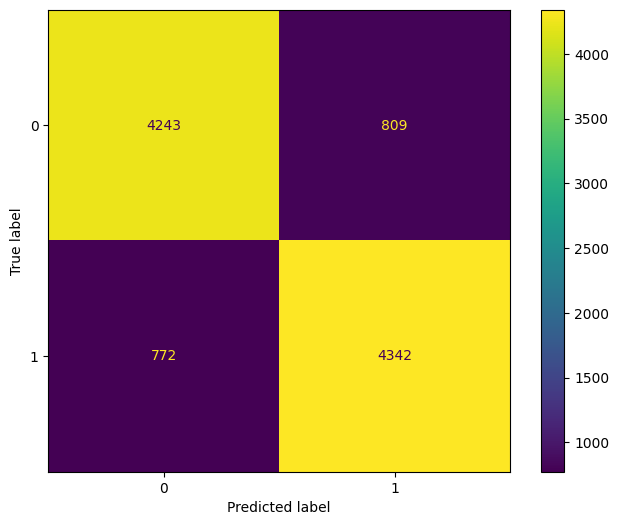

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_1 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 1 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 1 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 1 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166

New_highest is reached at iteration number 1  
 0.8688766476490262 [0.89980649 0.84279238] [0.8283848  0.90887759]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassi

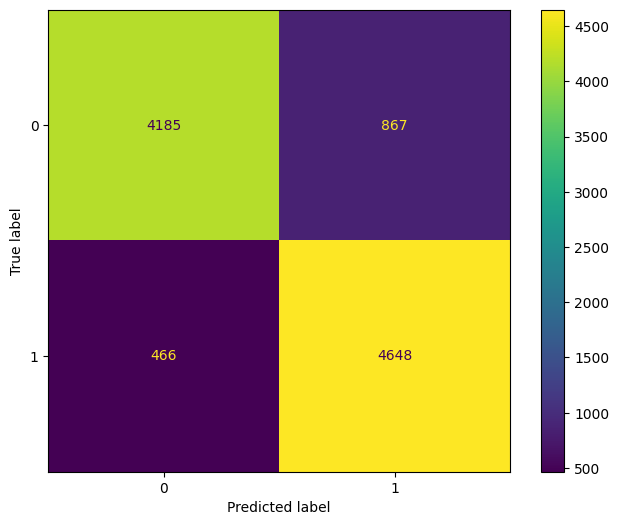

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_2 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 2 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 2 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 2 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [1.7377532952

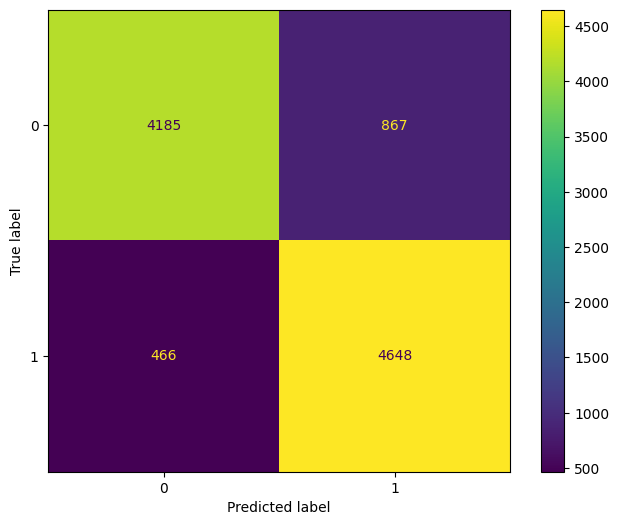

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_3 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 3 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 3 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 3 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [2.6066299429

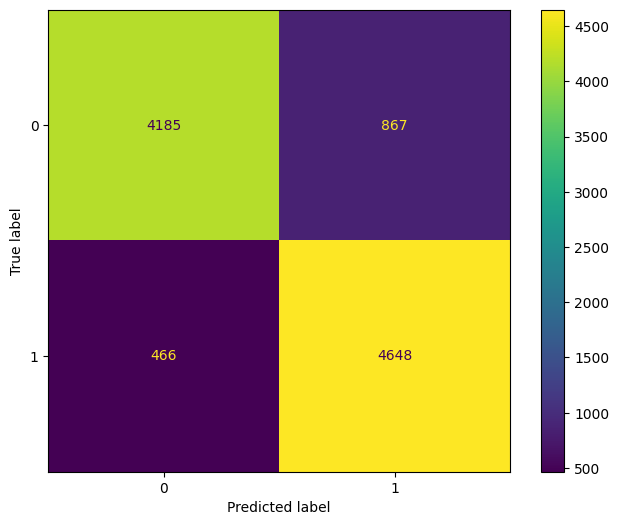

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_4 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 4 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 4 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 4 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [3.4755065905

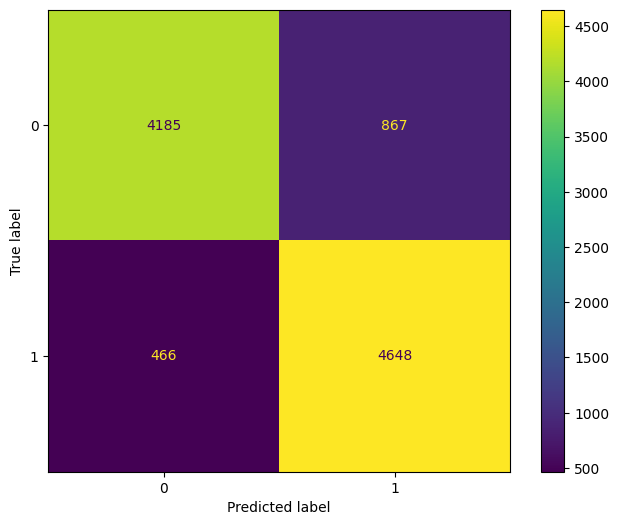

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_5 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 5 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 5 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 5 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [4.3443832382

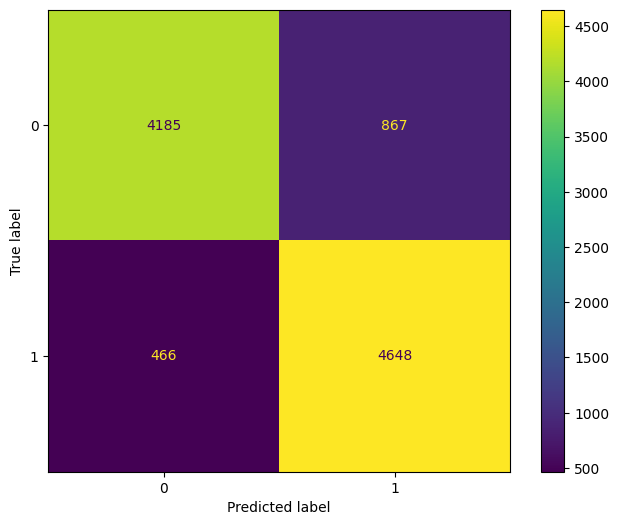

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_6 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 6 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 6 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 6 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [5.2132598858

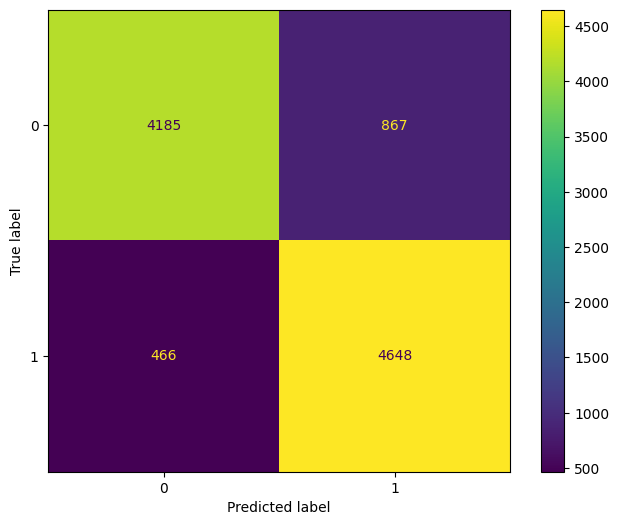

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_7 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 7 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 7 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 7 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [6.0821365335

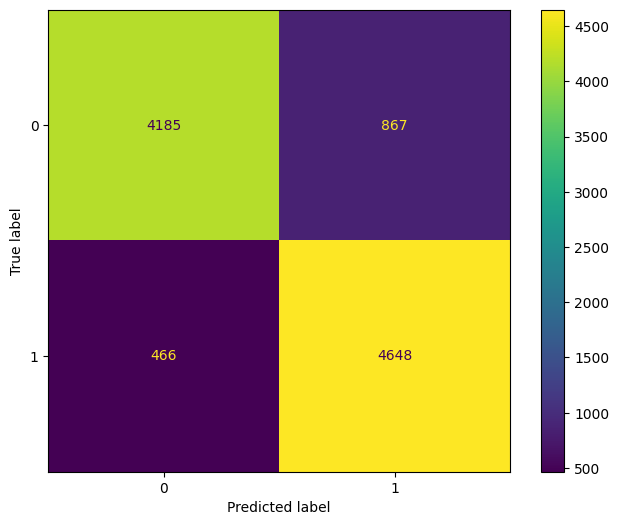

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_8 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 8 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 8 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 8 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [6.9510131811

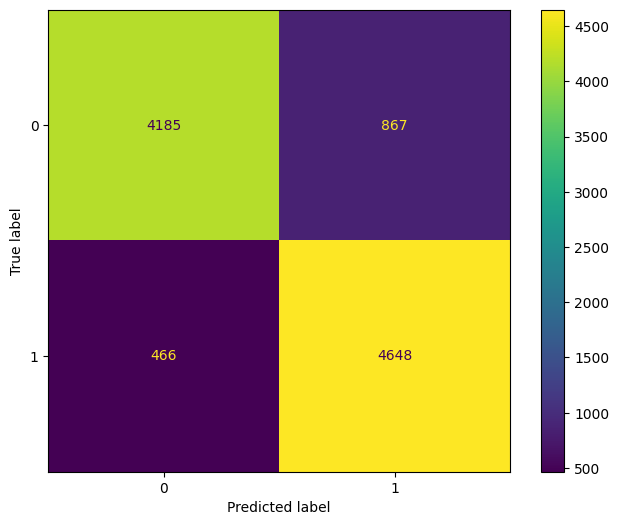

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_9 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 9 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 9 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 9 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [7.8198898288

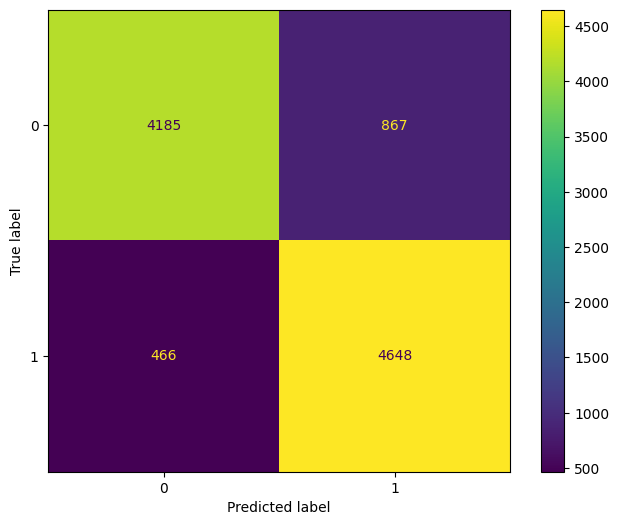

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_10 0.9102624007082606
Training accuracy of KNeighborsClassifier() at iteration number 10 is  0.9102624007082606
Testing accuracy of KNeighborsClassifier() at iteration number 10 is  0.8688766476490262
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 10 is  0.8683035269228302
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5052
           1       0.84      0.91      0.87      5114

    accuracy                           0.87     10166
   macro avg       0.87      0.87      0.87     10166
weighted avg       0.87      0.87      0.87     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [8.68876

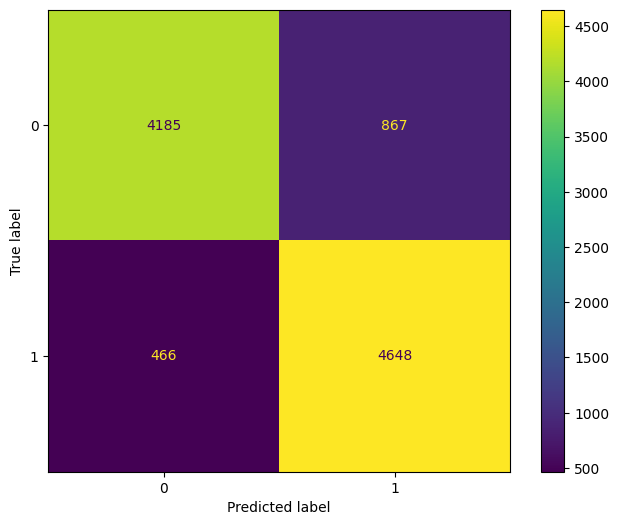

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_1 1.0
Training accuracy of RandomForestClassifier() at iteration number 1 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 1 is  0.8769427503442848
Cross validation mean accuracy of RandomForestClassifier() at iteration number 1 is  0.8772944158934148
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5052
           1       0.86      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166

New_highest is reached at iteration number 1  
 0.8769427503442848 [0.89032656 0.86464036] [0.85807601 0.89558076]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050

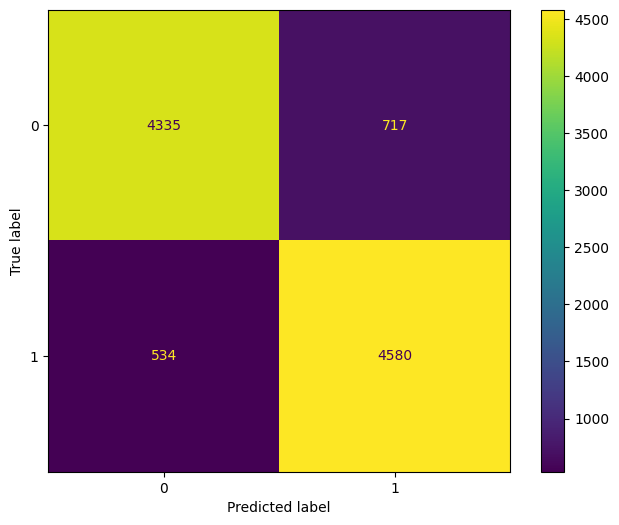

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_2 1.0
Training accuracy of RandomForestClassifier() at iteration number 2 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 2 is  0.8773362187684438
Cross validation mean accuracy of RandomForestClassifier() at iteration number 2 is  0.8779239556950296
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5052
           1       0.87      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166

New_highest is reached at iteration number 2  
 0.8773362187684438 [0.89073732 0.86501793] [0.85847189 0.89597184]

--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050

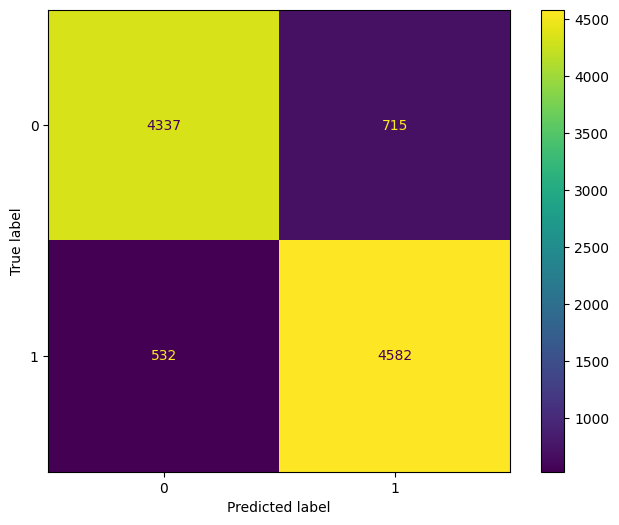

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_3 1.0
Training accuracy of RandomForestClassifier() at iteration number 3 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 3 is  0.8781231556167618
Cross validation mean accuracy of RandomForestClassifier() at iteration number 3 is  0.8769206247612795
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5052
           1       0.87      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166

New_highest is reached at iteration number 3  
 0.8781231556167618 [0.89236468 0.86508385] [0.85827395 0.89773172]

--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050

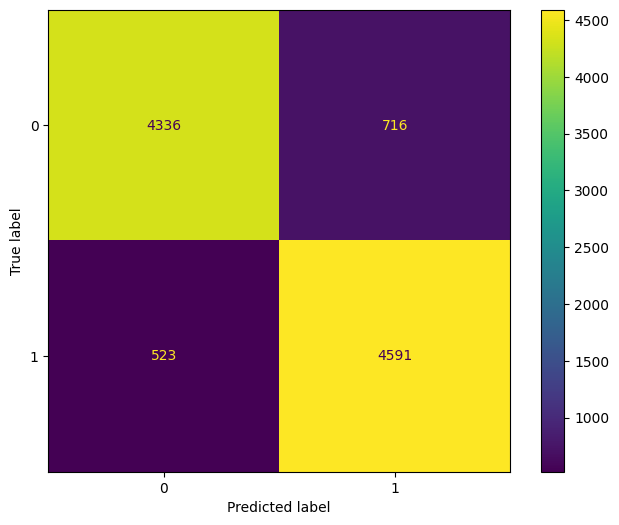

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_4 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 4 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 4 is  0.8791068266771591
Cross validation mean accuracy of RandomForestClassifier() at iteration number 4 is  0.8786715592487868
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5052
           1       0.87      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166

New_highest is reached at iteration number 4  
 0.8791068266771591 [0.89307012 0.86630209] [0.85965954 0.89831834]

--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTr

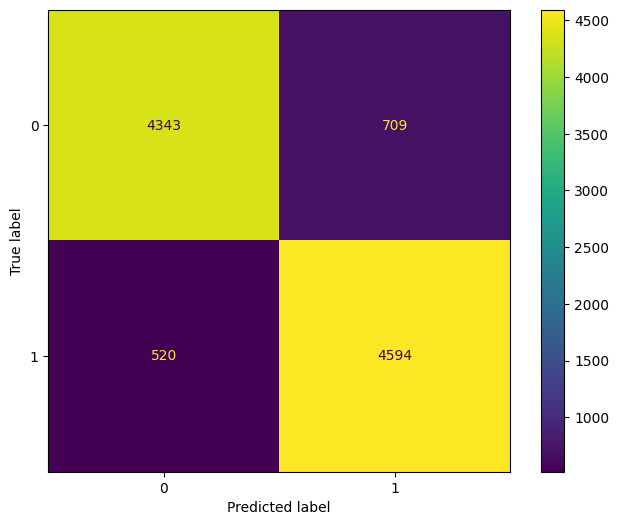

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_5 1.0
Training accuracy of RandomForestClassifier() at iteration number 5 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 5 is  0.8786149911469605
Cross validation mean accuracy of RandomForestClassifier() at iteration number 5 is  0.8772943868622963
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5052
           1       0.87      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.842792384406

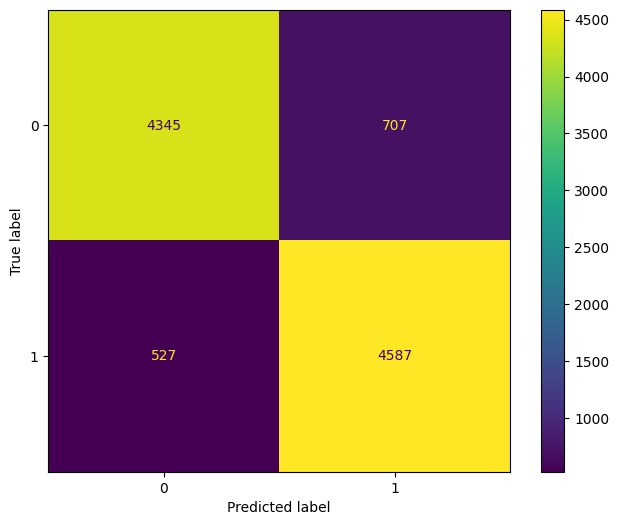

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_6 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 6 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 6 is  0.8771394845563644
Cross validation mean accuracy of RandomForestClassifier() at iteration number 6 is  0.878042002028501
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5052
           1       0.86      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.868

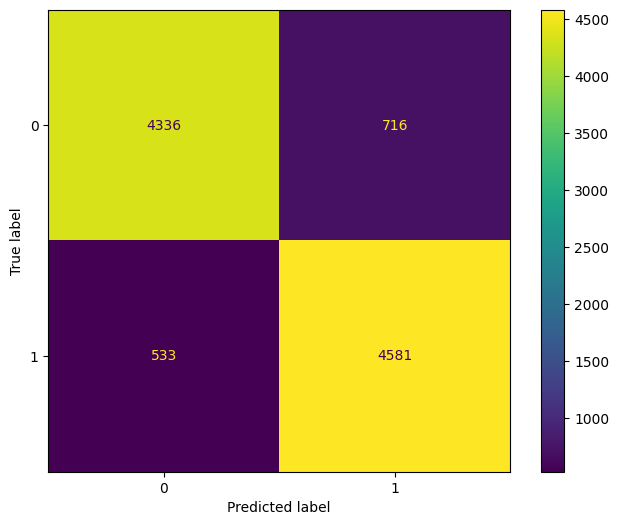

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_7 1.0
Training accuracy of RandomForestClassifier() at iteration number 7 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 7 is  0.8797953964194374
Cross validation mean accuracy of RandomForestClassifier() at iteration number 7 is  0.8773927694515994
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5052
           1       0.87      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166

New_highest is reached at iteration number 7  
 0.8797953964194374 [0.89468261 0.86620248] [0.85926366 0.90007822]

--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050

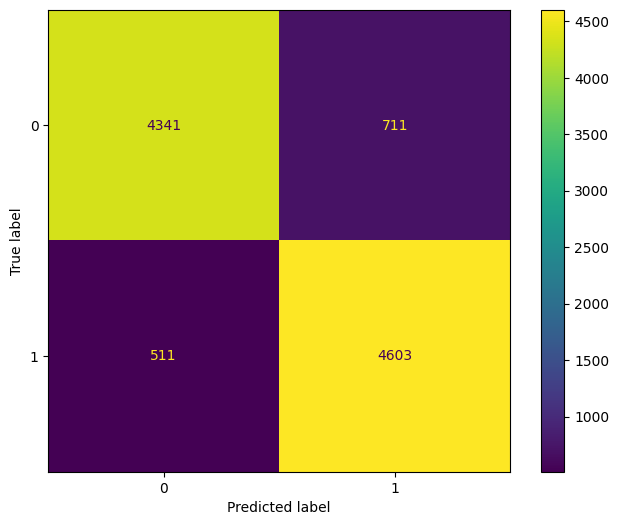

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_8 1.0
Training accuracy of RandomForestClassifier() at iteration number 8 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 8 is  0.8786149911469605
Cross validation mean accuracy of RandomForestClassifier() at iteration number 8 is  0.8775501819815654
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5052
           1       0.87      0.89      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.842792384406

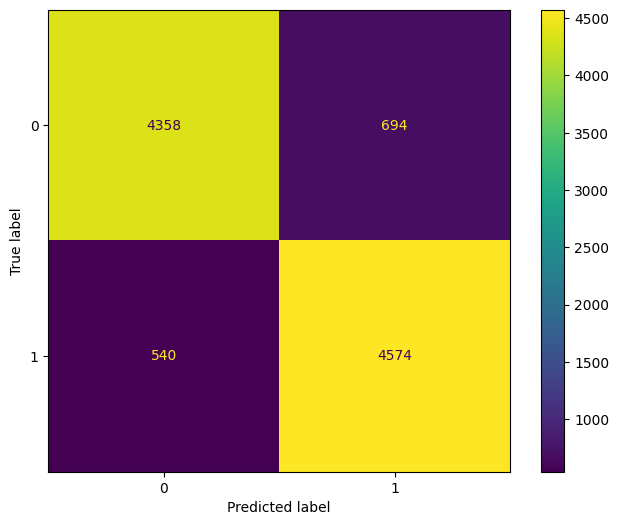

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_9 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 9 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 9 is  0.8782215227228015
Cross validation mean accuracy of RandomForestClassifier() at iteration number 9 is  0.8778059287156372
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5052
           1       0.86      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.86

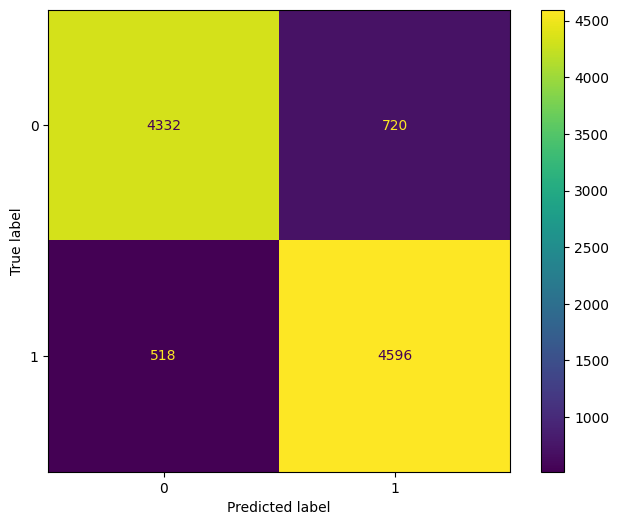

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_10 1.0
Training accuracy of RandomForestClassifier() at iteration number 10 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 10 is  0.8754672437536888
Cross validation mean accuracy of RandomForestClassifier() at iteration number 10 is  0.8774911597825337
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5052
           1       0.86      0.90      0.88      5114

    accuracy                           0.88     10166
   macro avg       0.88      0.88      0.88     10166
weighted avg       0.88      0.88      0.88     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923

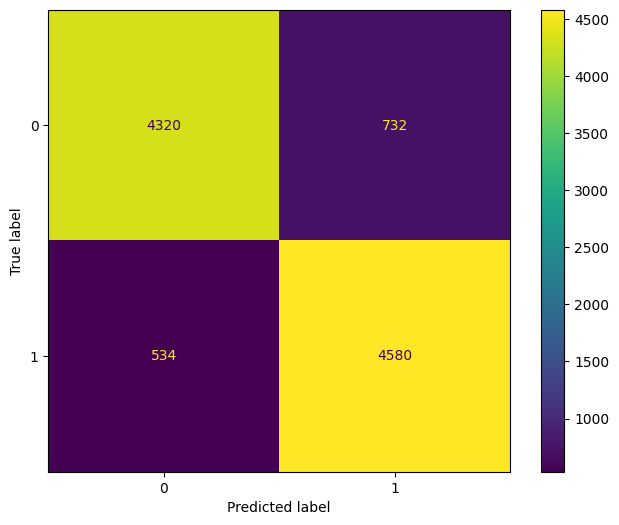

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_1 0.7912106829304282
Training accuracy of SGDClassifier() at iteration number 1 is  0.7912106829304282
Testing accuracy of SGDClassifier() at iteration number 1 is  0.7933307102105056
Cross validation mean accuracy of SGDClassifier() at iteration number 1 is  0.7907886622644524
              precision    recall  f1-score   support

           0       0.92      0.64      0.75      5052
           1       0.73      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.82      0.79      0.79     10166
weighted avg       0.82      0.79      0.79     10166

New_highest is reached at iteration number 1  
 0.7933307102105056 [0.92049017 0.72630314] [0.63935075 0.94544388]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426

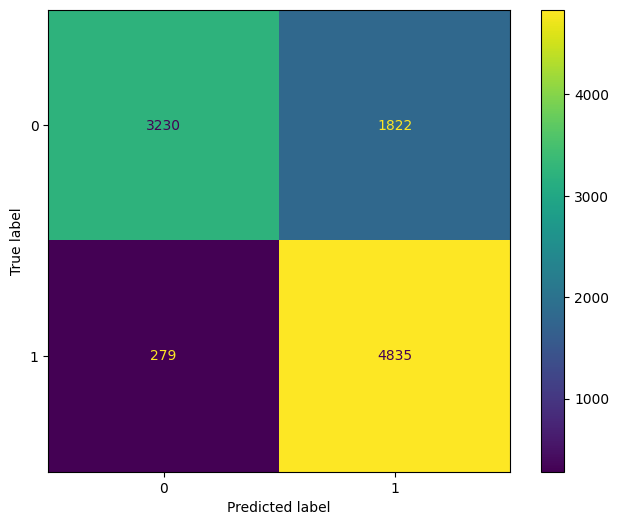

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_2 0.7823574256695276
Training accuracy of SGDClassifier() at iteration number 2 is  0.7823574256695276
Testing accuracy of SGDClassifier() at iteration number 2 is  0.7807397206374188
Cross validation mean accuracy of SGDClassifier() at iteration number 2 is  0.7903951802924383
              precision    recall  f1-score   support

           0       0.99      0.56      0.72      5052
           1       0.70      1.00      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.84      0.78      0.77     10166
weighted avg       0.84      0.78      0.77     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 

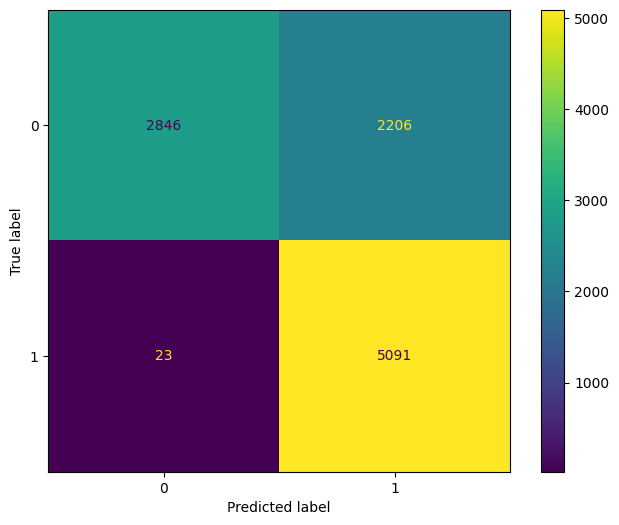

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_3 0.7906942429235423
Training accuracy of SGDClassifier() at iteration number 3 is  0.7906942429235423
Testing accuracy of SGDClassifier() at iteration number 3 is  0.7906747983474326
Cross validation mean accuracy of SGDClassifier() at iteration number 3 is  0.7871686656688348
              precision    recall  f1-score   support

           0       0.95      0.61      0.74      5052
           1       0.72      0.97      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.83      0.79      0.78     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 

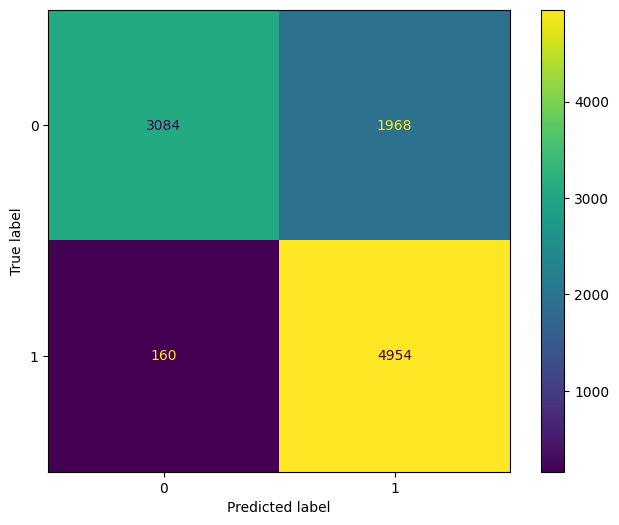

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_4 0.7892924771905664
Training accuracy of SGDClassifier() at iteration number 4 is  0.7892924771905664
Testing accuracy of SGDClassifier() at iteration number 4 is  0.7904780641353532
Cross validation mean accuracy of SGDClassifier() at iteration number 4 is  0.7887425471071023
              precision    recall  f1-score   support

           0       0.95      0.61      0.74      5052
           1       0.71      0.97      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.83      0.79      0.78     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 

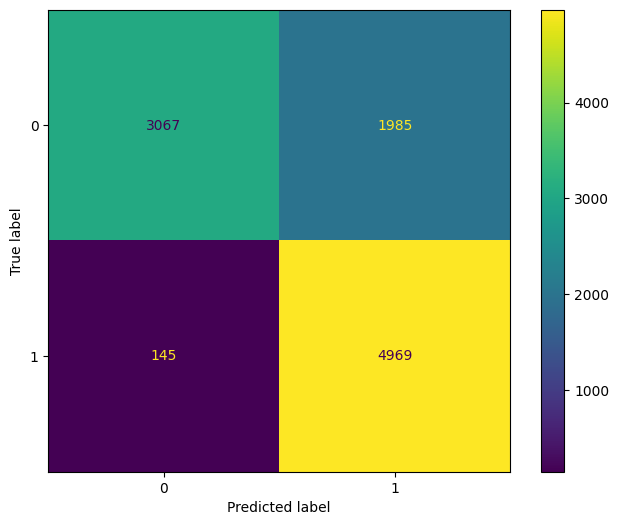

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_5 0.7934485896269335
Training accuracy of SGDClassifier() at iteration number 5 is  0.7934485896269335
Testing accuracy of SGDClassifier() at iteration number 5 is  0.7929372417863466
Cross validation mean accuracy of SGDClassifier() at iteration number 5 is  0.7924019350595172
              precision    recall  f1-score   support

           0       0.96      0.61      0.74      5052
           1       0.72      0.98      0.83      5114

    accuracy                           0.79     10166
   macro avg       0.84      0.79      0.79     10166
weighted avg       0.84      0.79      0.79     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 

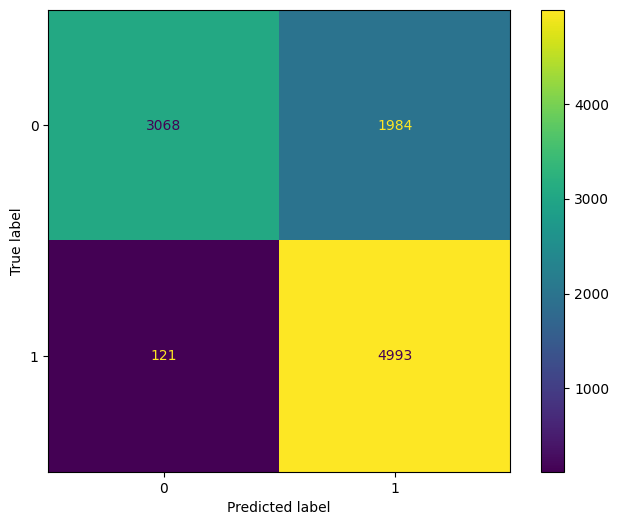

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_6 0.7939896220150997
Training accuracy of SGDClassifier() at iteration number 6 is  0.7939896220150997
Testing accuracy of SGDClassifier() at iteration number 6 is  0.7929372417863466
Cross validation mean accuracy of SGDClassifier() at iteration number 6 is  0.7900607514859821
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      5052
           1       0.75      0.88      0.81      5114

    accuracy                           0.79     10166
   macro avg       0.80      0.79      0.79     10166
weighted avg       0.80      0.79      0.79     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 

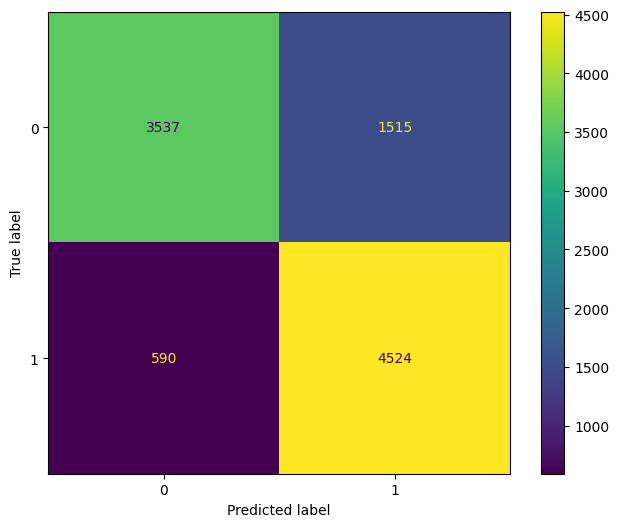

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_7 0.7933748124830927
Training accuracy of SGDClassifier() at iteration number 7 is  0.7933748124830927
Testing accuracy of SGDClassifier() at iteration number 7 is  0.7932323431044659
Cross validation mean accuracy of SGDClassifier() at iteration number 7 is  0.7906510063782335
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.79     10166
weighted avg       0.83      0.79      0.79     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 

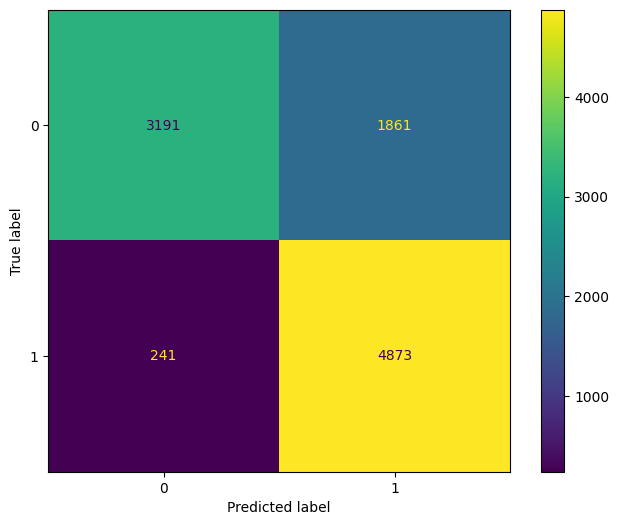

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_8 0.7900056562476945
Training accuracy of SGDClassifier() at iteration number 8 is  0.7900056562476945
Testing accuracy of SGDClassifier() at iteration number 8 is  0.7896911272870352
Cross validation mean accuracy of SGDClassifier() at iteration number 8 is  0.7920674830281663
              precision    recall  f1-score   support

           0       0.98      0.59      0.74      5052
           1       0.71      0.99      0.83      5114

    accuracy                           0.79     10166
   macro avg       0.84      0.79      0.78     10166
weighted avg       0.84      0.79      0.78     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 

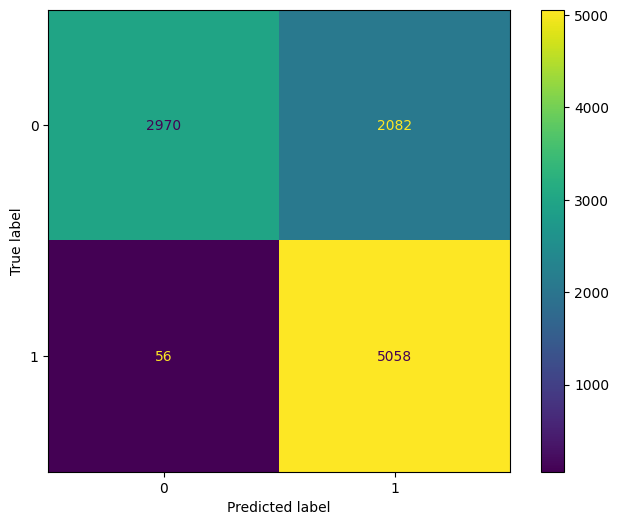

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_9 0.7941371763027814
Training accuracy of SGDClassifier() at iteration number 9 is  0.7941371763027814
Testing accuracy of SGDClassifier() at iteration number 9 is  0.793920912846744
Cross validation mean accuracy of SGDClassifier() at iteration number 9 is  0.7912804726343484
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      5052
           1       0.72      0.97      0.83      5114

    accuracy                           0.79     10166
   macro avg       0.84      0.79      0.79     10166
weighted avg       0.83      0.79      0.79     10166

New_highest is reached at iteration number 9  
 0.793920912846744 [0.95255586 0.71879983] [0.61599367 0.96969104]

--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 

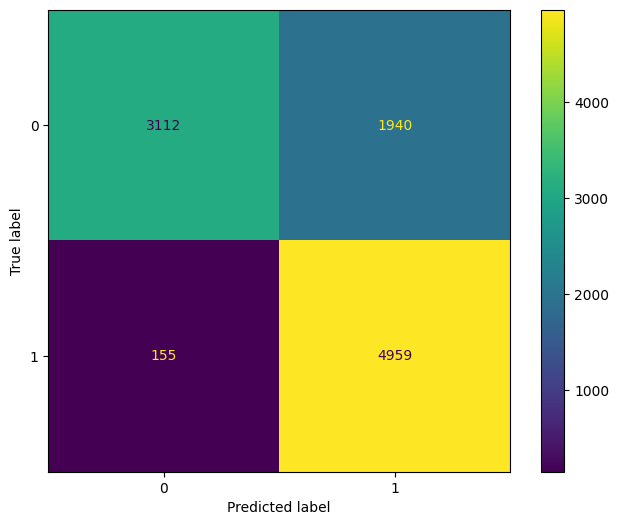

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_10 0.7892924771905664
Training accuracy of SGDClassifier() at iteration number 10 is  0.7892924771905664
Testing accuracy of SGDClassifier() at iteration number 10 is  0.7869368483179224
Cross validation mean accuracy of SGDClassifier() at iteration number 10 is  0.7902574547315352
              precision    recall  f1-score   support

           0       0.97      0.59      0.73      5052
           1       0.71      0.98      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.84      0.79      0.78     10166
weighted avg       0.84      0.79      0.78     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061

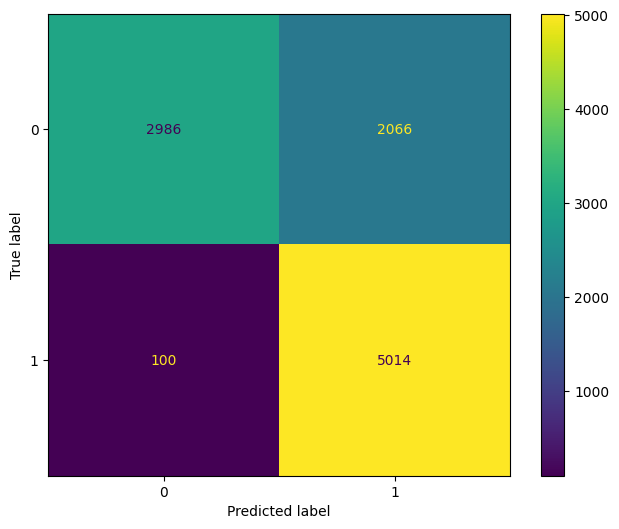

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_1 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 1 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 1 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 1 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166

New_highest is reached at iteration number 1  
 0.7906747983474326 [0.92949471 0.72079266] [0.62628662 0.95307   ]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.

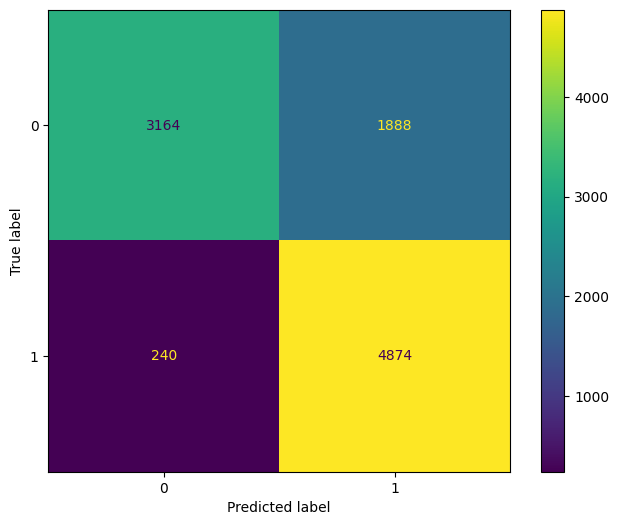

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_2 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 2 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 2 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 2 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.84

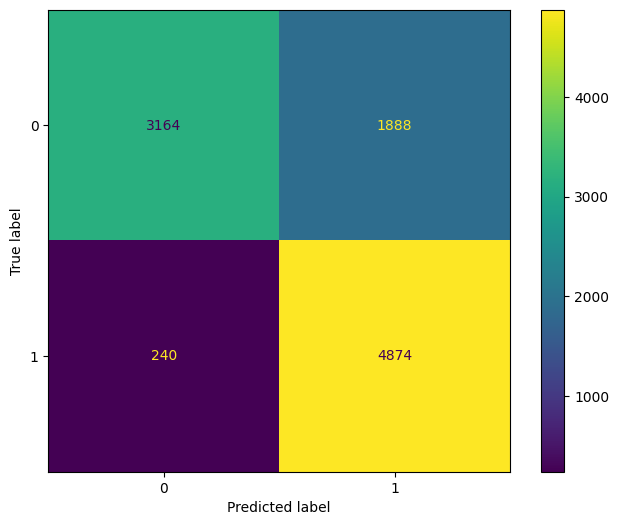

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_3 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 3 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 3 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 3 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.84

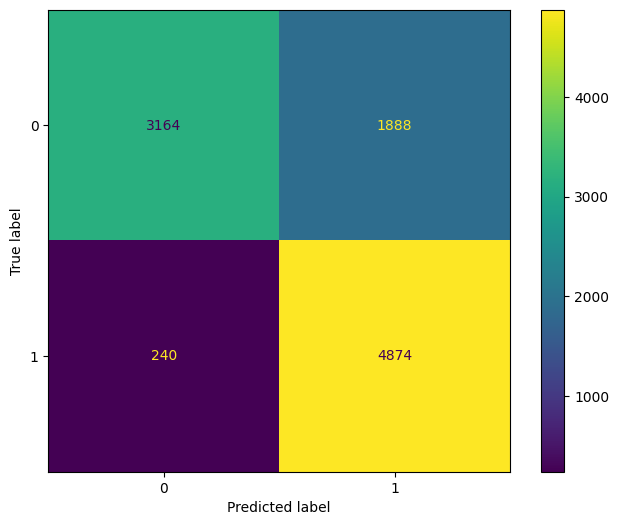

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_4 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 4 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 4 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 4 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.84

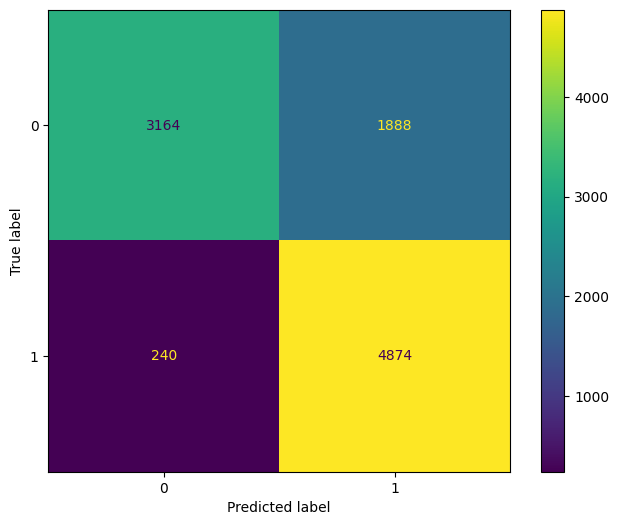

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_5 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 5 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 5 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 5 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.84

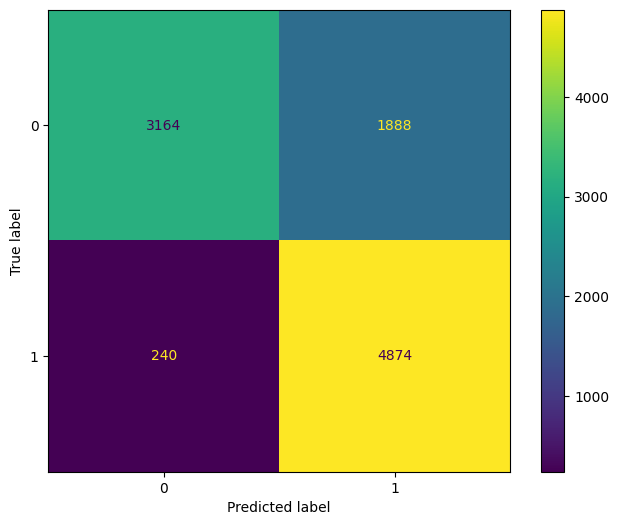

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_6 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 6 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 6 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 6 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.84

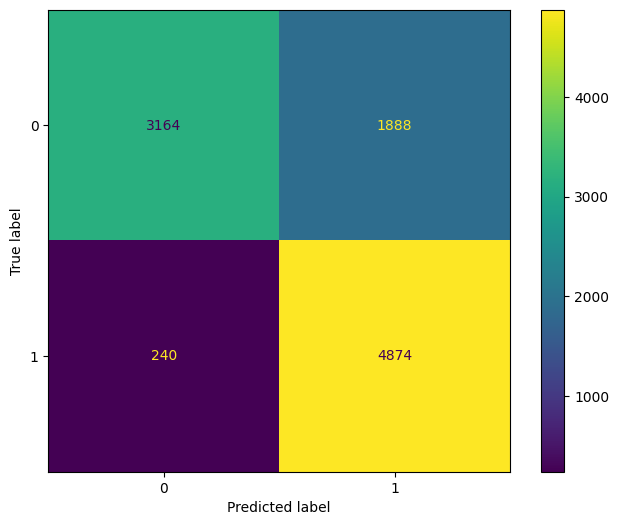

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_7 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 7 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 7 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 7 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.84

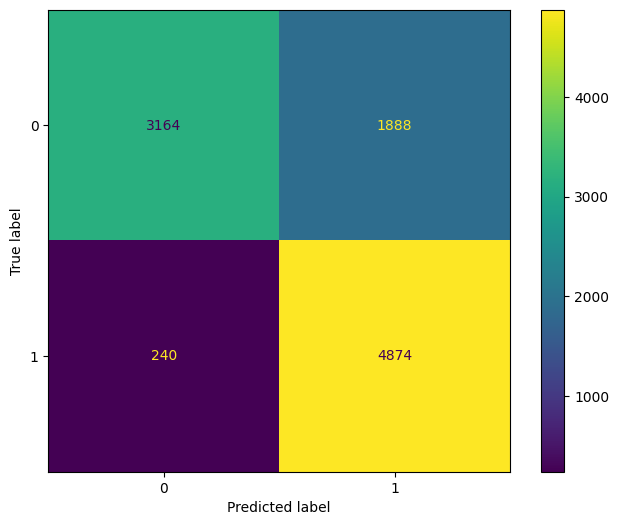

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_8 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 8 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 8 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 8 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.84

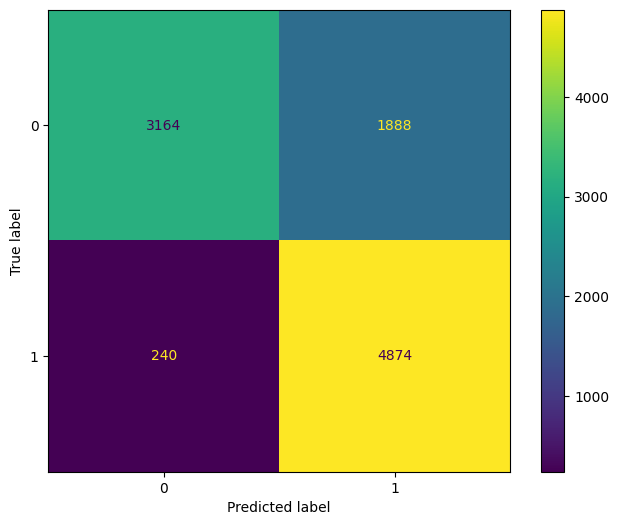

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_9 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 9 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 9 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 9 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.84

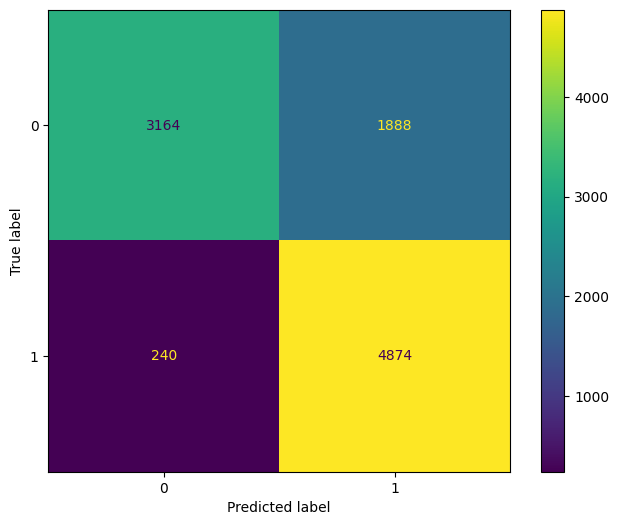

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_10 0.7905958733984212
Training accuracy of RidgeClassifierCV() at iteration number 10 is  0.7905958733984212
Testing accuracy of RidgeClassifierCV() at iteration number 10 is  0.7906747983474326
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 10 is  0.7906509270265101
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5052
           1       0.72      0.95      0.82      5114

    accuracy                           0.79     10166
   macro avg       0.83      0.79      0.78     10166
weighted avg       0.82      0.79      0.78     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262,

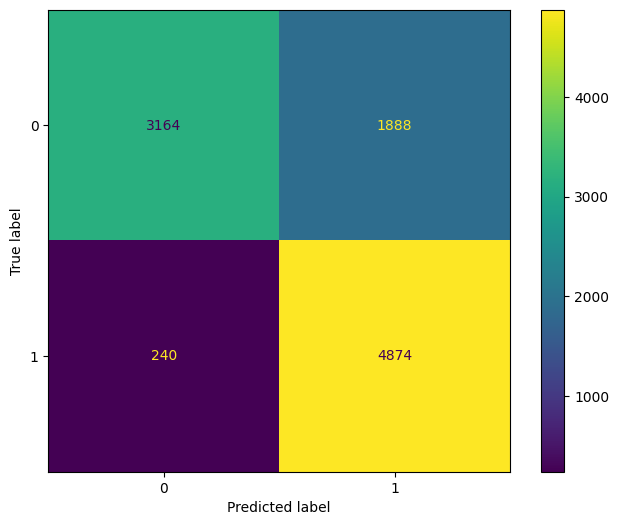

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_1 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 1 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 1 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 1 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166

New_highest is reached at iteration number 1  
 0.776116466653551 [0.9730743  0.69621128] [0.56512272 0.98455221]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133

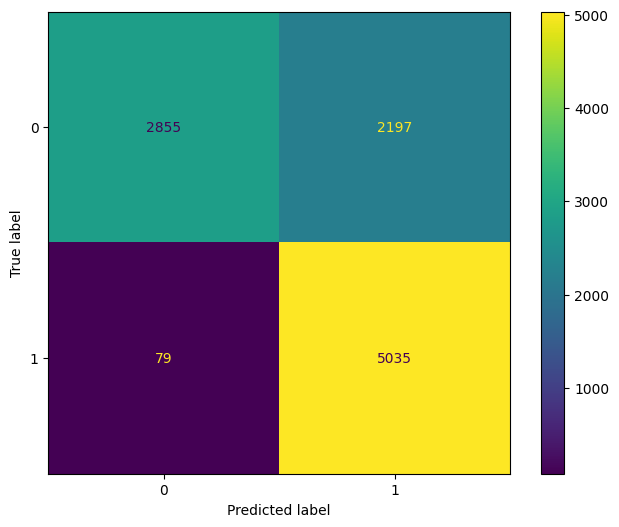

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_2 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 2 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 2 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 2 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.78346598117

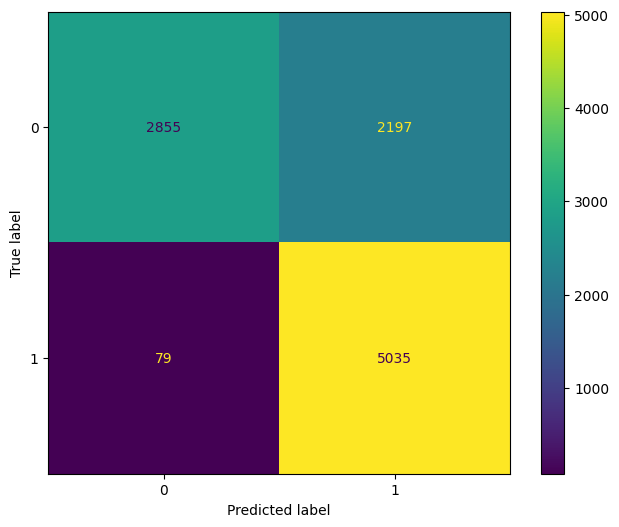

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_3 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 3 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 3 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 3 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.78346598117

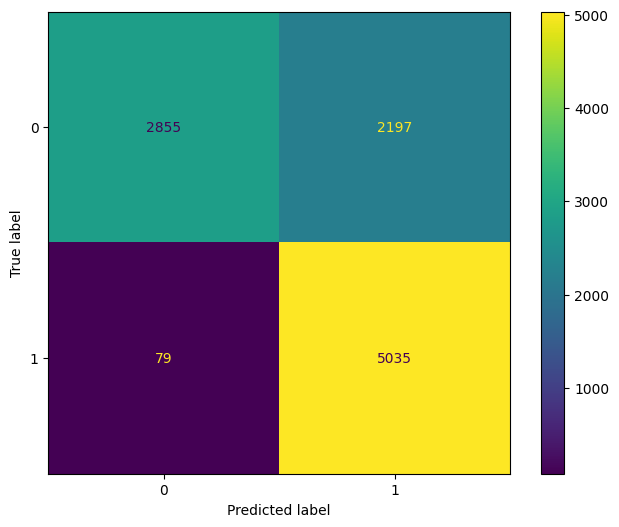

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_4 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 4 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 4 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 4 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.78346598117

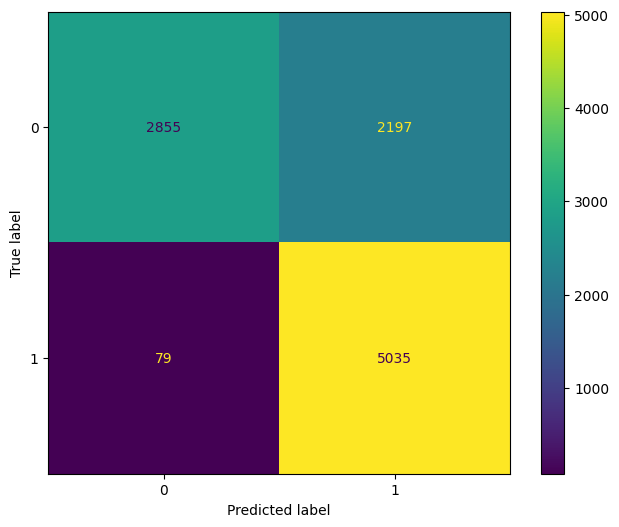

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_5 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 5 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 5 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 5 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.78346598117

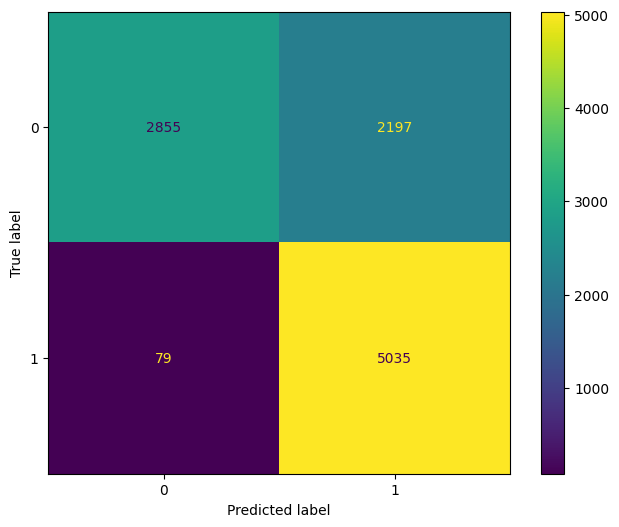

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_6 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 6 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 6 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 6 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.78346598117

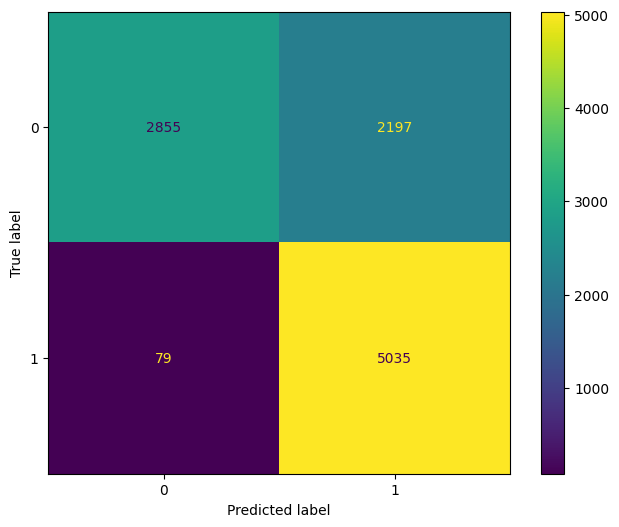

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_7 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 7 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 7 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 7 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.78346598117

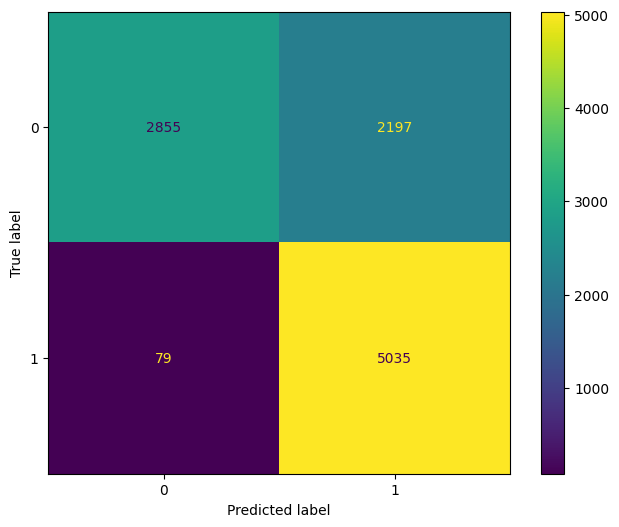

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_8 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 8 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 8 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 8 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.78346598117

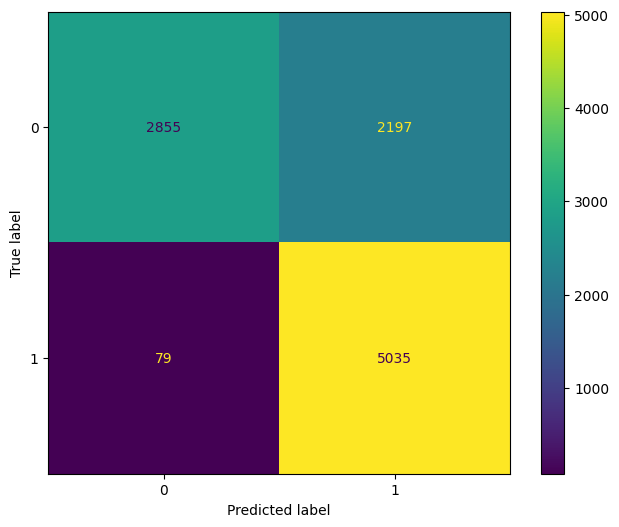

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_9 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 9 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 9 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 9 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.78346598117

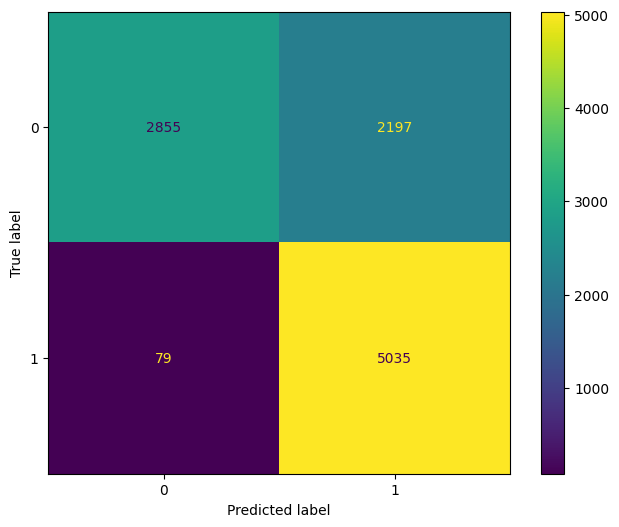

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_10 0.7755945208174507
Training accuracy of GaussianNB() at iteration number 10 is  0.7755945208174507
Testing accuracy of GaussianNB() at iteration number 10 is  0.776116466653551
Cross validation mean accuracy of GaussianNB() at iteration number 10 is  0.7755218358040589
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5052
           1       0.70      0.98      0.82      5114

    accuracy                           0.78     10166
   macro avg       0.83      0.77      0.77     10166
weighted avg       0.83      0.78      0.77     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7830021640763328, 0.7482075793786275, 1.656001816976152, 0.0], 'DecisionTreeClassifier()': [0.8429274050757426, 0.8419029133164534, 1.6911038839458665, 0.0], 'KNeighborsClassifier()': [0.8688766476490262, 0.8427923844061651, 1.783465

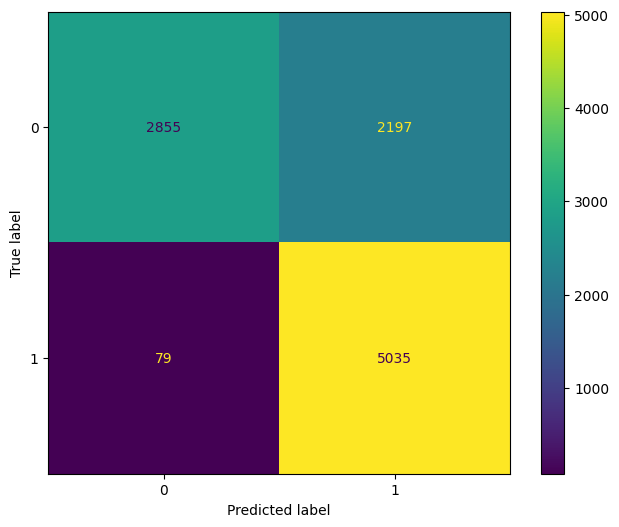

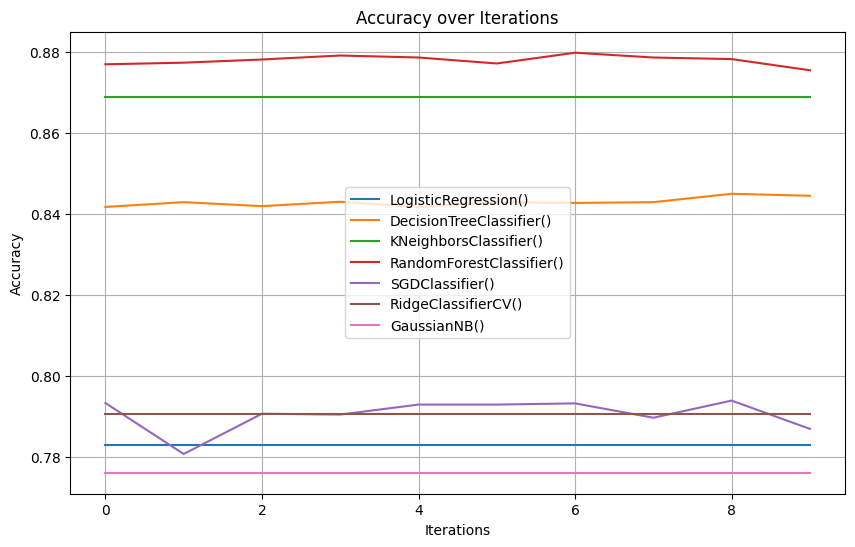

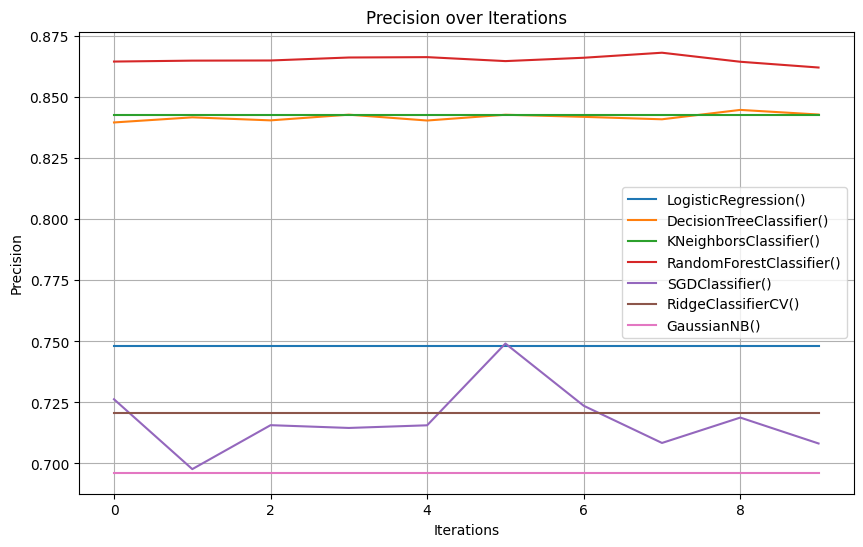

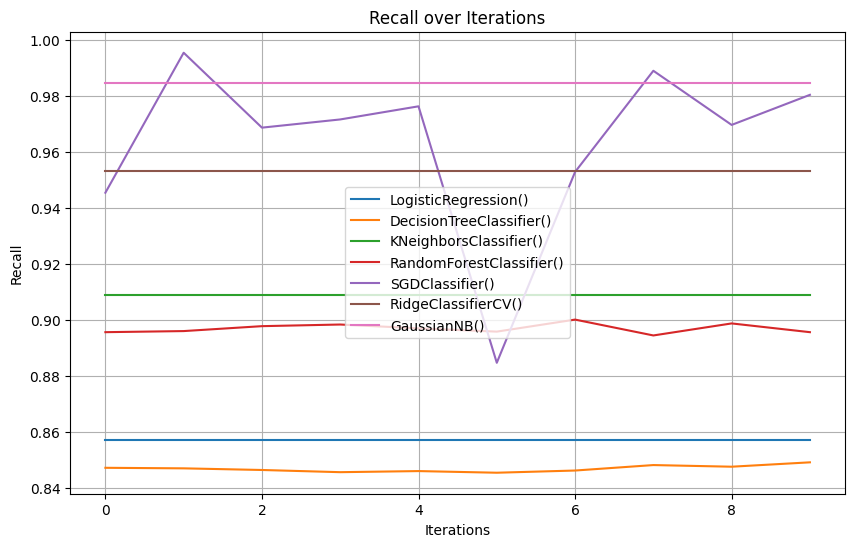

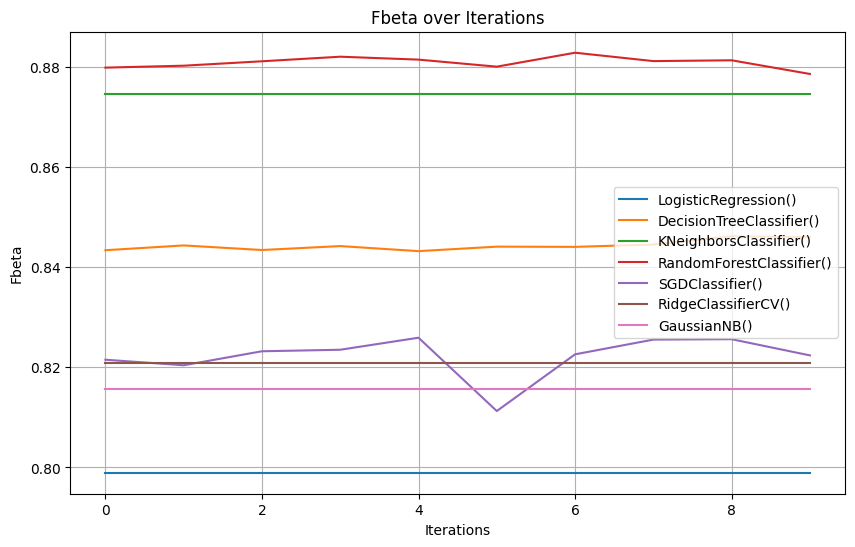

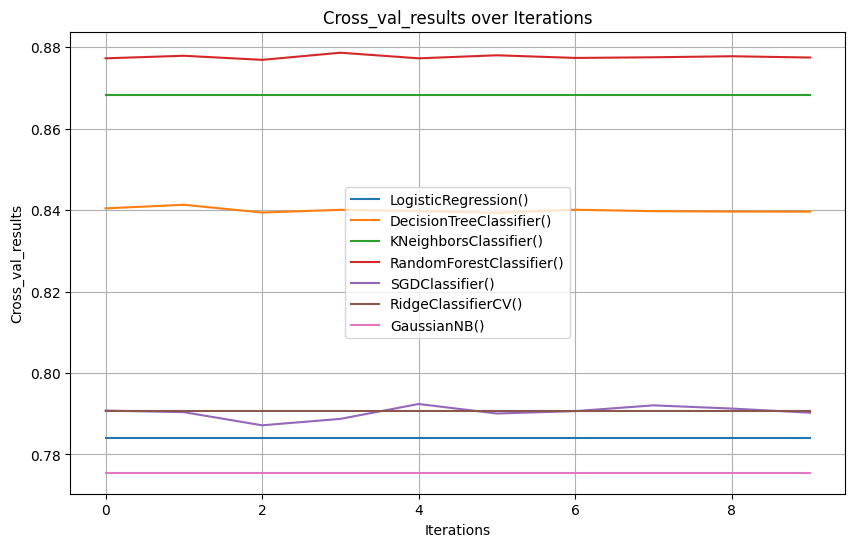

In [37]:
n_iter=10
# Perform algorithm testing and log metrics
with mlflow.start_run(run_name="final_logging_metrics3_deleting_most_4_correlated", experiment_id=mlflow.get_experiment_by_name('PATH2').experiment_id) as run:
    for algo in algorithms_to_be_tested:
        for i in range(n_iter):
            algo_testing(algo=algo, test_size=0.2, X=X, Y=Y, evaluation_metric="accuracy_score", random_state=42, shuffle=True, iteration_number=i+1)

        
        # Calculate average metrics
        avg_accuracies[algo][0]/=n_iter
        avg_accuracies[algo][1]/=n_iter
        avg_accuracies[algo][2]/=n_iter
        avg_accuracies[algo][3]/=n_iter


    def plot_metrics(metrics_history, metric_name):
        fig_roc=plt.figure(figsize=(10, 6))
        for algo in algorithms_to_be_tested:
            plt.plot(metrics_history[algo][metric_name], label=algo)
        plt.xlabel('Iterations')
        plt.ylabel(metric_name.capitalize())
        plt.title(f'{metric_name.capitalize()} over Iterations')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{metric_name}_plot.png")
        plt.show()
        mlflow.log_figure(fig_roc, f"metrics/{metric_name}.png")
    
    
    # Generate and log plots for each metric
    for metric in ['accuracy', 'precision', 'recall', 'fbeta','cross_val_results']:
        plot_metrics(metrics_history, metric)
mlflow.end_run()

In [ ]:
With PCA , 6 components highest is KNN with 89. with 'oldbalanceDest','newbalanceDest' deleted